In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('figure', **{'dpi': 300})

/home/azamat/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Часть I: О теореме Байеса

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести
вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её
ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на
первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать
прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем
считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь
принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так
получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно
такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью
99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие
вероятности он оценил, а какие должен был оценить.

**Попробую ответить:**

Для начала введем обозначения:
- $G$ (guilty) - виновен
- $I$ (innocent) - невиновен
- $RB$ (rare blood) - редкая группа крови

Из исходных данных:
- $P(RB|G)$ = 1

Прокурор сделал 2 вывода:
1. $P(RB|I)$ = 0.01
2. $P(G|RB)$ = $1 - P(RB|I)$ = 0.99

Но второе утверждение неверно, так как $1 - P(RB|I)$ = $P(\overline{RB}|I)$, а не $P(G|RB)$. Поэтому мы не можем утверждать что $P(G|RB)$ = 0.99. И так прокурор оценил вероятность не иметь редкую группу крови при условии невиновности.

НО он (прокурор) должен был оценить вероятность виновности подсудимого, при условии что у него редкая группа крови. Попробуем найти эту вероятность по теореме Байеса:

$P(G|RB) = \frac{P(RB|G) P(G)}{P(RB|G) P(G) + P(RB|I) P(I)}$

Нам известно, что $P(RB|I)$ = 0.01 и $P(RB|G)$ = 1, а также P(I) = 1 - P(G), подставив в формулу получим:

$P(G|RB) = \frac{P(G)}{P(G) + 0.01 \cdot (1 - P(G)))}$

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе
живёт миллион человек. Это значит, что примерно у 10000 из них такая группа
крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил
убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не
является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность
того, что мой подзащитный виновен, так что предлагаю исключить его из
материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие
должен был оценить?

Введем дополнительные обозначения

- $N$ = $10 ^ 6$ - число населения города

Тогда априорная вероятность виновности $P(G)$ = $\frac{1}{N}$

Адвокат умножил $N$ на $P(RB|I)$ но должен был умножить на полную вероятность $P(RB)$. Получается, что он посчитал вероятность по формуле: 

$\frac{1}{N * P(RB|I)} = \frac{P(G)} {P(RB|I)}$ = $10 ^ {-4}$

Опять распишем вероятность виновности подсудимого, при условии что у него редкая группа крови по Байесу:

$P(G|RB) = \frac{P(RB|G) P(G)}{P(RB|G) P(G) + P(RB|I) P(I)}$ 

$P(G|RB) = \frac{P(G)}{P(G) + 0.01 \cdot (1 - P(G)))}$, подставим вместо $P(G)$ = 1 / N

$P(G|RB) = \frac{10 ^ {-6} }{10 ^ {-6} + 10 ^ {-2} \cdot (1 - 10 ^ {-6})}$

$P(G|RB) = \frac{10 ^ {-6} }{10 ^ {-6} + 10 ^ {-2} - 10 ^ {-8}}$ $\approx$ $10 ^ {-4}$

Вывод: ошибка адвоката была в том, что он посчитал правильную вероятность неправильно

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по
предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки
5% в обе стороны. Мы видели, что в результате человек с положительным тестом
имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное
исследование и улучшить качество теста. Но сил и денег хватит только для того,
чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives
(когда тест выдаёт положительный результат у здорового человека), или только
число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни
после положительного и отрицательного теста от обоих видов ошибок (например, ввиде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше
сосредоточиться?

- $P(ill)$ = 0.01 - вероятность болезни

- $P(TP) = P(pos|ill)$ - вероятность положительного теста при условии болезни
- $P(FN) = 1 - P(TP) = 1 - P(pos|ill)$ - вероятность отрицательного теста при условии болезни
- $P(TN) = P(neg|healthy)$ - вероятность отрицательного теста при условии отсутствия болезни
- $P(FP) = 1 - P(TN) = 1 - P(neg|healthy)$ - вероятность положительного теста при условии отсутствия болезни


Вероятность болезни при положительном тесте:
$P(ill|pos) = \frac{P(TP) P(ill)}{P(TP) P(ill) + P(FP)*(1-P(ill))}$

Вероятность болезни при отрицательном тесте:
$P(ill|neg) = \frac{P(FN) P(ill)}{P(FN) P(ill) + P(TN)*(1- P(ill))}$

In [2]:
# априорная вероятность болезни
p_ill = 0.01

In [3]:
def aposterior_ill_pos_test(p_fn, p_fp):
    """Расчет апостериорной вероятности болезни при положительном тесте
    в зависимости от p_fn и p_fp
    
    Параметры:
    p_fn - вероятность отрицательного теста при условии болезни, iterable или скаляр
    p_fp - вероятность положительного теста при условии отсутствия болезни, iterable или скаляр
    """
    p_tp = 1 - p_fn
    return (p_tp * p_ill) / (p_tp * p_ill + p_fp * (1 - p_ill))

def aposterior_ill_neg_test(p_fn, p_fp):
    """Расчет апостериорной вероятности болезни при отрицательном тесте
    в зависимости от p_fn и p_fp
    
    Параметры:
    p_fn - вероятность отрицательного теста при условии болезни, iterable или скаляр
    p_fp - вероятность положительного теста при условии отсутствия болезни, iterable или скаляр
    """
    p_tn = 1 - p_fp
    return (p_fn * p_ill) / (p_fn * p_ill + p_tn * (1 - p_ill))

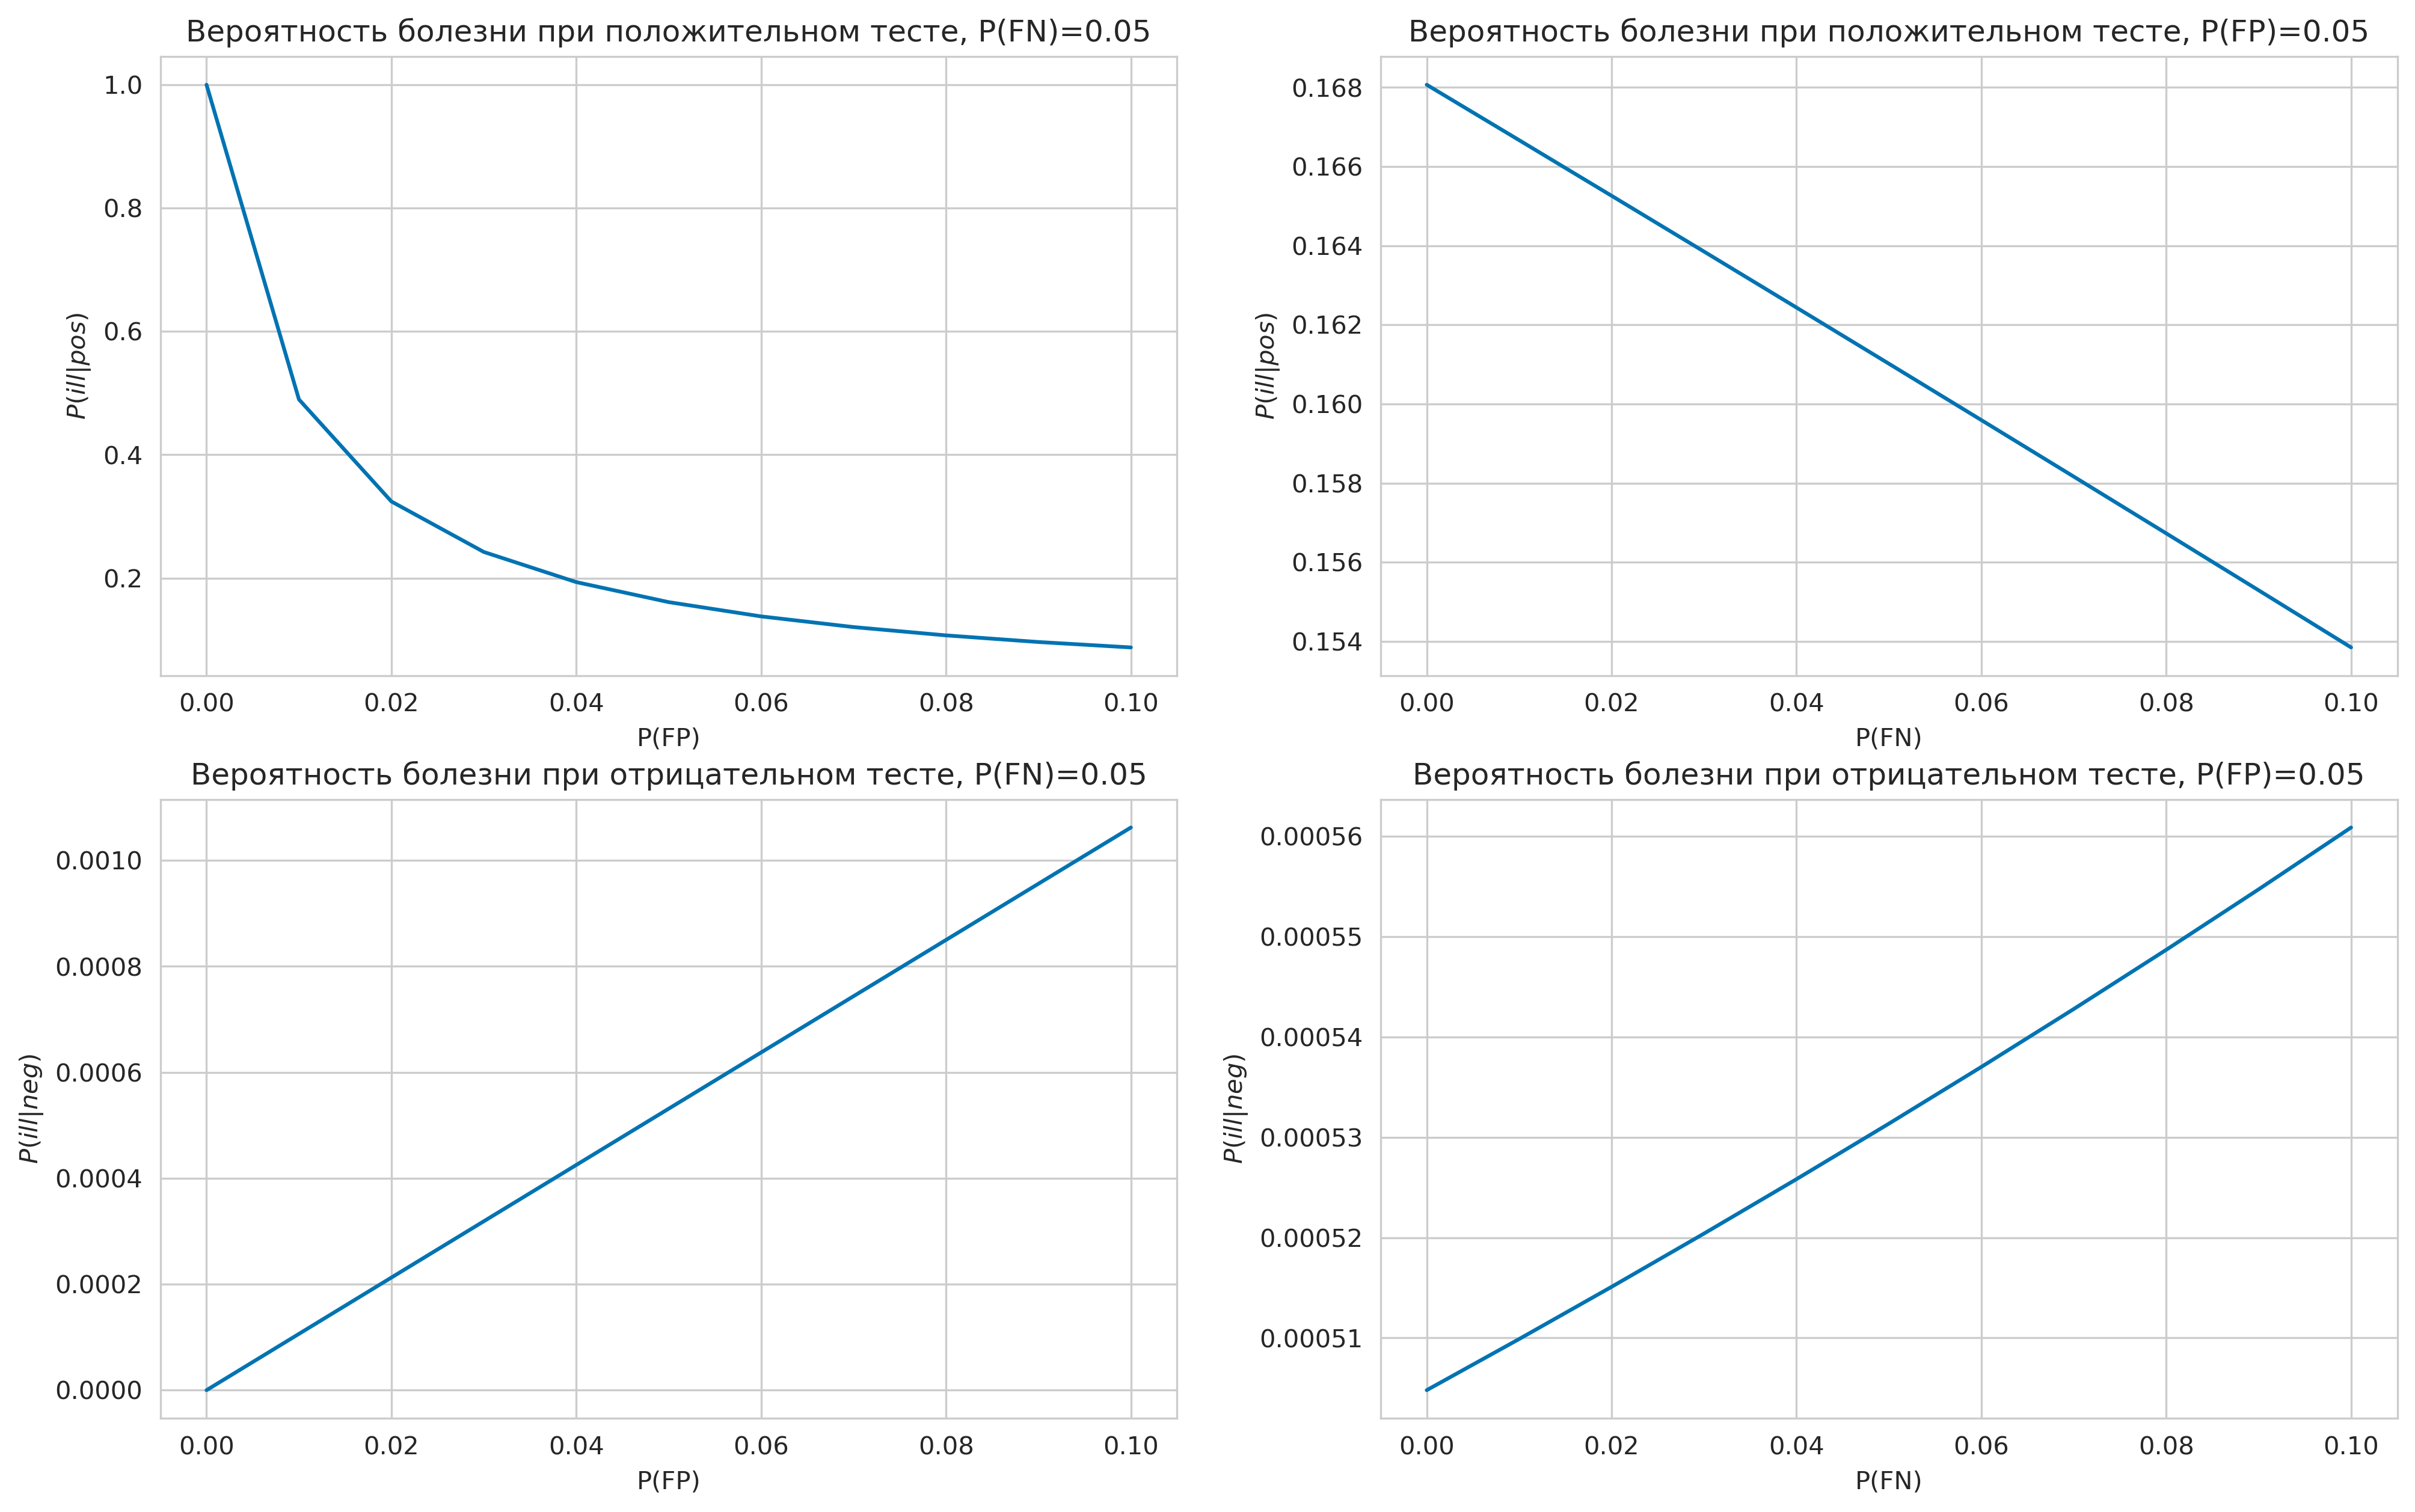

In [4]:
# Зафиксируем по очереди p_fp и p_fn и построим графики 
p_fp = np.arange(0.1, -0.01, -0.01)
p_fn = np.arange(0.1, -0.01, -0.01)

# апостериорная вероятность болезни при положительном тесте
ill_pos_fp = aposterior_ill_pos_test(p_fn=0.05, p_fp=p_fp)

# апостериорная вероятность болезни при отрицательном тесте
ill_neg_fp = aposterior_ill_neg_test(p_fn, p_fp=0.05)

# апостериорная вероятность болезни при положительном тесте
ill_pos_fn = aposterior_ill_pos_test(p_fn=p_fn, p_fp=0.05)

# апостериорная вероятность болезни при отрицательном тесте
ill_neg_fn = aposterior_ill_neg_test(p_fn=0.05, p_fp=p_fp)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

ax1.plot(p_fp, ill_pos_fp)
ax1.set_title('Вероятность болезни при положительном тесте, P(FN)=0.05')
ax1.set_xlabel('P(FP)')
ax1.set_ylabel('$P(ill|pos)$')


ax2.plot(p_fn, ill_pos_fn)
ax2.set_title('Вероятность болезни при положительном тесте, P(FP)=0.05')
ax2.set_xlabel('P(FN)')
ax2.set_ylabel('$P(ill|pos)$')

ax3.plot(p_fp, ill_neg_fp)
ax3.set_title('Вероятность болезни при отрицательном тесте, P(FN)=0.05')
ax3.set_xlabel('P(FP)')
ax3.set_ylabel('$P(ill|neg)$')


ax4.plot(p_fn, ill_neg_fn)
ax4.set_title('Вероятность болезни при отрицательном тесте, P(FP)=0.05')
ax4.set_xlabel('P(FN)')
ax4.set_ylabel('$P(ill|neg)$');

По графикам видно, что вероятность болезни при положительном тесте растет быстрее при уменьшении P(FP) и
соответственно вероятность болезни при отрицательном тесте уменьшается быстрее при уменьшении P(FP). Советую врачам уменьшать количество false positives (когда тест выдаёт положительный результат у здорового человека). Но, конечно, уменьшить false negatives (когда тест выдаёт отрицательный результат у больного), намного важнее с точки зрения человечности, так как жизни людей главнее всего

# Часть II

In [5]:
# путь к covid данным
dataset_path = "owid-covid-data.csv"

In [6]:
# загрузим решения
df = pd.read_csv(dataset_path)
# выберем данные России
russia_df = df[df.location == "Russia"]
russia_df['date'] = pd.to_datetime(russia_df['date'])
russia_df.loc[russia_df.new_cases == 0, 'new_cases'] = 1
mask = (russia_df['date'] >= '2020-3-3') & (russia_df['date'] <= '2020-4-21')
# отфильтруем данные по дате
sliced_russia_df = russia_df.loc[mask]
sliced_russia_df.loc[sliced_russia_df.new_cases == 0, 'new_cases'] = 1

<ipython-input-6-9f8fe121b44f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia_df['date'] = pd.to_datetime(russia_df['date'])
/home/azamat/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/azamat/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт
очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду
давайте это и используем.

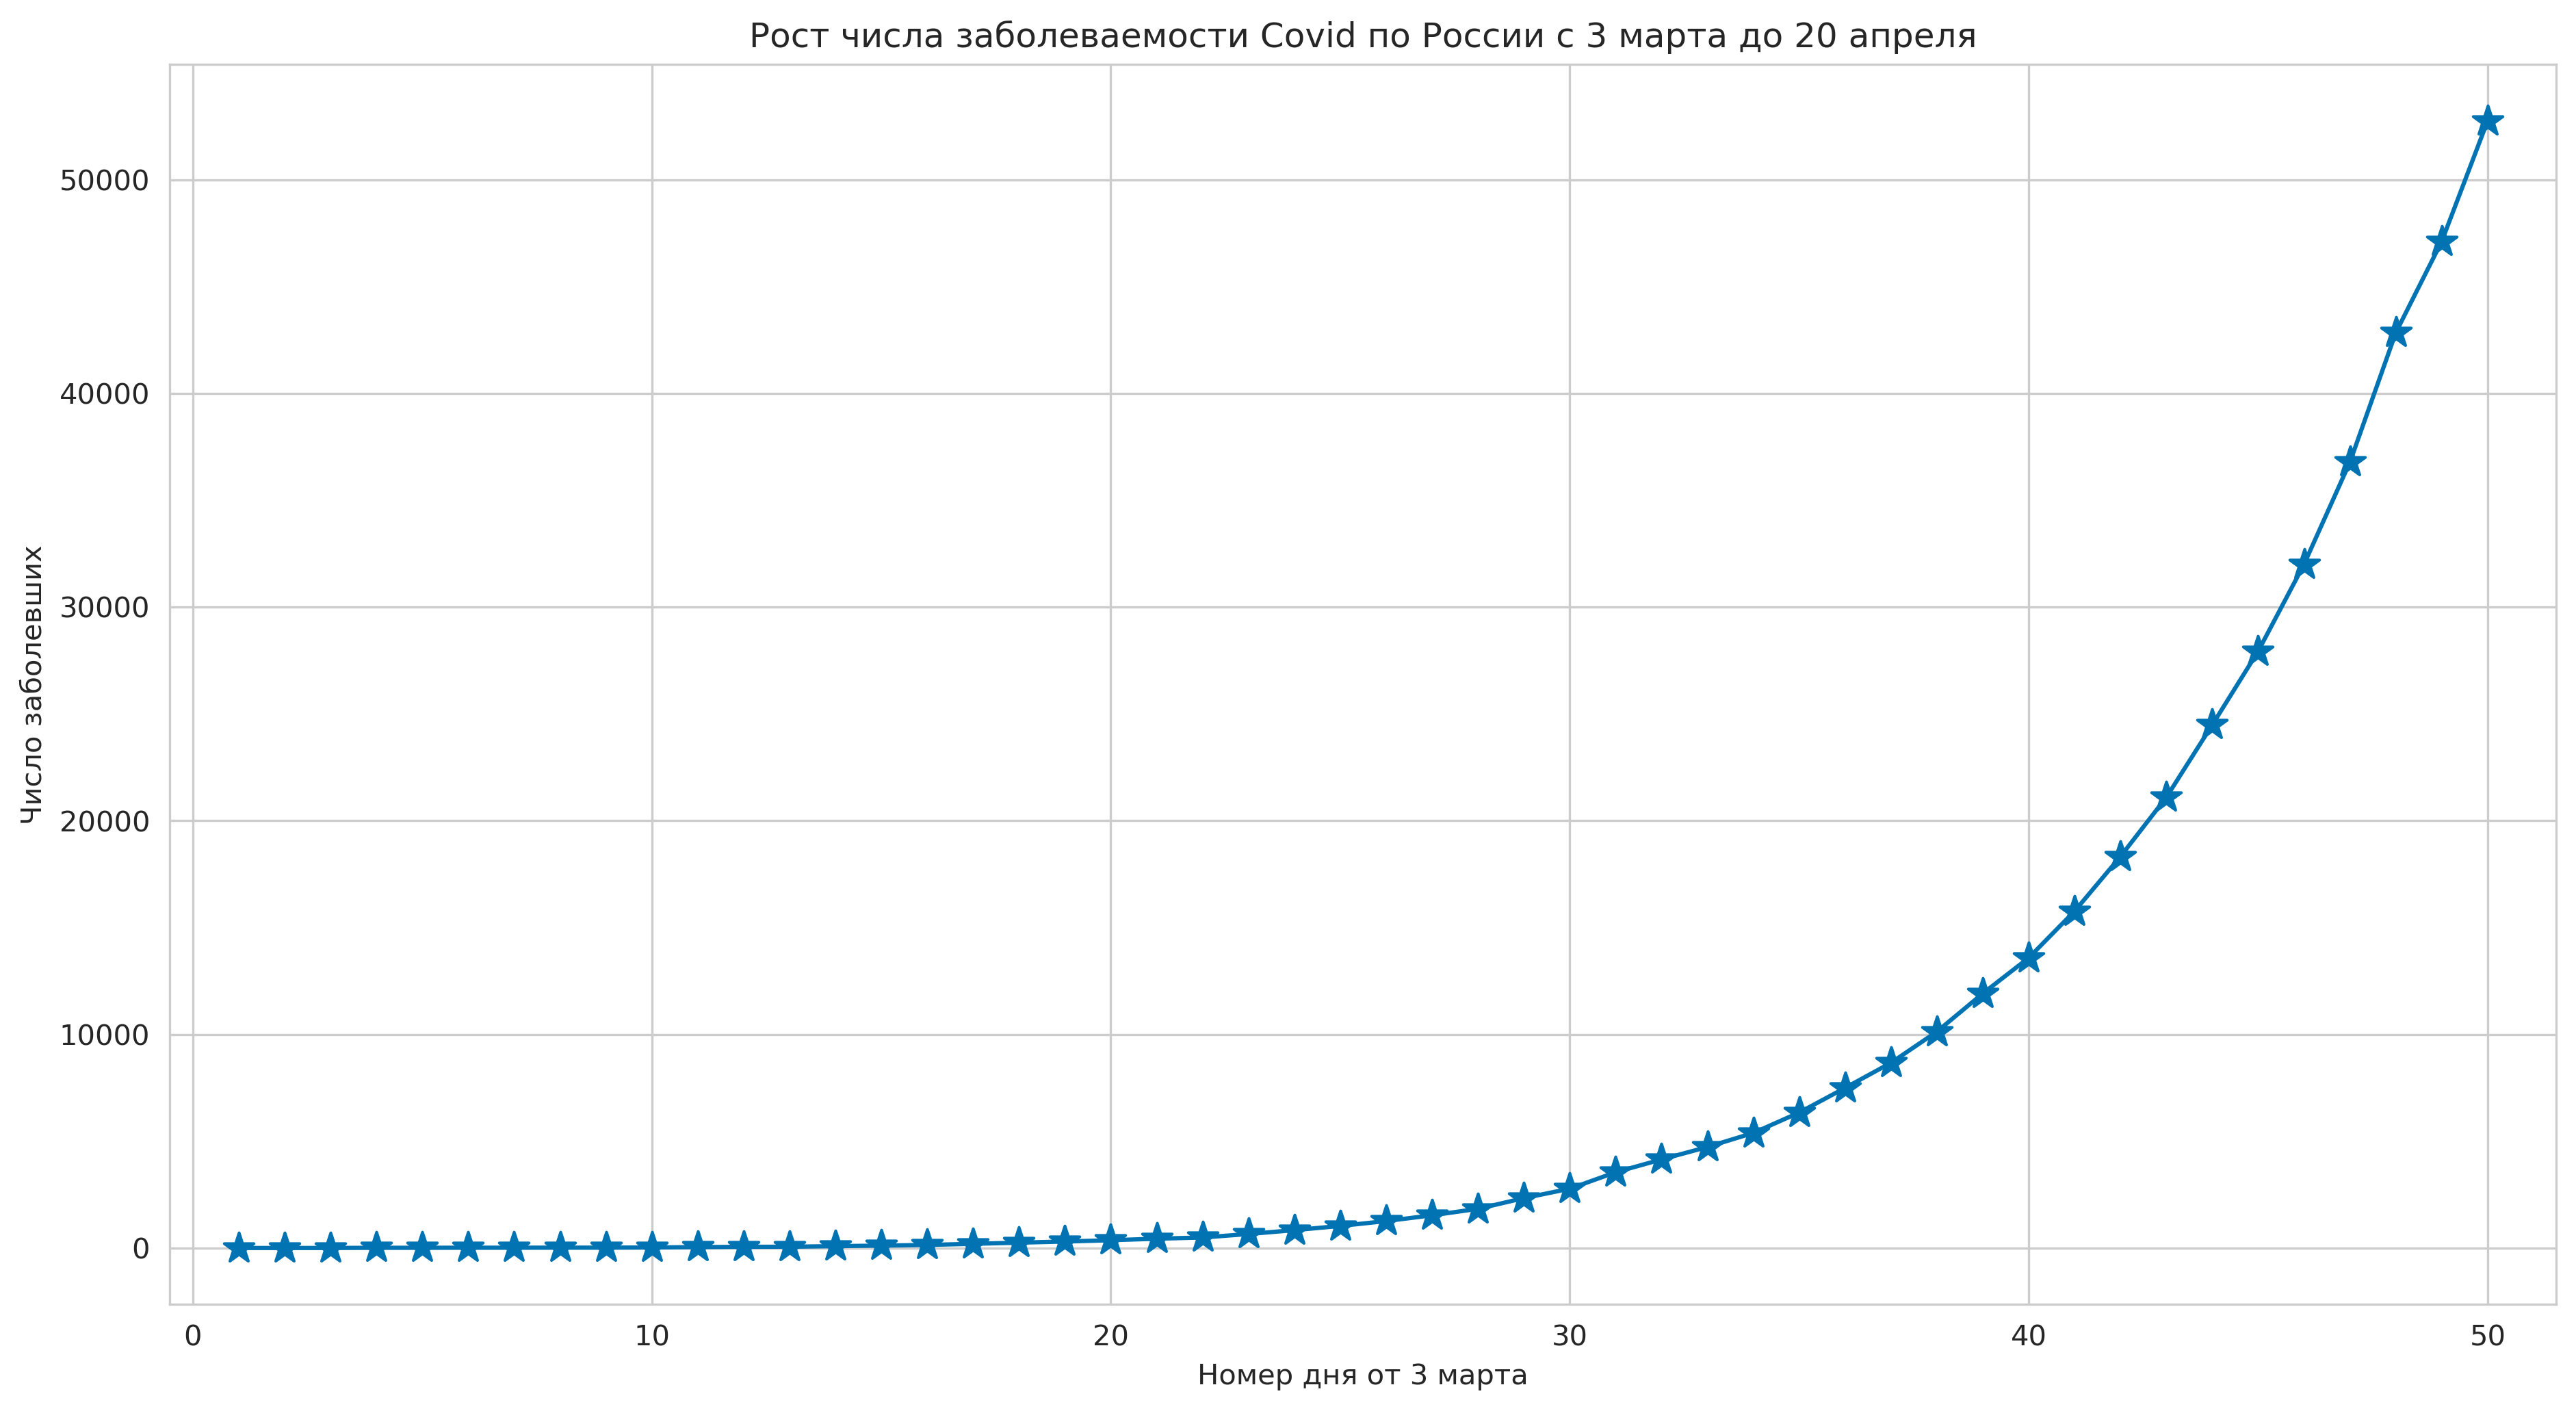

In [7]:
N_days = len(sliced_russia_df)

## X-координаты точек данных
x_days = np.arange(1, N_days + 1)

## Данные
data = sliced_russia_df["total_cases"]

## Для рисования
xs = np.arange(x_days[0] - 1.5, x_days[-1] + 1.5, 0.01)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_title('Рост числа заболеваемости Covid по России с 3 марта до 20 апреля')
ax.set_xlabel('Номер дня от 3 марта')
ax.set_ylabel('Число заболевших')
ax.scatter(x_days, data, marker='*', s=120)
ax.plot(x_days, data)
plt.show()

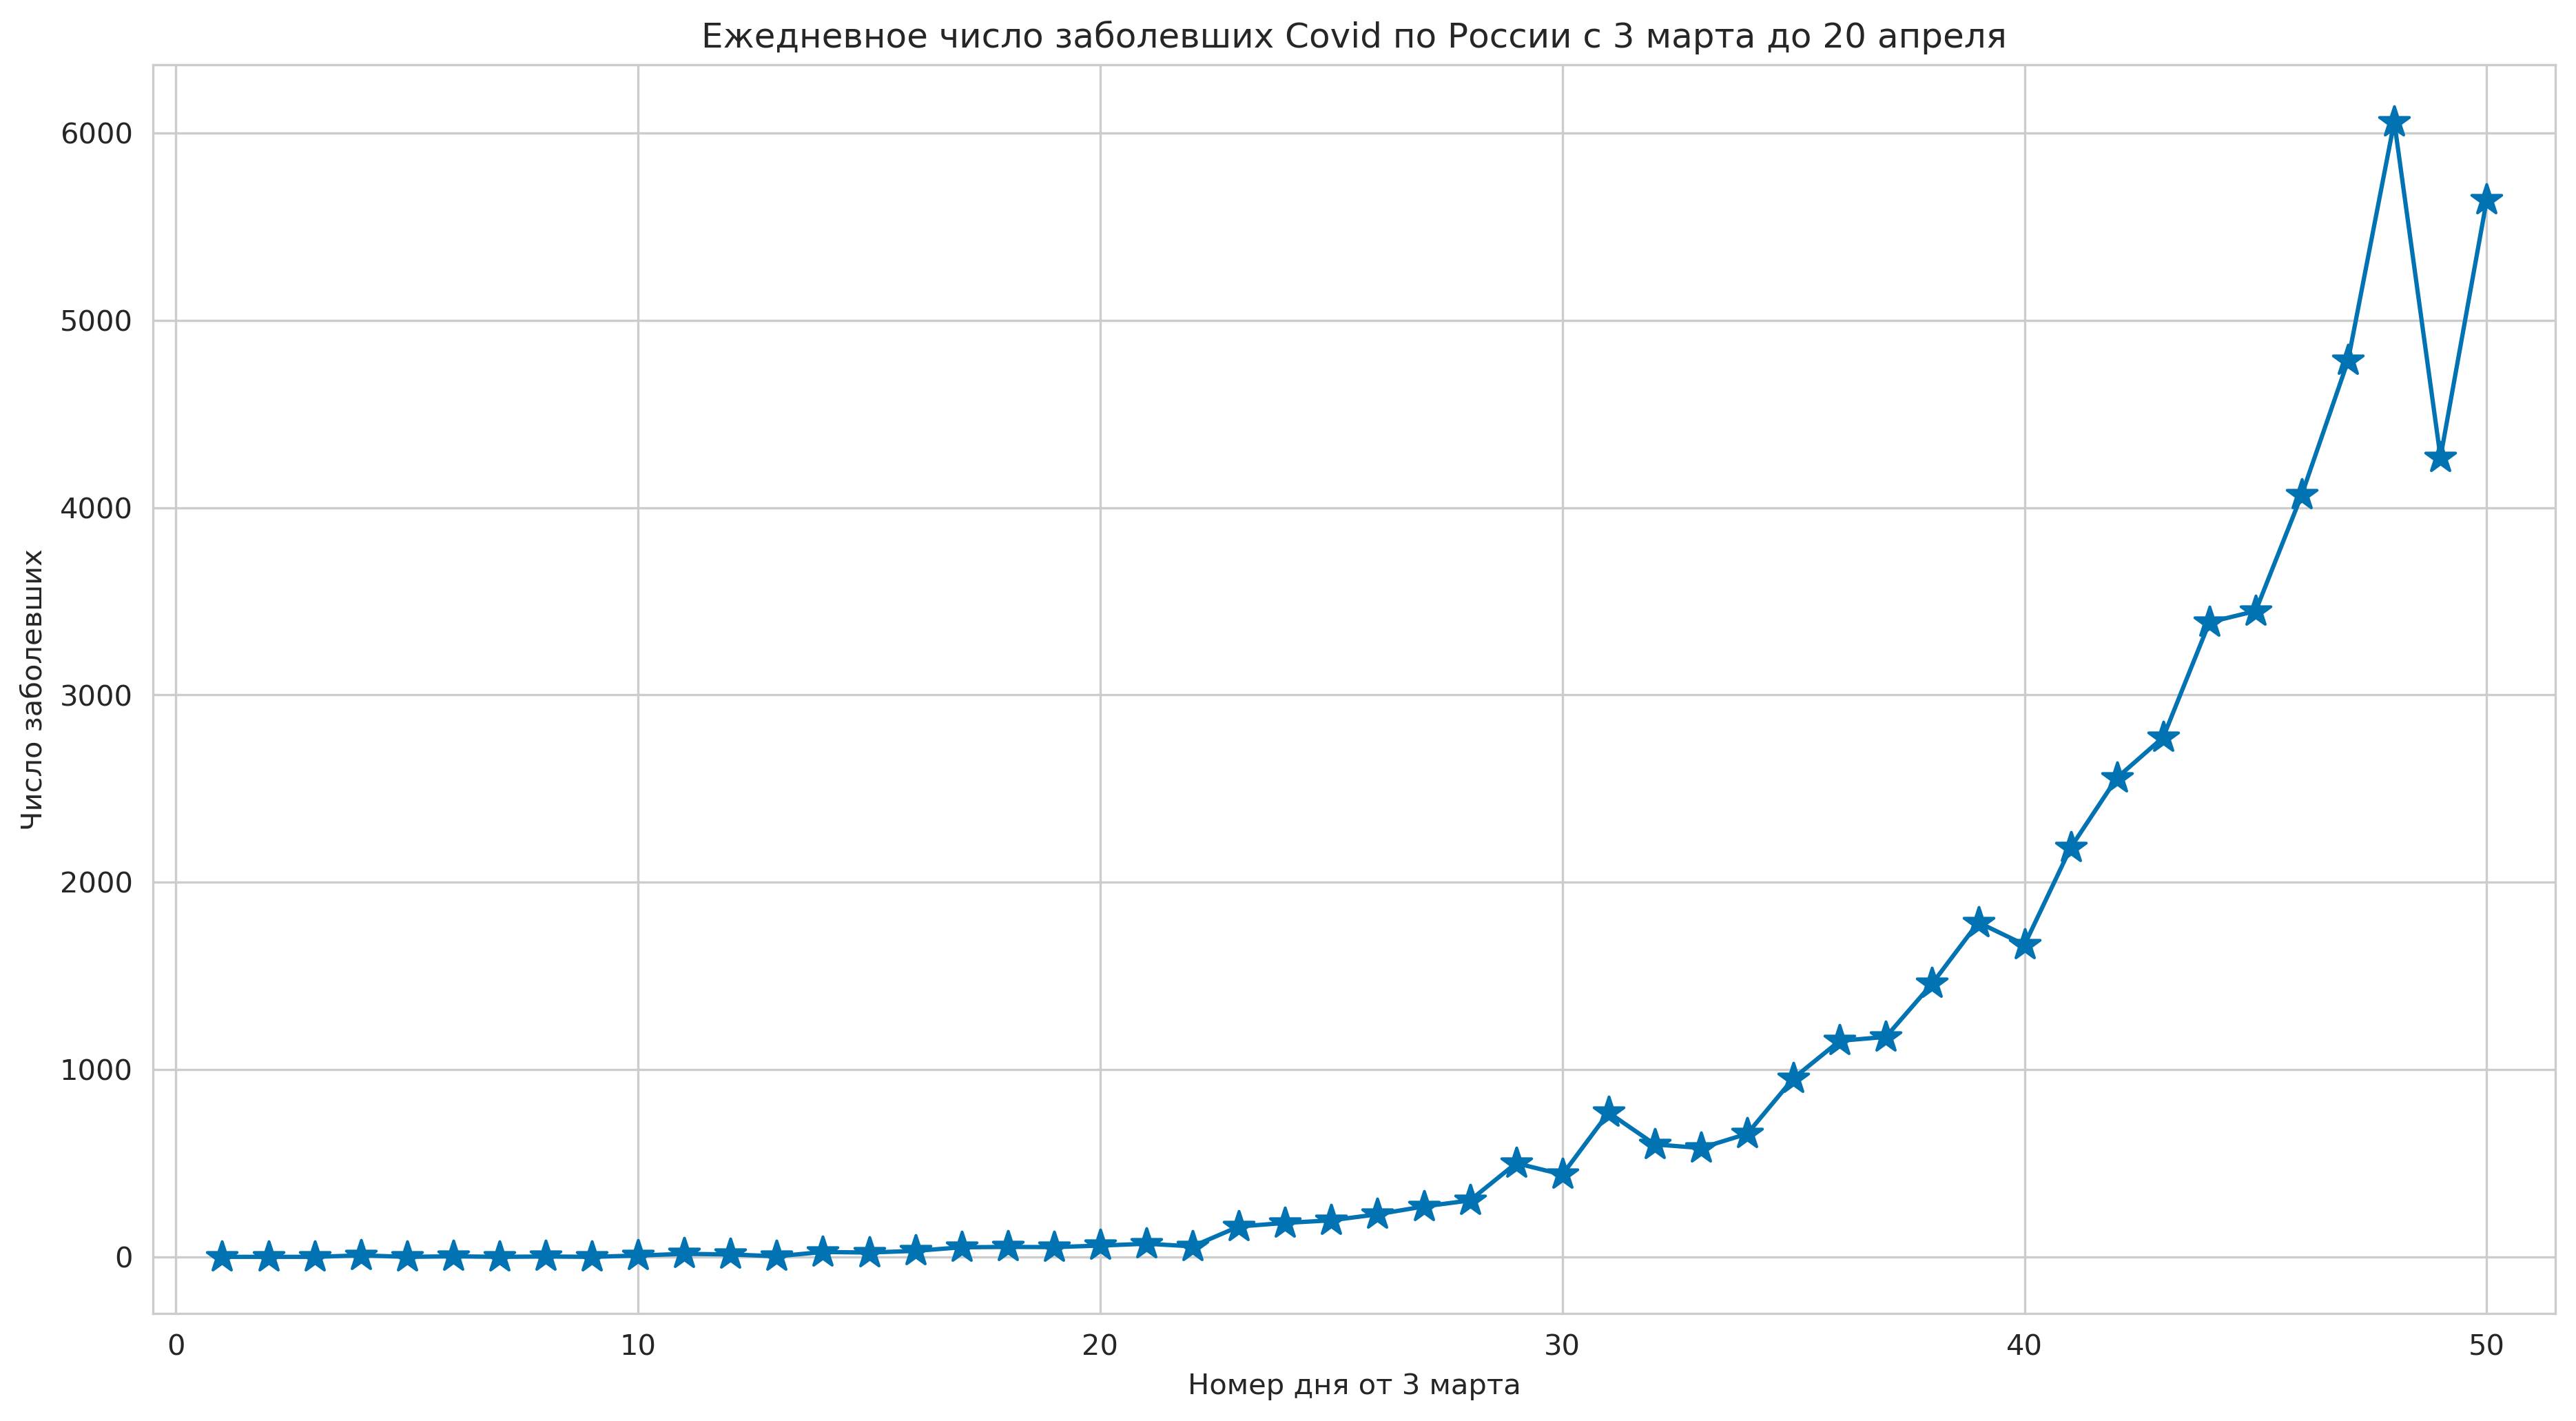

In [8]:
data_daily = sliced_russia_df["new_cases"]

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title('Ежедневное число заболевших Covid по России с 3 марта до 20 апреля')
ax.set_xlabel('Номер дня от 3 марта')
ax.set_ylabel('Число заболевших')
ax.set_xlim((xs[0], xs[-1]))
ax.scatter(x_days, data_daily, marker='*', s=120)
ax.plot(x_days, data_daily)
plt.show()

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом
числа заболевших: ​ y ~ exp(линейная функция от x) ​ , где x — номер текущего
дня.

In [9]:
# Для обучения линейной регрессии с экспоненциальной функцией прологарифмируем таргет
y = np.log(np.array(data))

# Обучим модель
exponential_model = linear_model.LinearRegression()
exponential_model.fit(x_days.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [10]:
# Посмотрим параметры обученной модели (это жай)
w0 = exponential_model.intercept_[0]
w1 = exponential_model.coef_[0][0]
w0, w1

(1.6224462364488117, 0.19829091233588558)

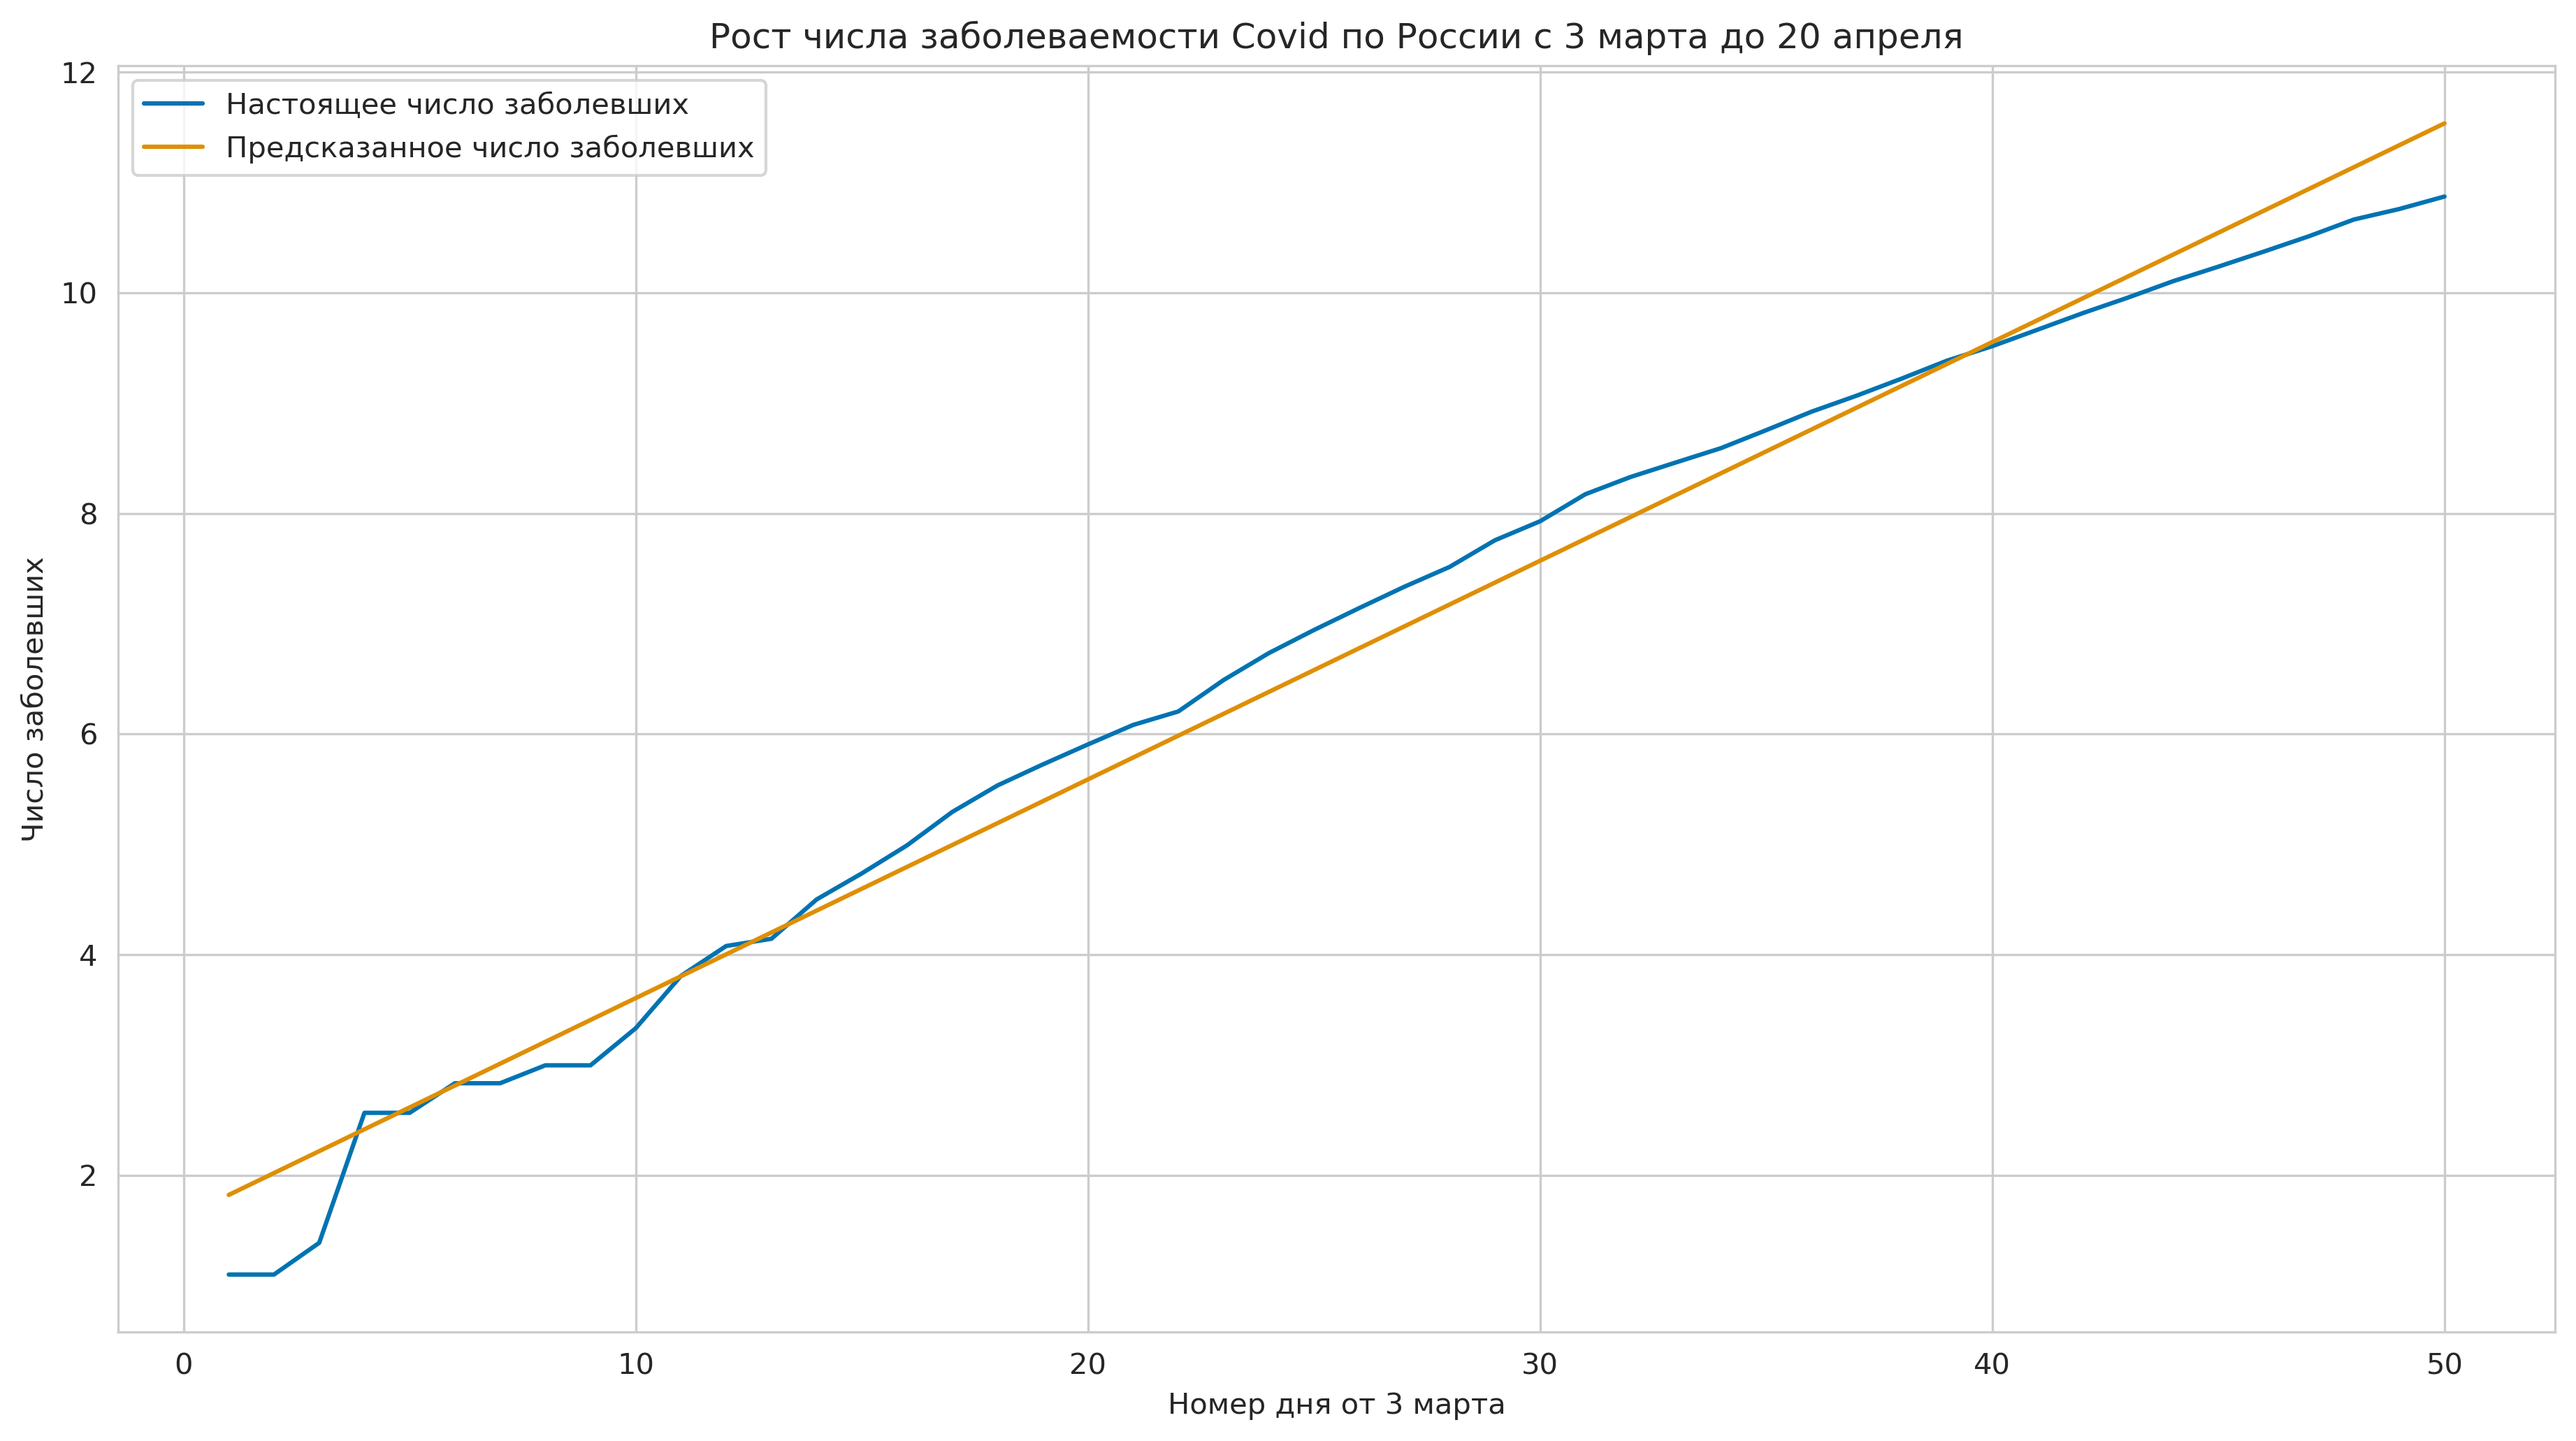

In [11]:
# Построим график по первым 50 дням и посмотрим насколько хорошо экспонента описывает ситуацию
estimated_line = exponential_model.predict(x_days.reshape(-1, 1))

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title('Рост числа заболеваемости Covid по России с 3 марта до 20 апреля')
ax.set_xlabel('Номер дня от 3 марта')
ax.set_ylabel('Число заболевших')
ax.plot(x_days, np.log(data), label="Настоящее число заболевших")
ax.plot(x_days, estimated_line, label="Предсказанное число заболевших")
plt.legend()
plt.show()

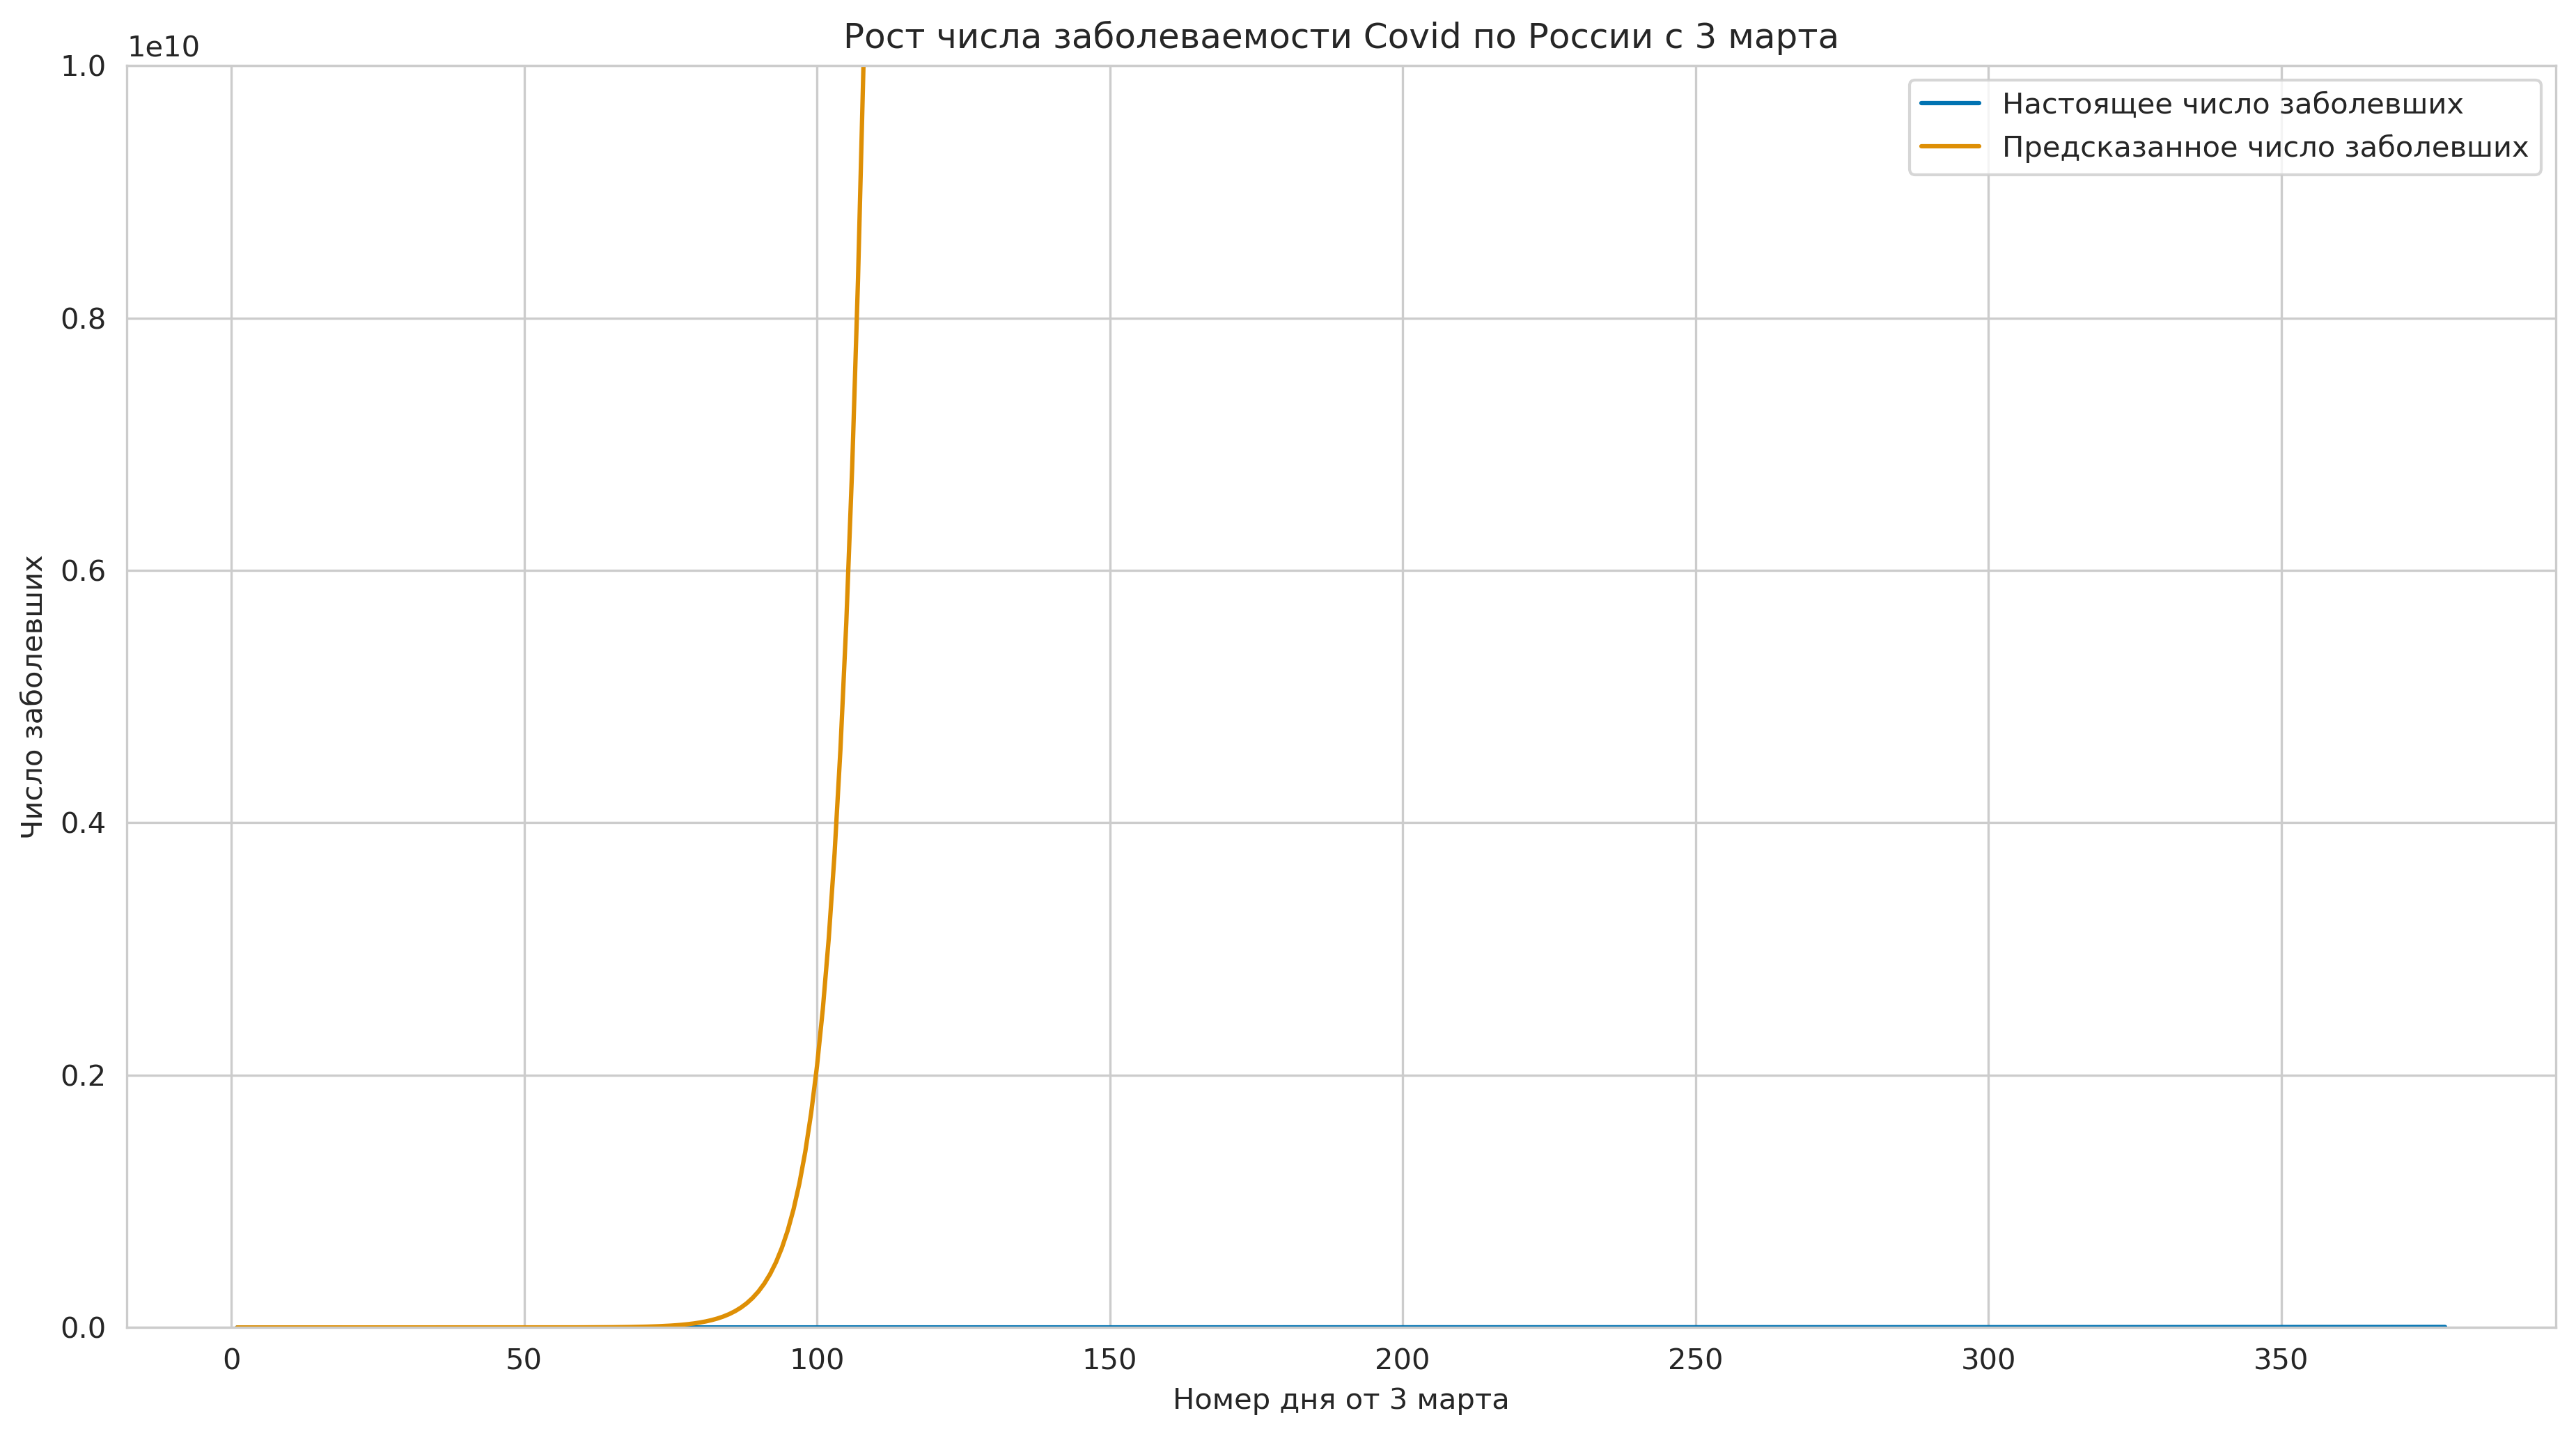

In [12]:
# Построим график по всем доступным дням и посмотрим насколько хорошо экспонента описывает процесс
all_data = russia_df["total_cases"]
all_days = np.arange(1, len(all_data) + 1)
estimated_line = exponential_model.predict(all_days.reshape(-1, 1))

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title('Рост числа заболеваемости Covid по России с 3 марта')
ax.set_xlabel('Номер дня от 3 марта')
ax.set_ylabel('Число заболевших')
ax.set_ylim(0, 10 ** 10)
ax.plot(all_days, all_data, label="Настоящее число заболевших")
ax.plot(all_days, np.exp(estimated_line), label="Предсказанное число заболевших")
plt.legend()
plt.show()

Давайте посмотрим на тот же график, но в log-scale

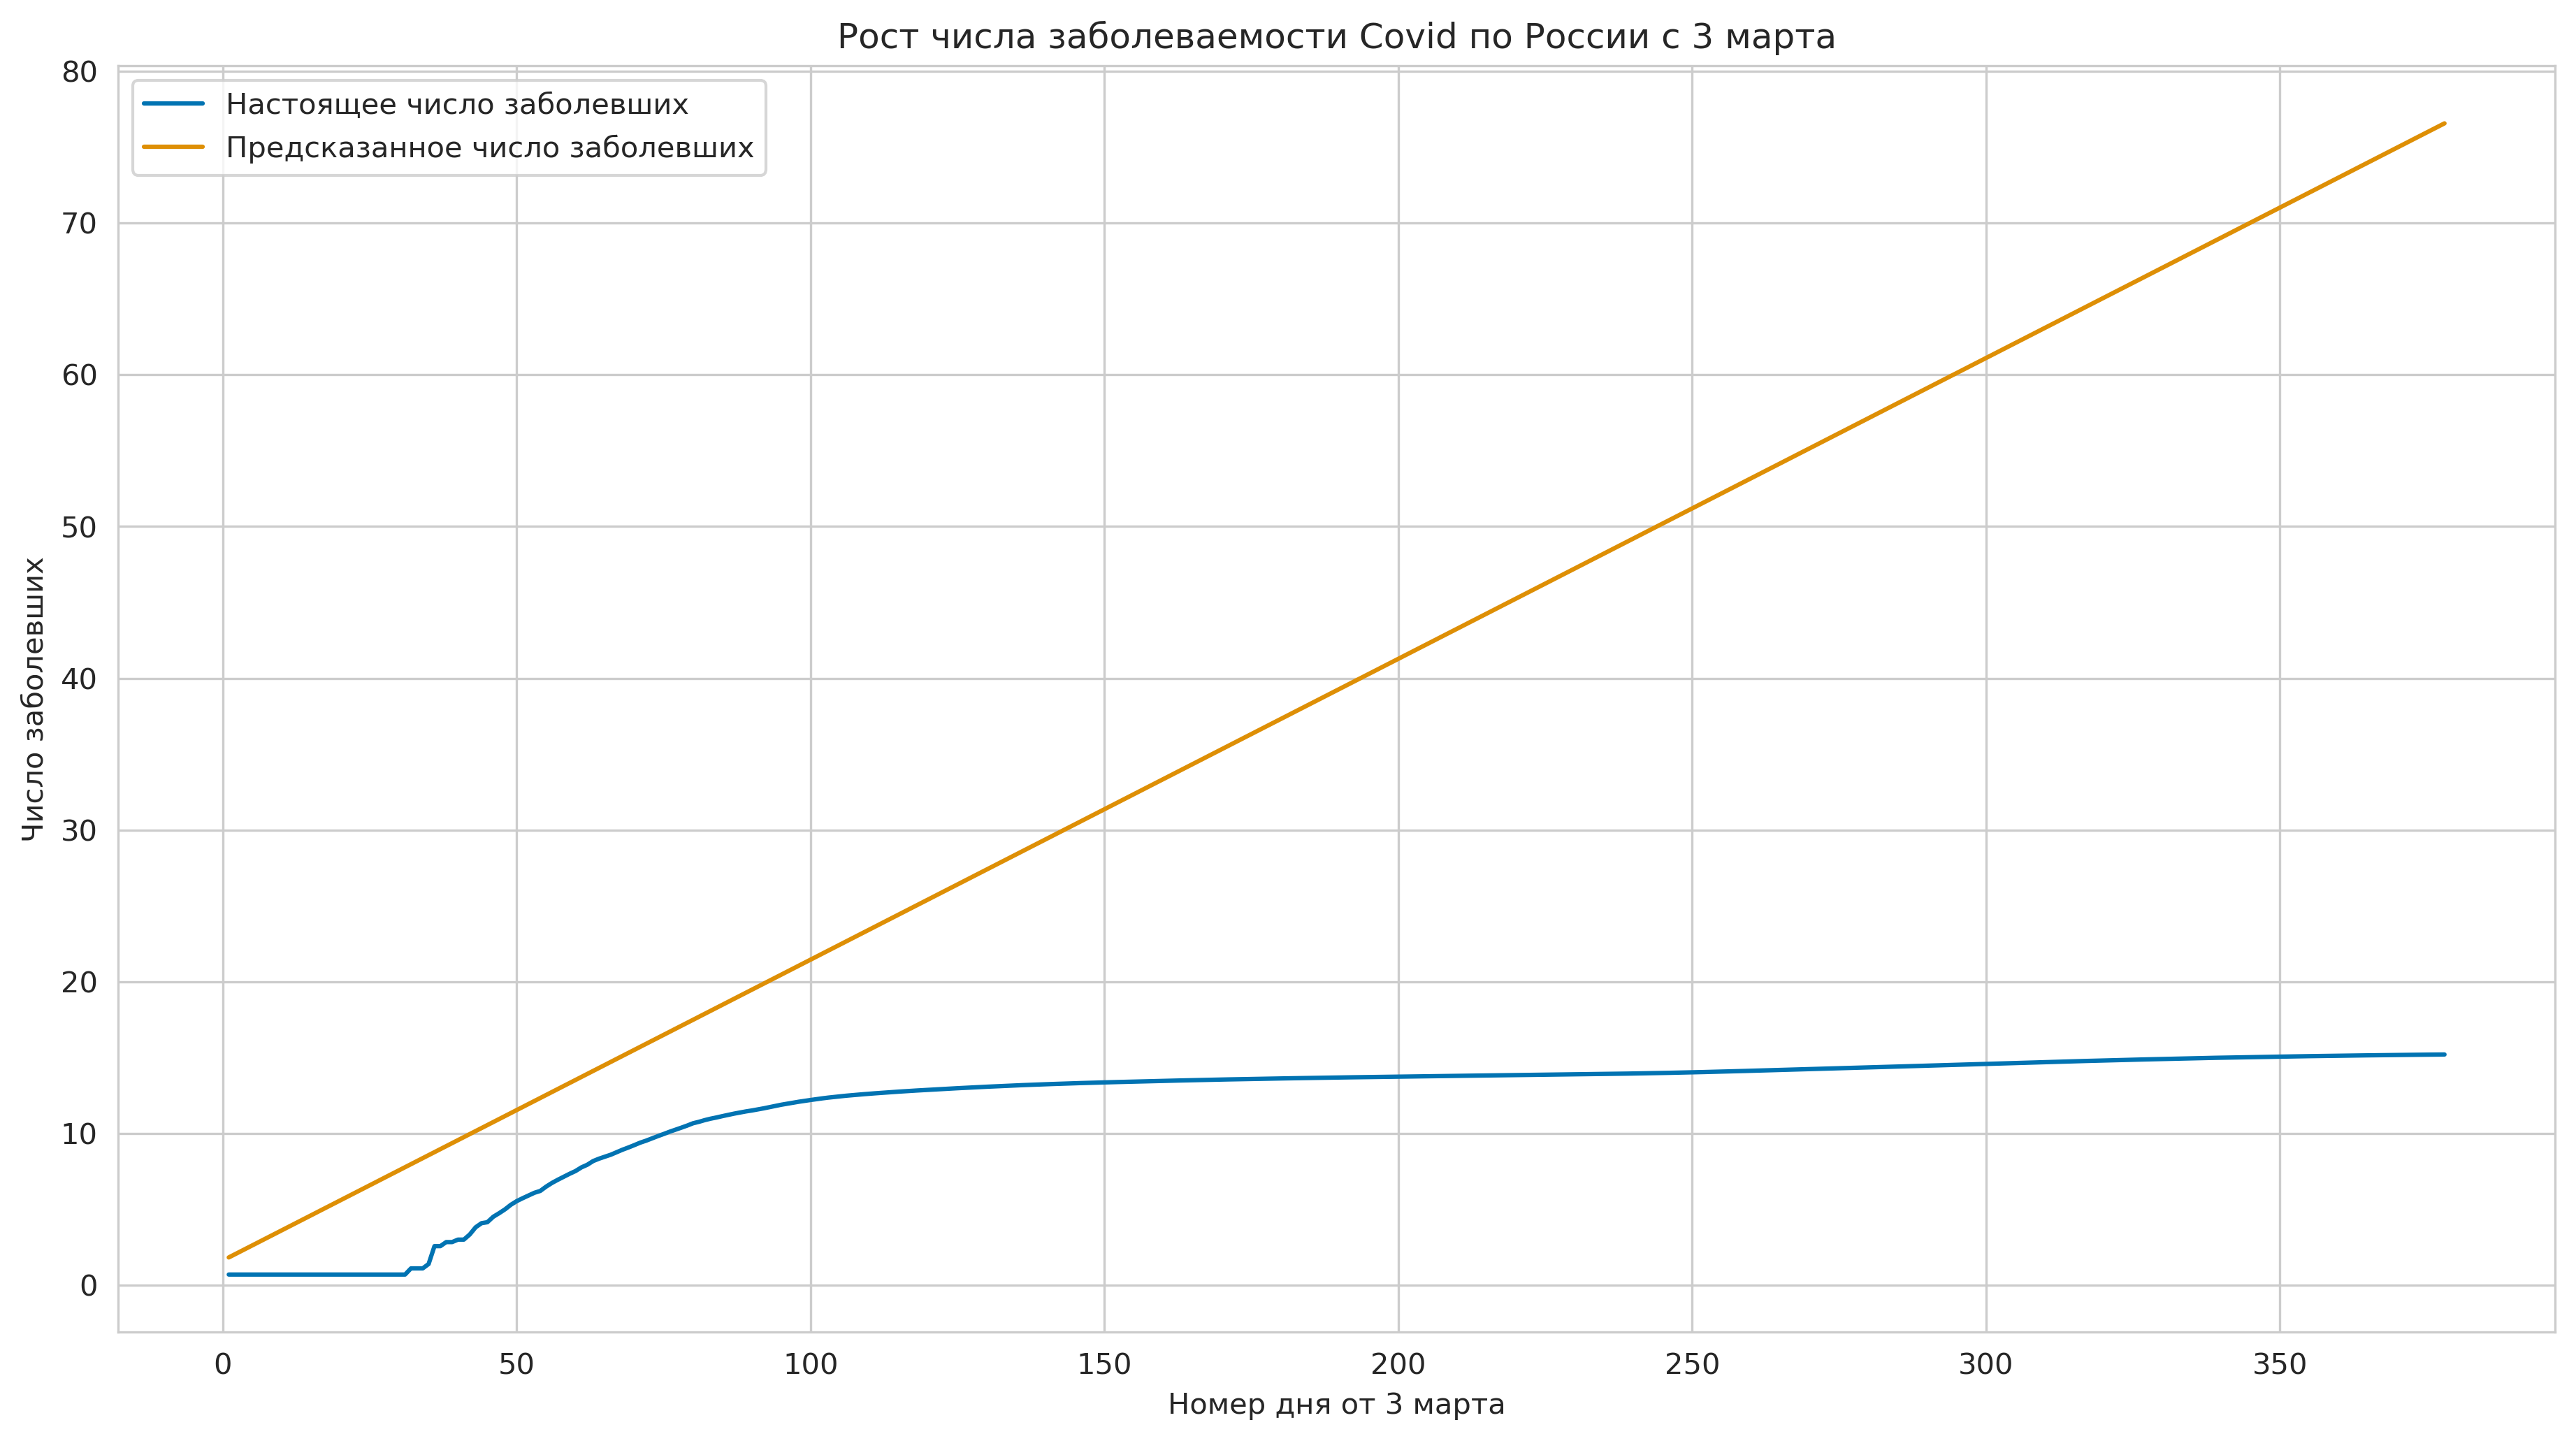

In [13]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title('Рост числа заболеваемости Covid по России с 3 марта')
ax.set_xlabel('Номер дня от 3 марта')
ax.set_ylabel('Число заболевших')
ax.plot(all_days, np.log(all_data), label="Настоящее число заболевших")
ax.plot(all_days, estimated_line, label="Предсказанное число заболевших")
plt.legend()
plt.show()

b. Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели (это фактически первый шаг
эмпирического Байеса).

Решил написать класс кастомной линейной регрессии, так как без него получается очень плохой код, а с ним просто плохой

In [14]:
def bayesian_update(mu, sigma, x_matrix, y, sigma_noise=0.25):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y) )
    return mu_n, sigma_n

class LinRegression:
    def __init__(self, mu=np.array([0, 0]), sigma=np.array([[2, 0], [0, 2]]), sigma_noise=0.25):
        self.mu = mu
        self.sigma = sigma
        self.sigma_noise = sigma_noise
        
    def predict(self, x, mu=None):
        if mu is None:
            mu = self.mu
        n_samples = x.shape[0]
        bias = np.ones((n_samples, 1))
        x = np.concatenate([bias, x], axis=-1)
        return x @ mu
    
    def fit(self, x, y):
        n_samples = x.shape[0]
        bias = np.ones((n_samples, 1))
        x = np.concatenate([bias, x], axis=-1)
        for s_x, s_y in zip(x, y):
            s_x = s_x.reshape(1, -1)
            self.mu, self.sigma = bayesian_update(self.mu, self.sigma, s_x, s_y, sigma_noise=0.25)
        
    def sample(self, x, n=200):
        w_s = np.random.multivariate_normal(self.mu, self.sigma, n)
        predictions = []
        for weights in w_s:
            predictions.append(self.predict(x, weights))
        return np.array(predictions)

In [15]:
# посчитаем дисперсию шума следующей формулой

def var(target, predicted):
    diff = target - predicted
    return np.mean(diff ** 2)

target = np.log(np.array(data)).reshape(-1, 1)
predicted = exponential_model.predict(x_days.reshape(-1, 1))
sigma = np.sqrt(var(target, predicted))

print("Дисперсия шума равна", sigma ** 2)

Дисперсия шума равна 0.12183046154391235


In [16]:
custom_model = LinRegression(sigma_noise=sigma)
custom_model.fit(x_days.reshape(-1, 1), y.reshape(-1, 1))

In [17]:
cur_mu, cur_sigma = custom_model.mu, custom_model.sigma

print(f"Апостериорное распределение параметров этой модели это Гауссиан со средним {cur_mu} и дисперсией {cur_sigma}")

Апостериорное распределение параметров этой модели это Гауссиан со средним [1.61829184 0.19841417] и дисперсией [[ 5.13980667e-03 -1.52667414e-04]
 [-1.52667414e-04  5.99069925e-06]]


Апостериорное распределение параметров этой модели это Гауссиан со средним cur_mu и дисперсией cur_sigma

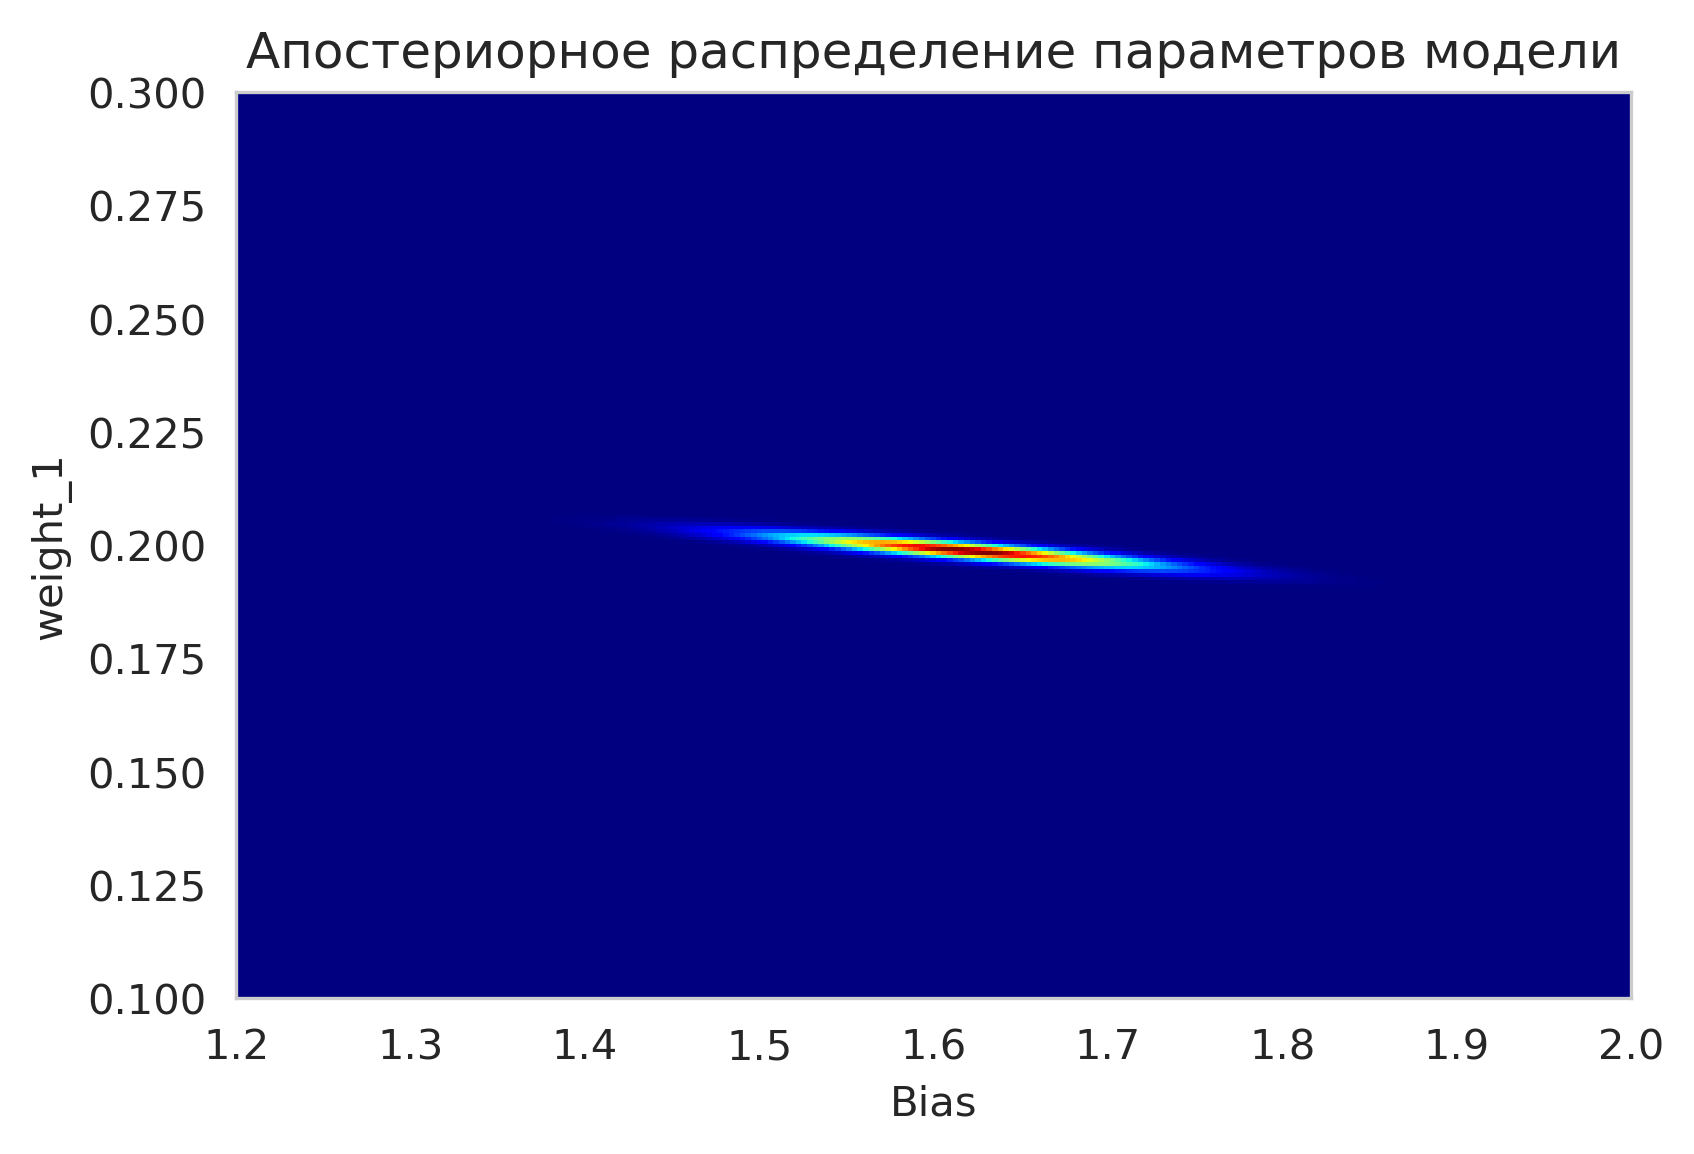

In [18]:
N = 250

lims = ((1.2, 2), (0.1, .3))

xs = np.linspace(-3, 3, N)
X = np.linspace(*lims[0], N)
Y = np.linspace(*lims[1], N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

plt.xlim(lims[0])
plt.ylim(lims[1])
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.title('Апостериорное распределение параметров модели')
plt.xlabel('Bias')
plt.ylabel('weight_1')
plt.show()

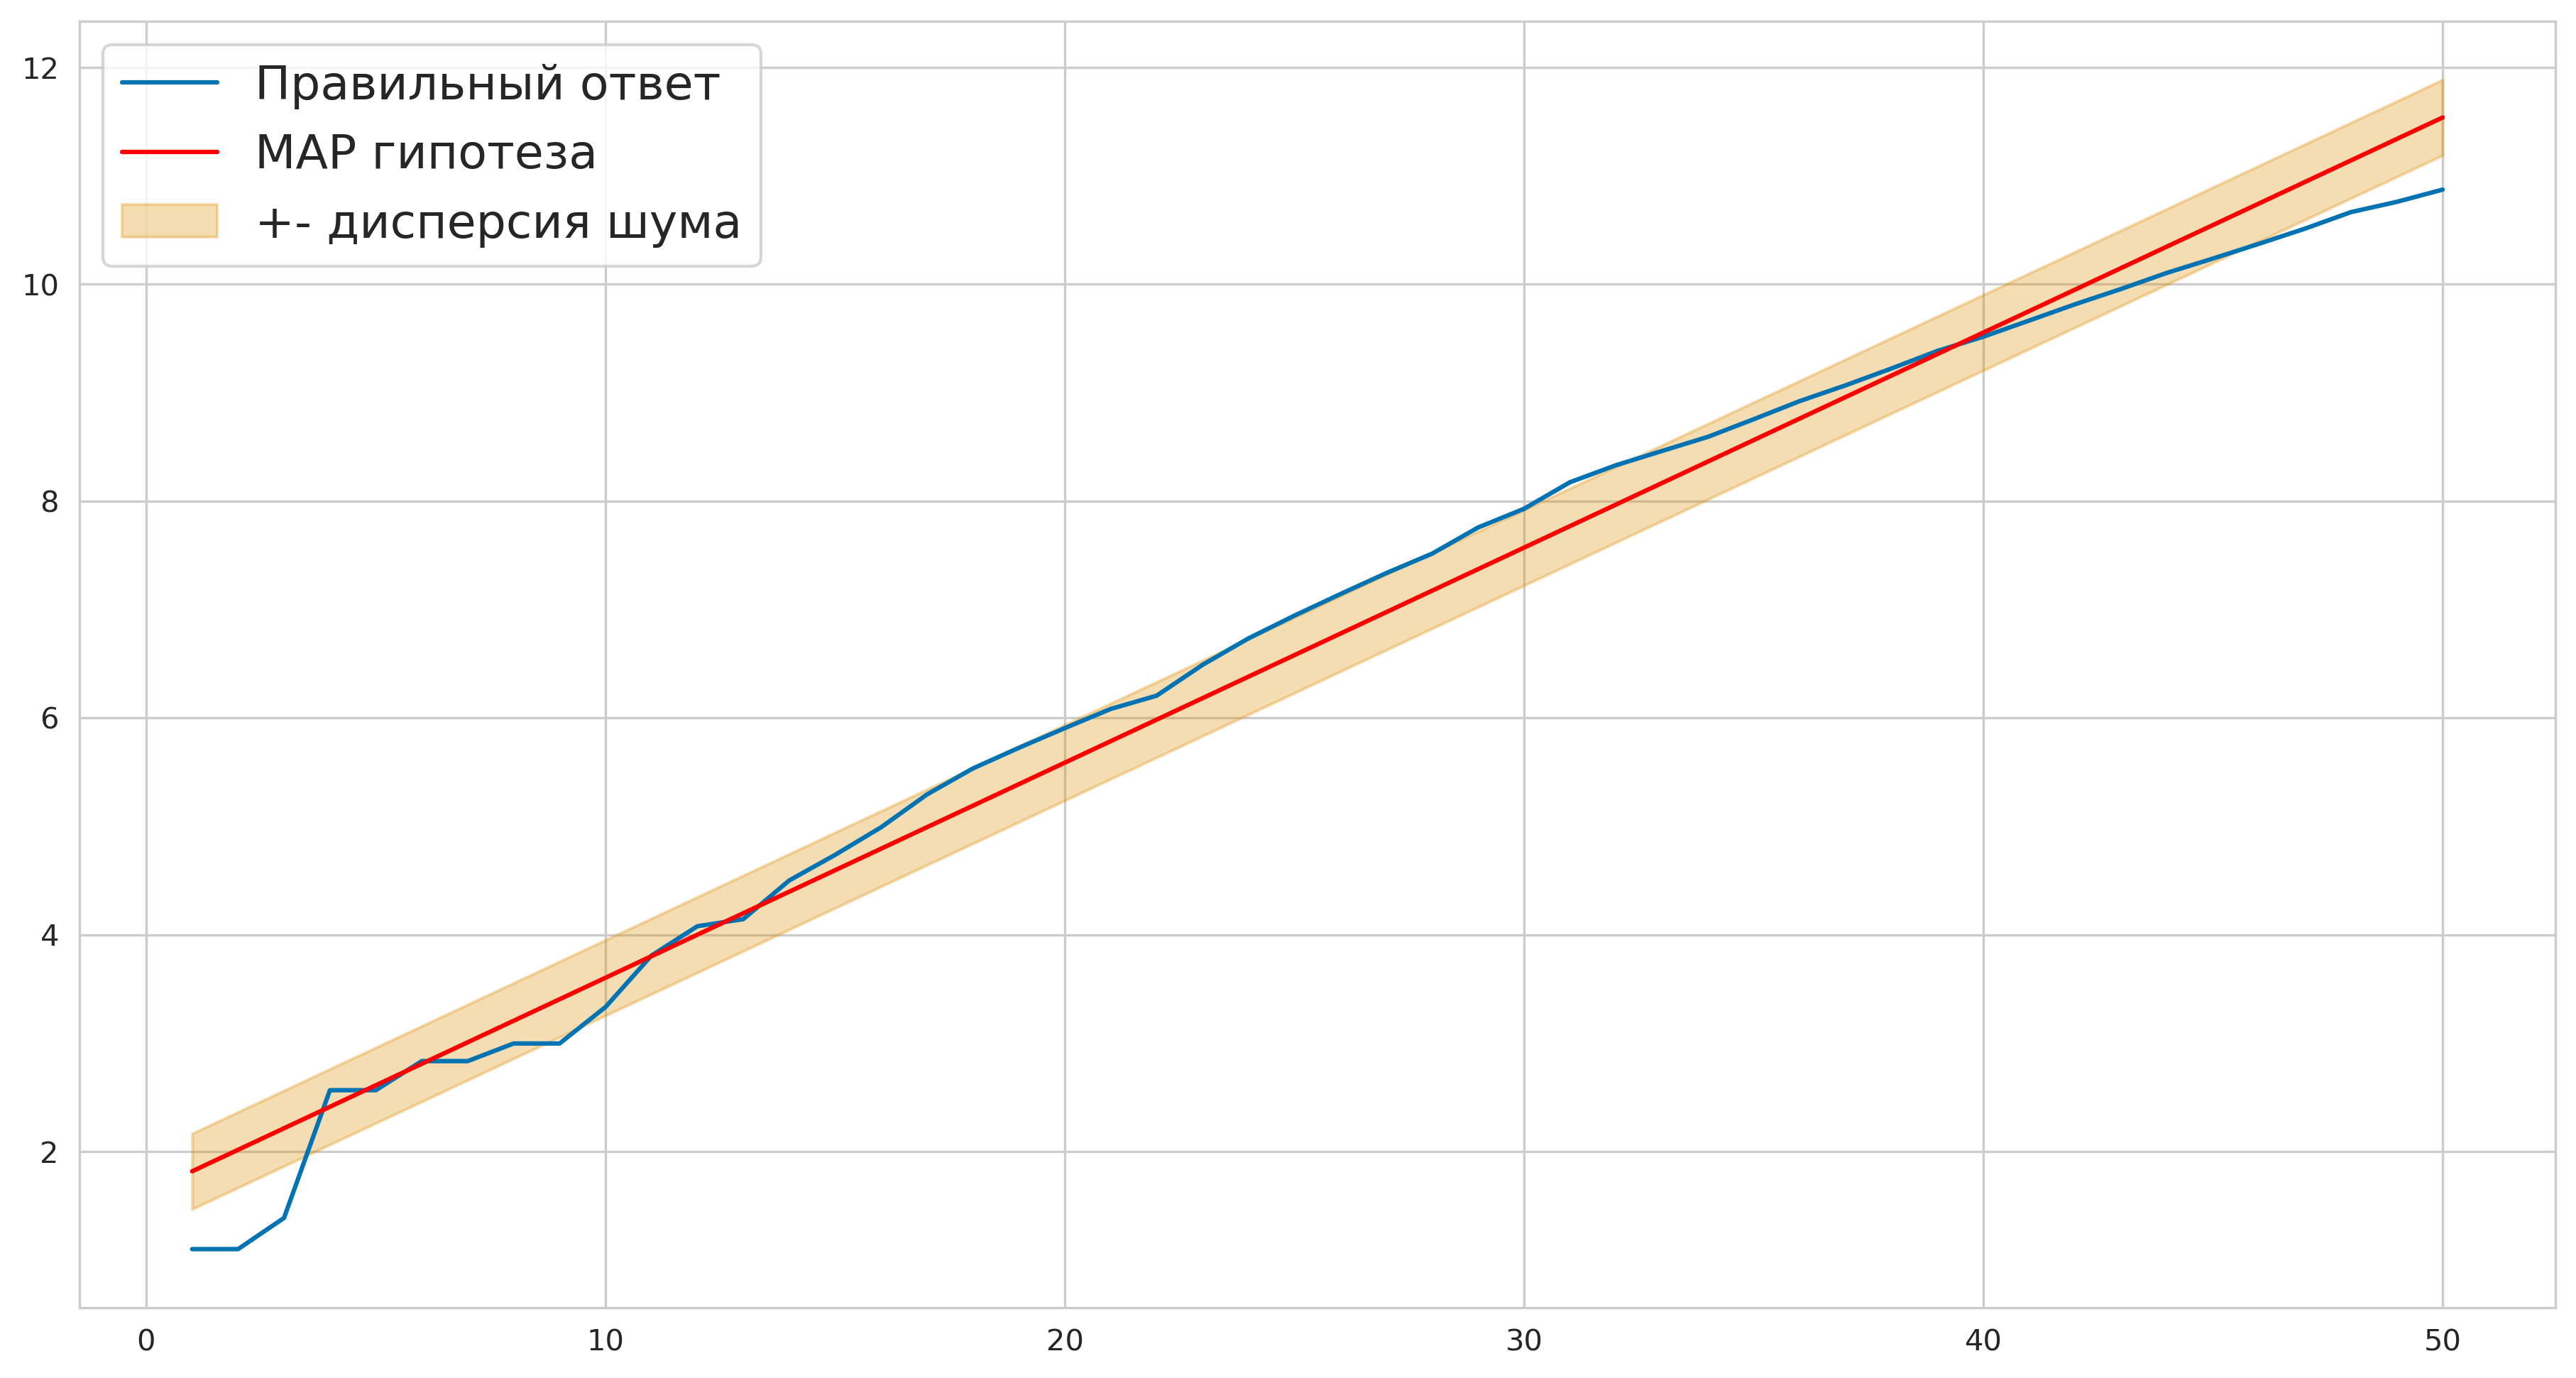

In [19]:
# Нарисуем результат для первых 50 дней
def plot_predictions(xs, ys, model, sigma):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.plot(xs, np.log(ys), label="Правильный ответ")
    ax.plot(xs, model.predict(xs), color="red", label="MAP гипотеза")
    ax.fill_between(xs[:, 0], model.predict(xs) - sigma, model.predict(xs) + sigma, color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.legend(fontsize=legend_fontsize)
    
plot_predictions(x_days.reshape(-1, 1), data, custom_model, sigma)

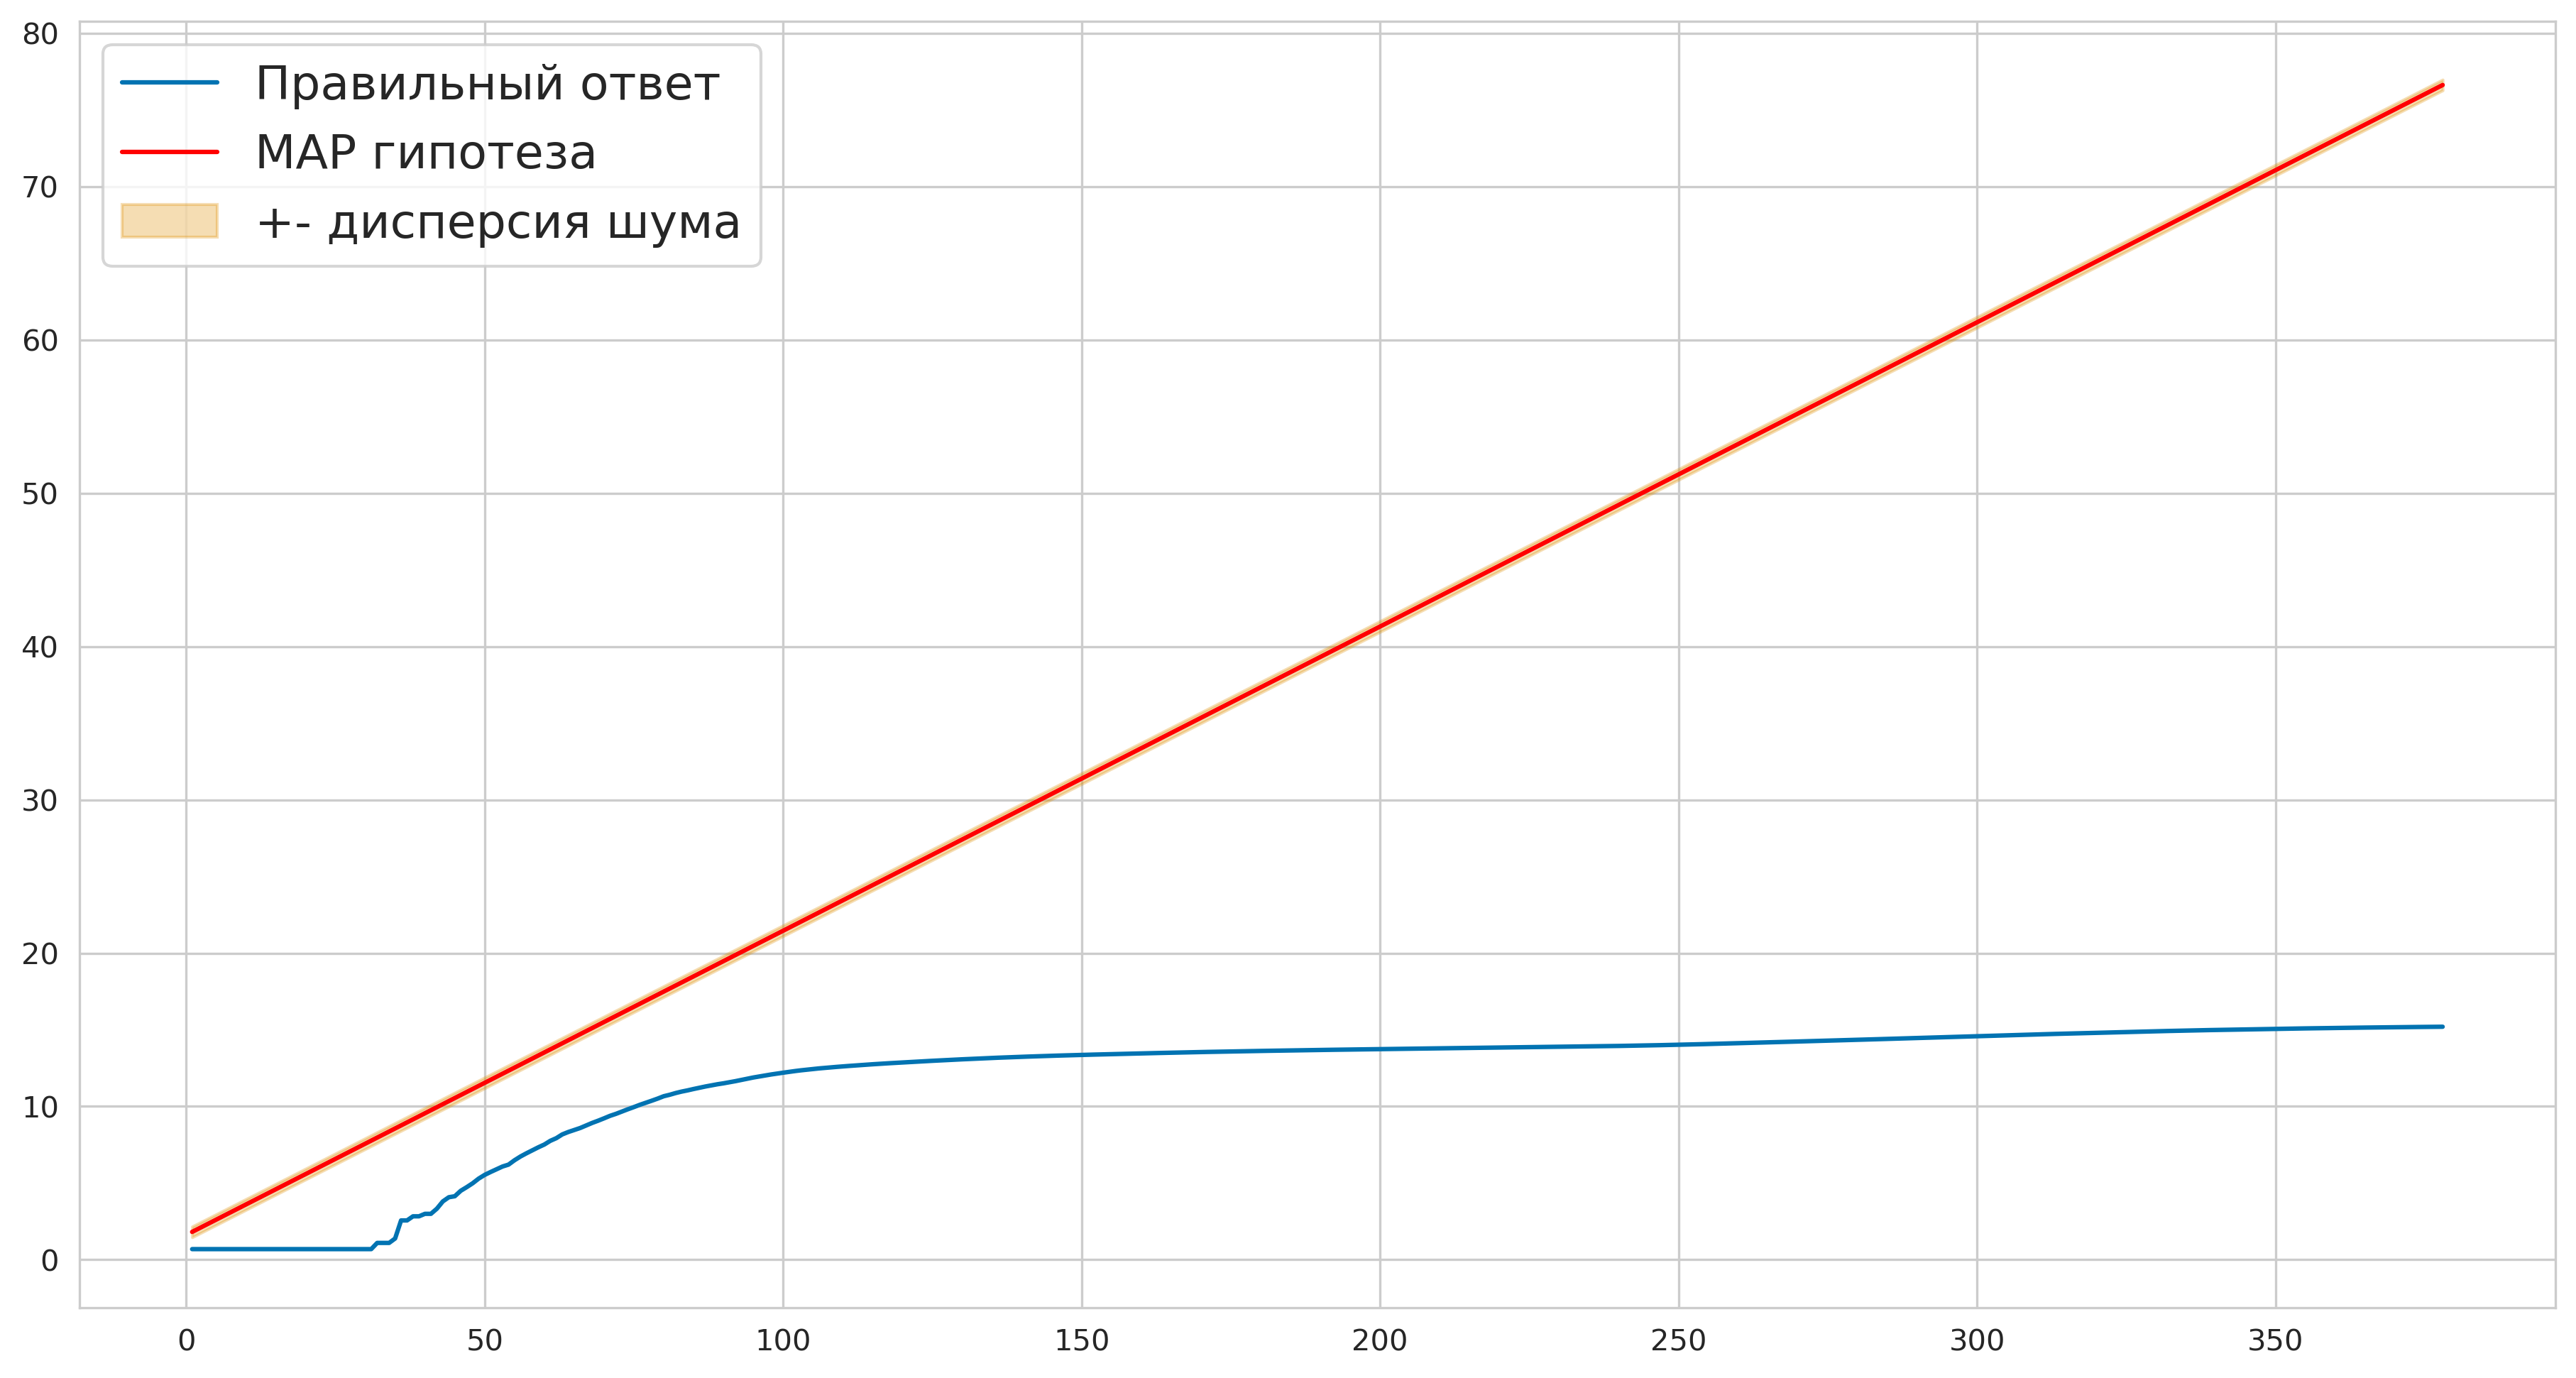

In [20]:
# Нарисуем результат для всех данных

plot_predictions(all_days.reshape(-1, 1), all_data, custom_model, sigma)

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя
из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая
2020 года? к 1 июня? к 1 сентября? Постройте предсказательные
распределения (можно эмпирически, исходя из данных сэмплирования).

In [110]:
date_start = pd.to_datetime('2020-03-03')
date_may = pd.to_datetime('2020-05-01')
date_june = pd.to_datetime('2020-06-01')
date_sept = pd.to_datetime('2020-09-01')

x_may = np.array([[(date_may - date_start).days]])
x_june = np.array([[(date_june - date_start).days]])
x_sept = np.array([[(date_sept - date_start).days]])

In [22]:
# Посэмплируем много разных экспонент для всех дней
sampled_exps = custom_model.sample(all_days.reshape(-1, 1), 10000)

К 1 мая модель предсказывает всего 612146 случаев
К 1 июня модель предсказывает всего 287164780 случаев
К 1 сентября модель предсказывает всего 24310141500773208 случаев


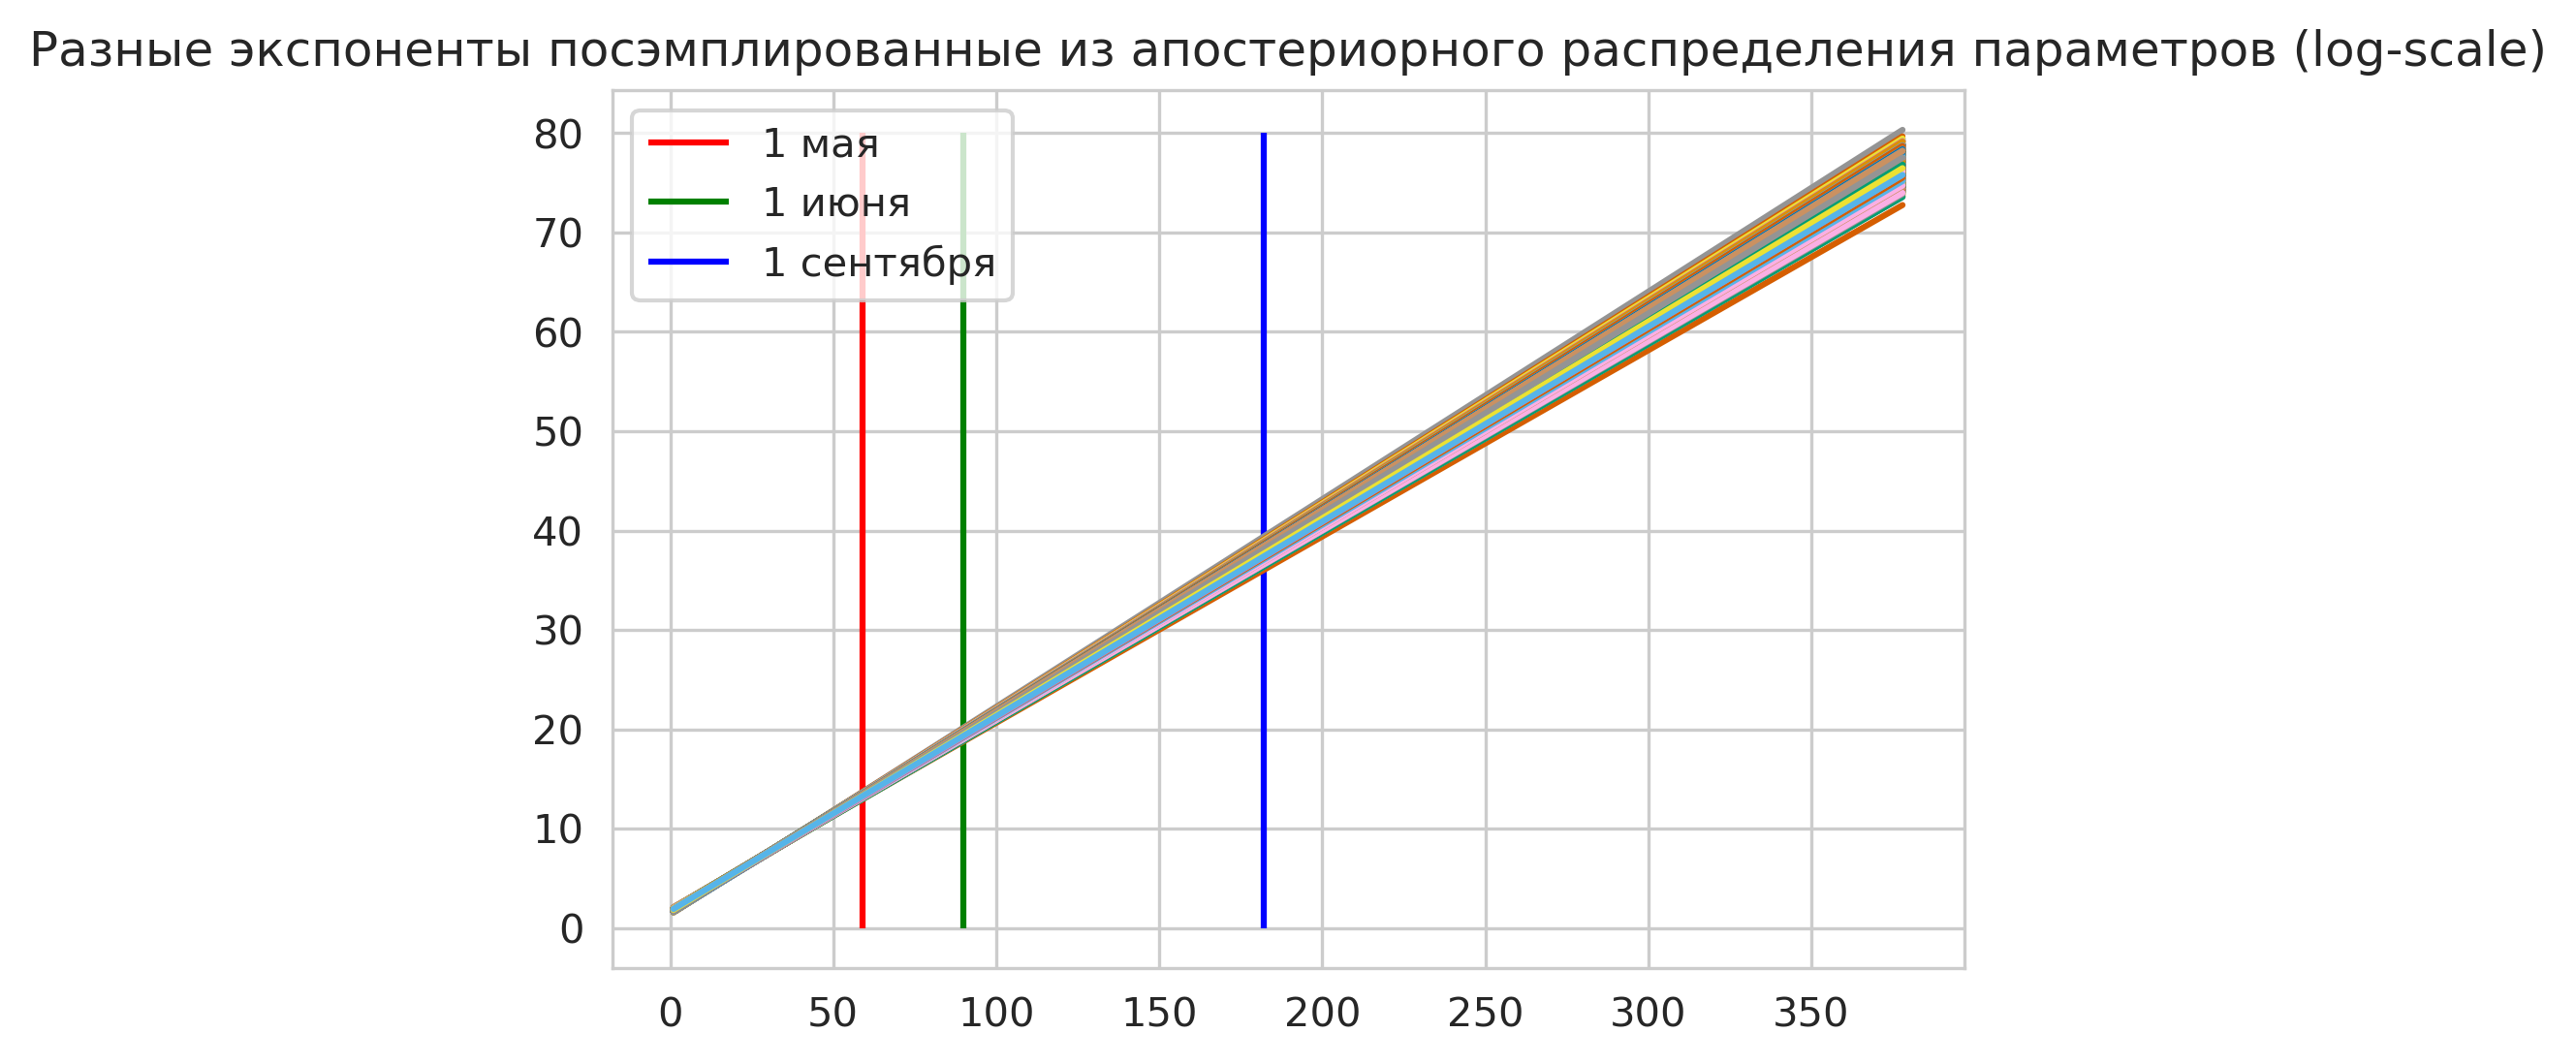

In [23]:
y_may_total = int(np.exp(custom_model.predict(x_may)))
y_june_total = int(np.exp(custom_model.predict(x_june)))
y_sept_total = int(np.exp(custom_model.predict(x_sept)))

print(f'К 1 мая модель предсказывает всего {y_may_total} случаев')
print(f'К 1 июня модель предсказывает всего {y_june_total} случаев')
print(f'К 1 сентября модель предсказывает всего {y_sept_total} случаев')

for i in range(sampled_exps.shape[0]):
    plt.plot(all_days, sampled_exps[i])

plt.vlines(x_may, ymin=0, ymax=80, colors='r', label="1 мая")
plt.vlines(x_june, ymin=0, ymax=80, colors='g', label="1 июня")
plt.vlines(x_sept, ymin=0, ymax=80, colors='b', label="1 сентября")
plt.title("Разные экспоненты посэмплированные из апостериорного распределения параметров (log-scale)")
plt.xlabel = "Номера дней от 3 марта"
plt.ylabel = "Ln(y)"
plt.legend()
plt.show()

In [146]:
def predictive_distribution(model, x):
    mu = model.predict(x)
    x = np.array([[1, x[0][0]]])
    var = model.sigma_noise ** 2 + x @ model.sigma @ x.T
    return mu, np.sqrt(var)

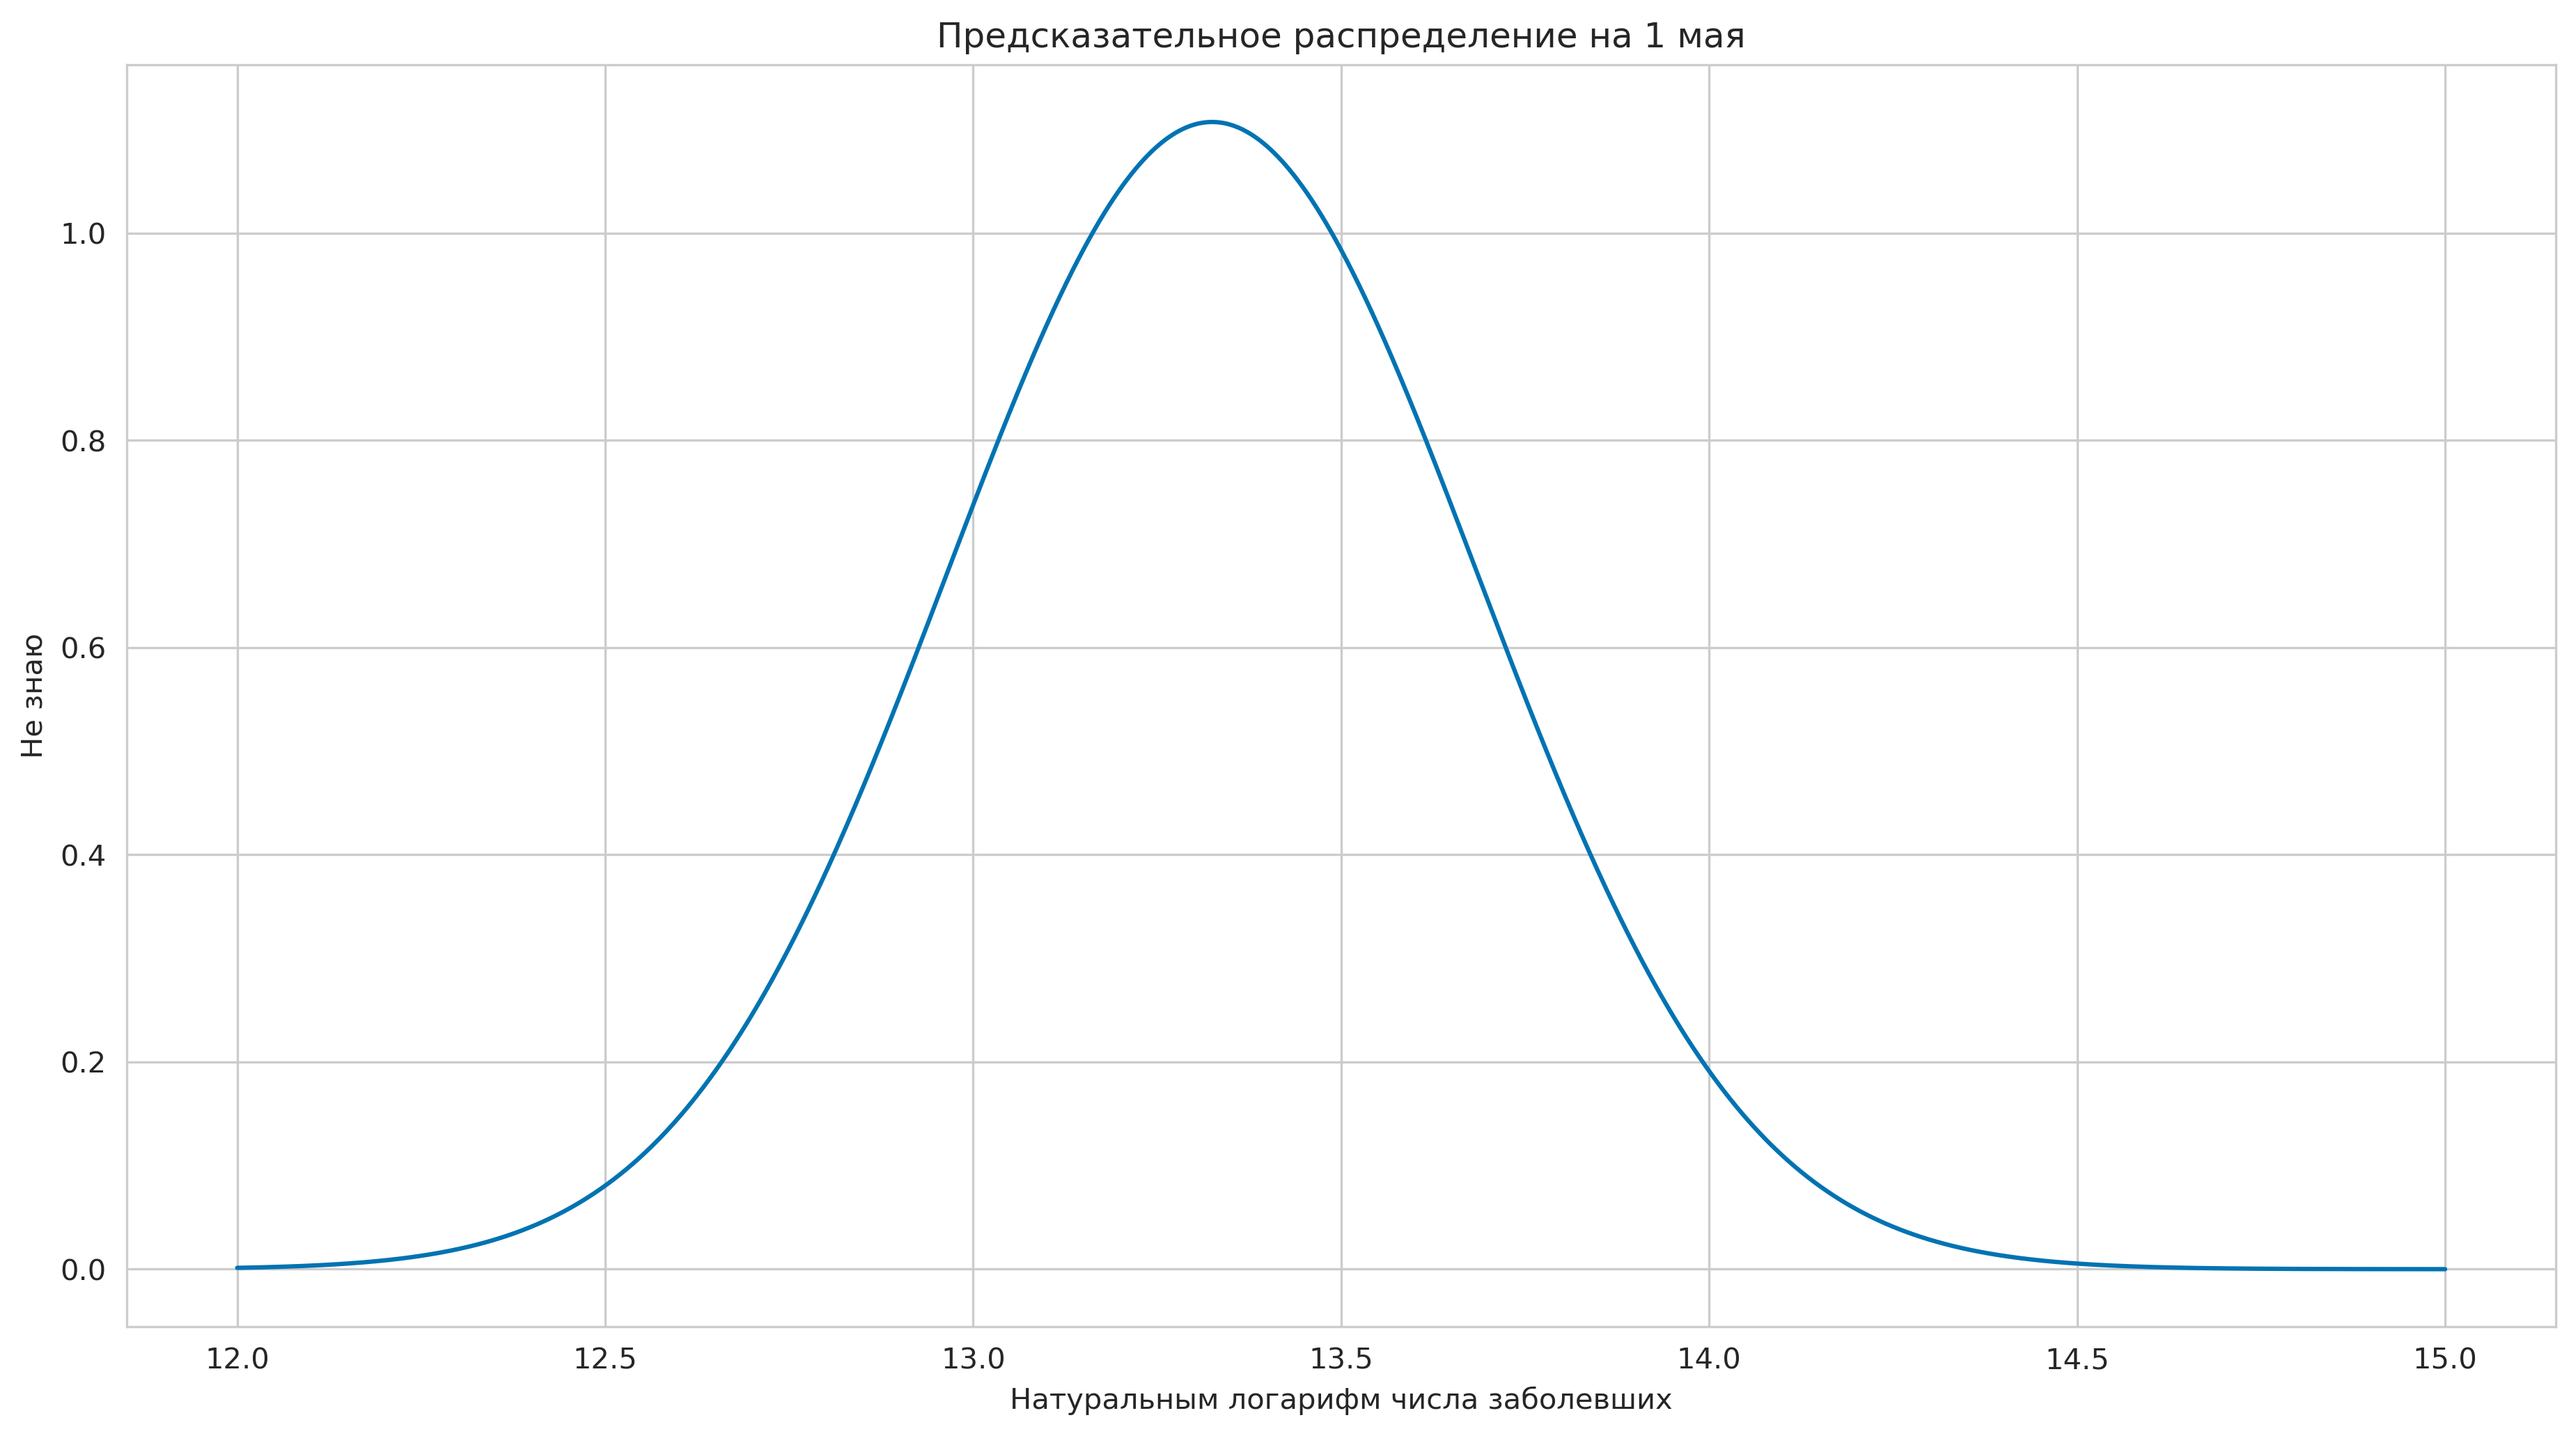

In [147]:
mu, sigma = predictive_distribution(custom_model, x_may)
x_axis = np.linspace(12, 15, 10000)
y = norm.pdf(x_axis, mu, sigma)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Предсказательное распределение на 1 мая")
ax.set_xlabel("Натуральным логарифм числа заболевших")
ax.set_ylabel("Не знаю")
ax.plot(x_axis, y[0])
plt.show()

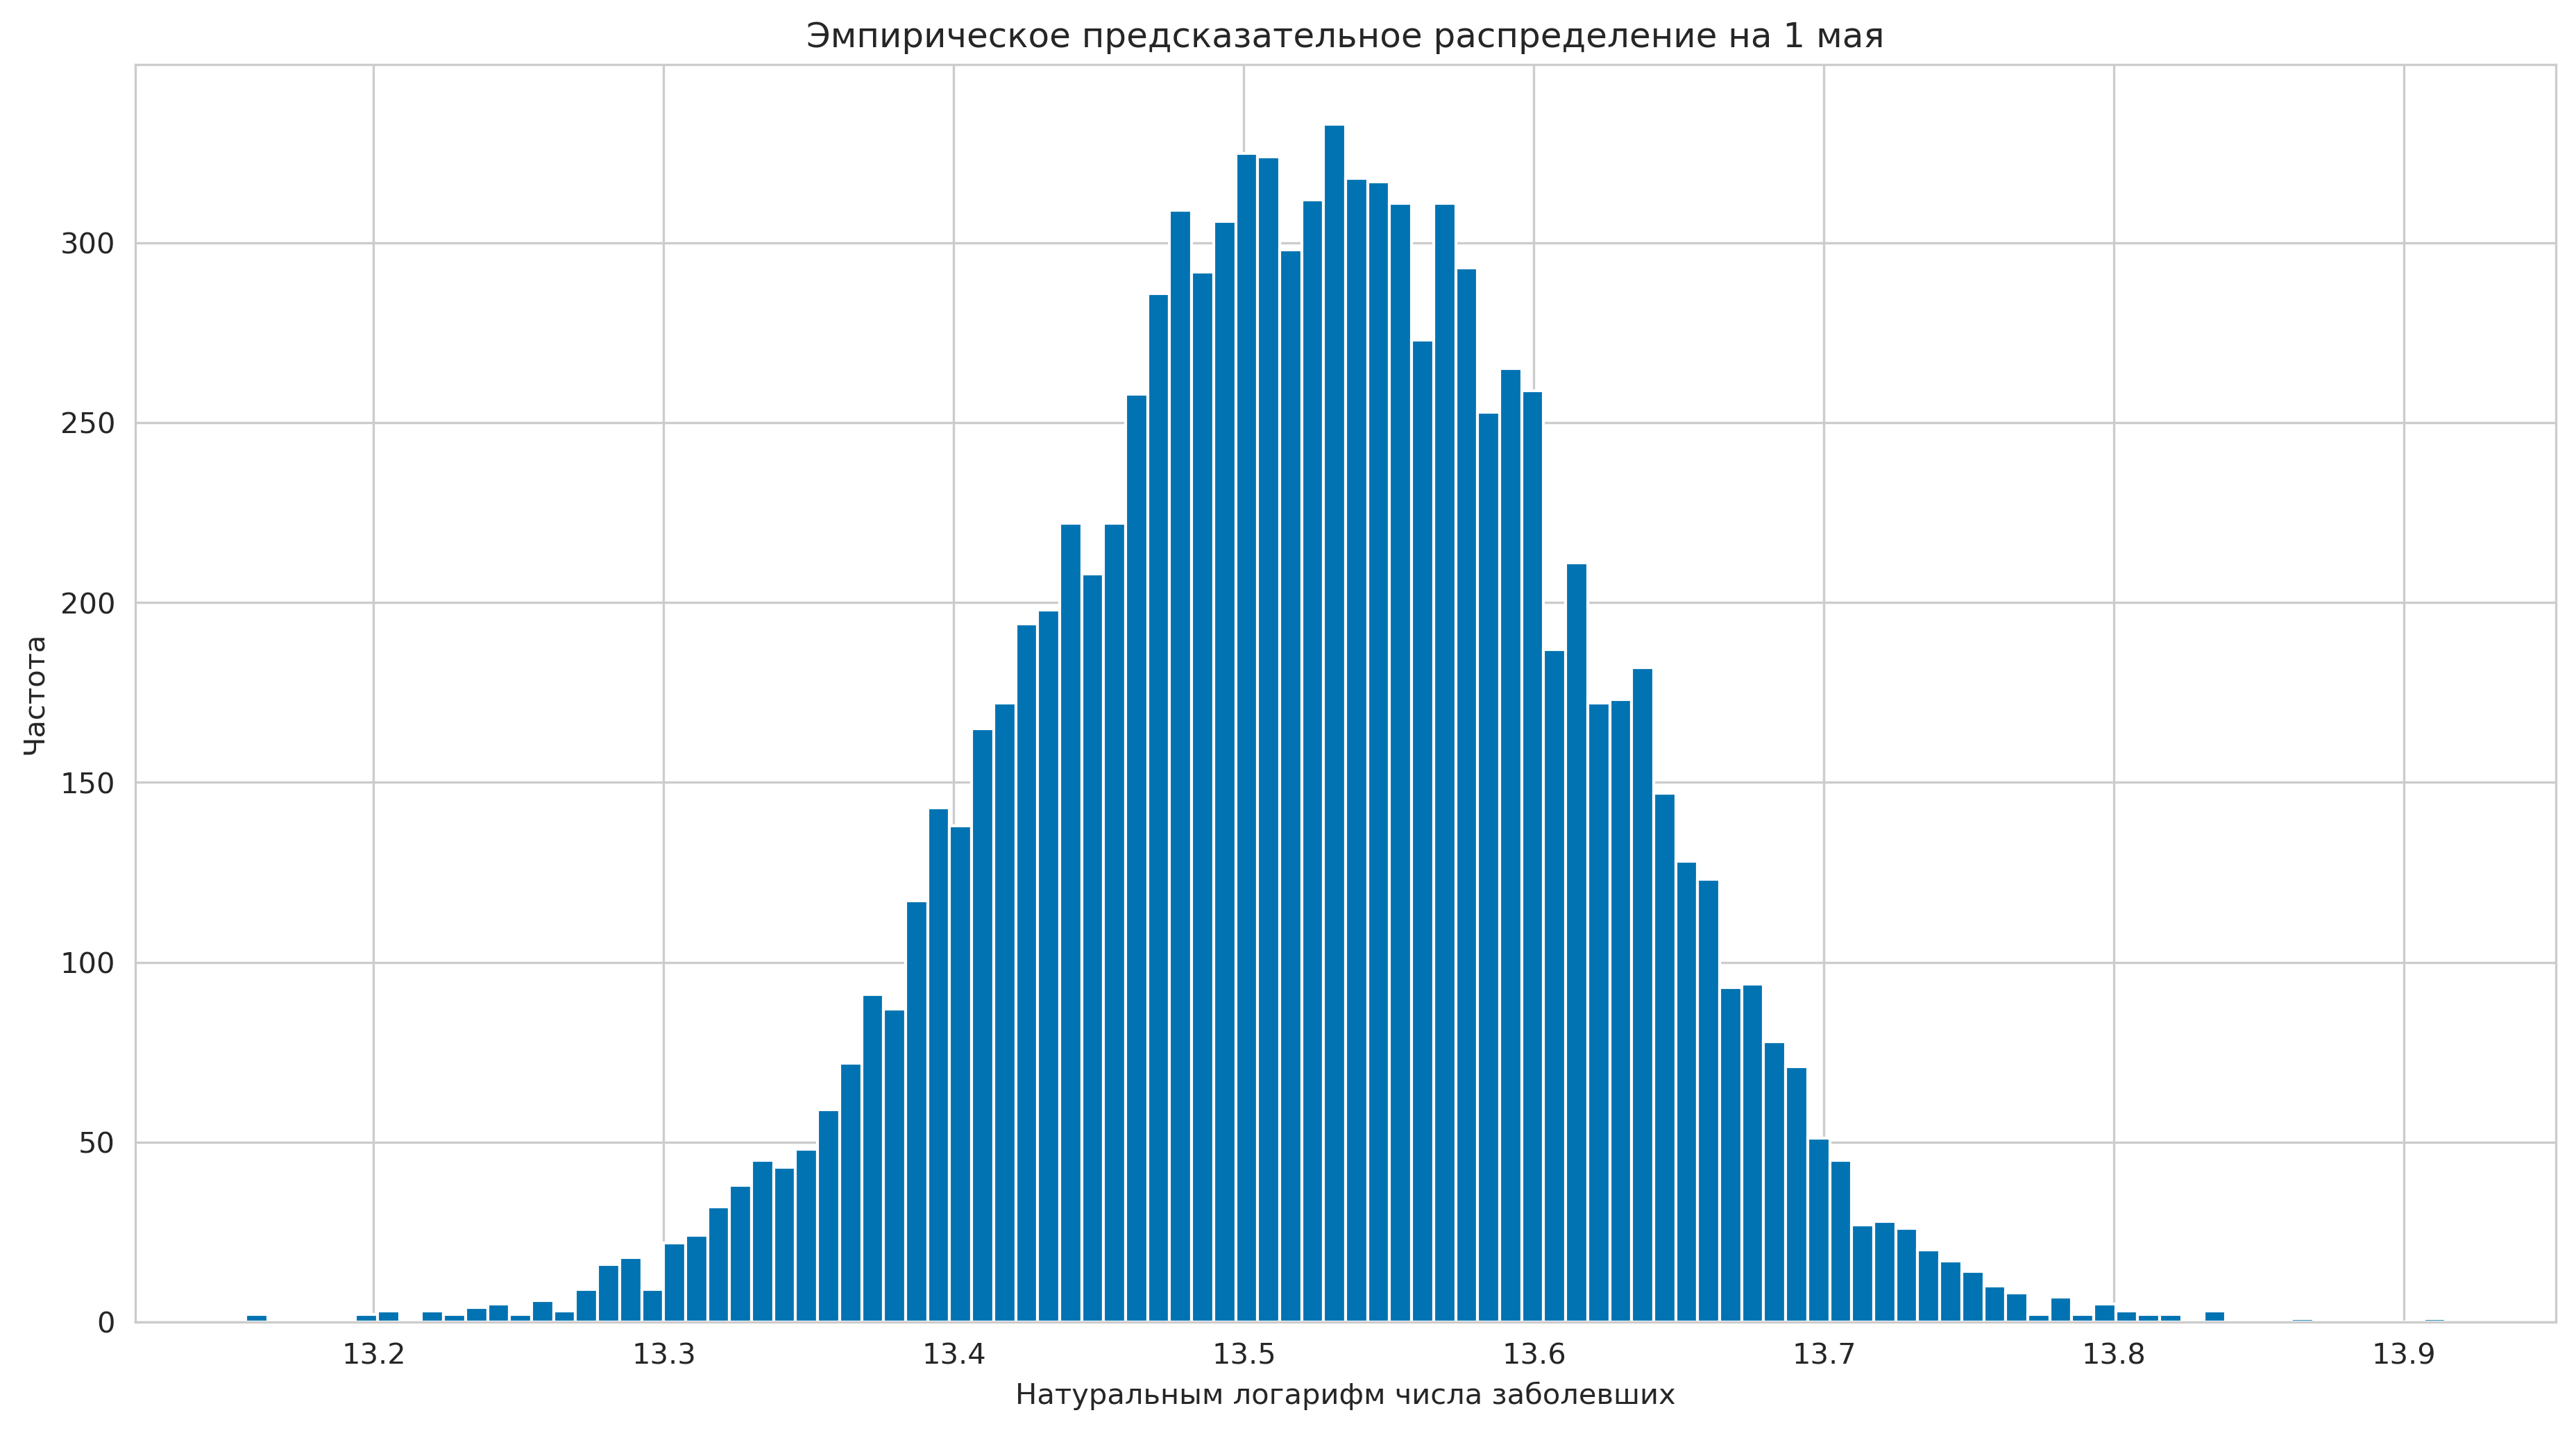

In [119]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Эмпирическое предсказательное распределение на 1 мая")
ax.set_xlabel("Натуральным логарифм числа заболевших")
ax.set_ylabel("Частота")
hist = ax.hist(sampled_exps[:, x_may[0][0]], bins=100)

In [152]:
print("По эмпирическому предсказательному распределению:\n")
print(f'   Прогноз числа больных на 1 мая в случае оптимистичного сценария (10-й процентиль): {np.percentile(np.exp(sampled_exps[:, x_may[0][0]]), 10):.0f}')
print(f'   Прогноз числа больных на 1 мая в случае пессимистичного сценария (90-й процентиль): {np.percentile(np.exp(sampled_exps[:, x_may[0][0]]), 90):.0f}')

По эмпирическому предсказательному распределению:

   Прогноз числа больных на 1 мая в случае оптимистичного сценария (10-й процентиль): 662708
   Прогноз числа больных на 1 мая в случае пессимистичного сценария (90-й процентиль): 840370


In [153]:
print("По аналитическому предсказательному распределению:\n")
print(f'   Прогноз числа больных на 1 мая в случае оптимистичного сценария (10-й процентиль): {np.exp(norm.ppf(0.1, mu, sigma))[0][0]:.0f}')
print(f'   Прогноз числа больных на 1 мая в случае пессимистичного сценария (90-й процентиль): {np.exp(norm.ppf(0.9, mu, sigma))[0][0]:.0f}')

По аналитическому предсказательному распределению:

   Прогноз числа больных на 1 мая в случае оптимистичного сценария (10-й процентиль): 385770
   Прогноз числа больных на 1 мая в случае пессимистичного сценария (90-й процентиль): 971366


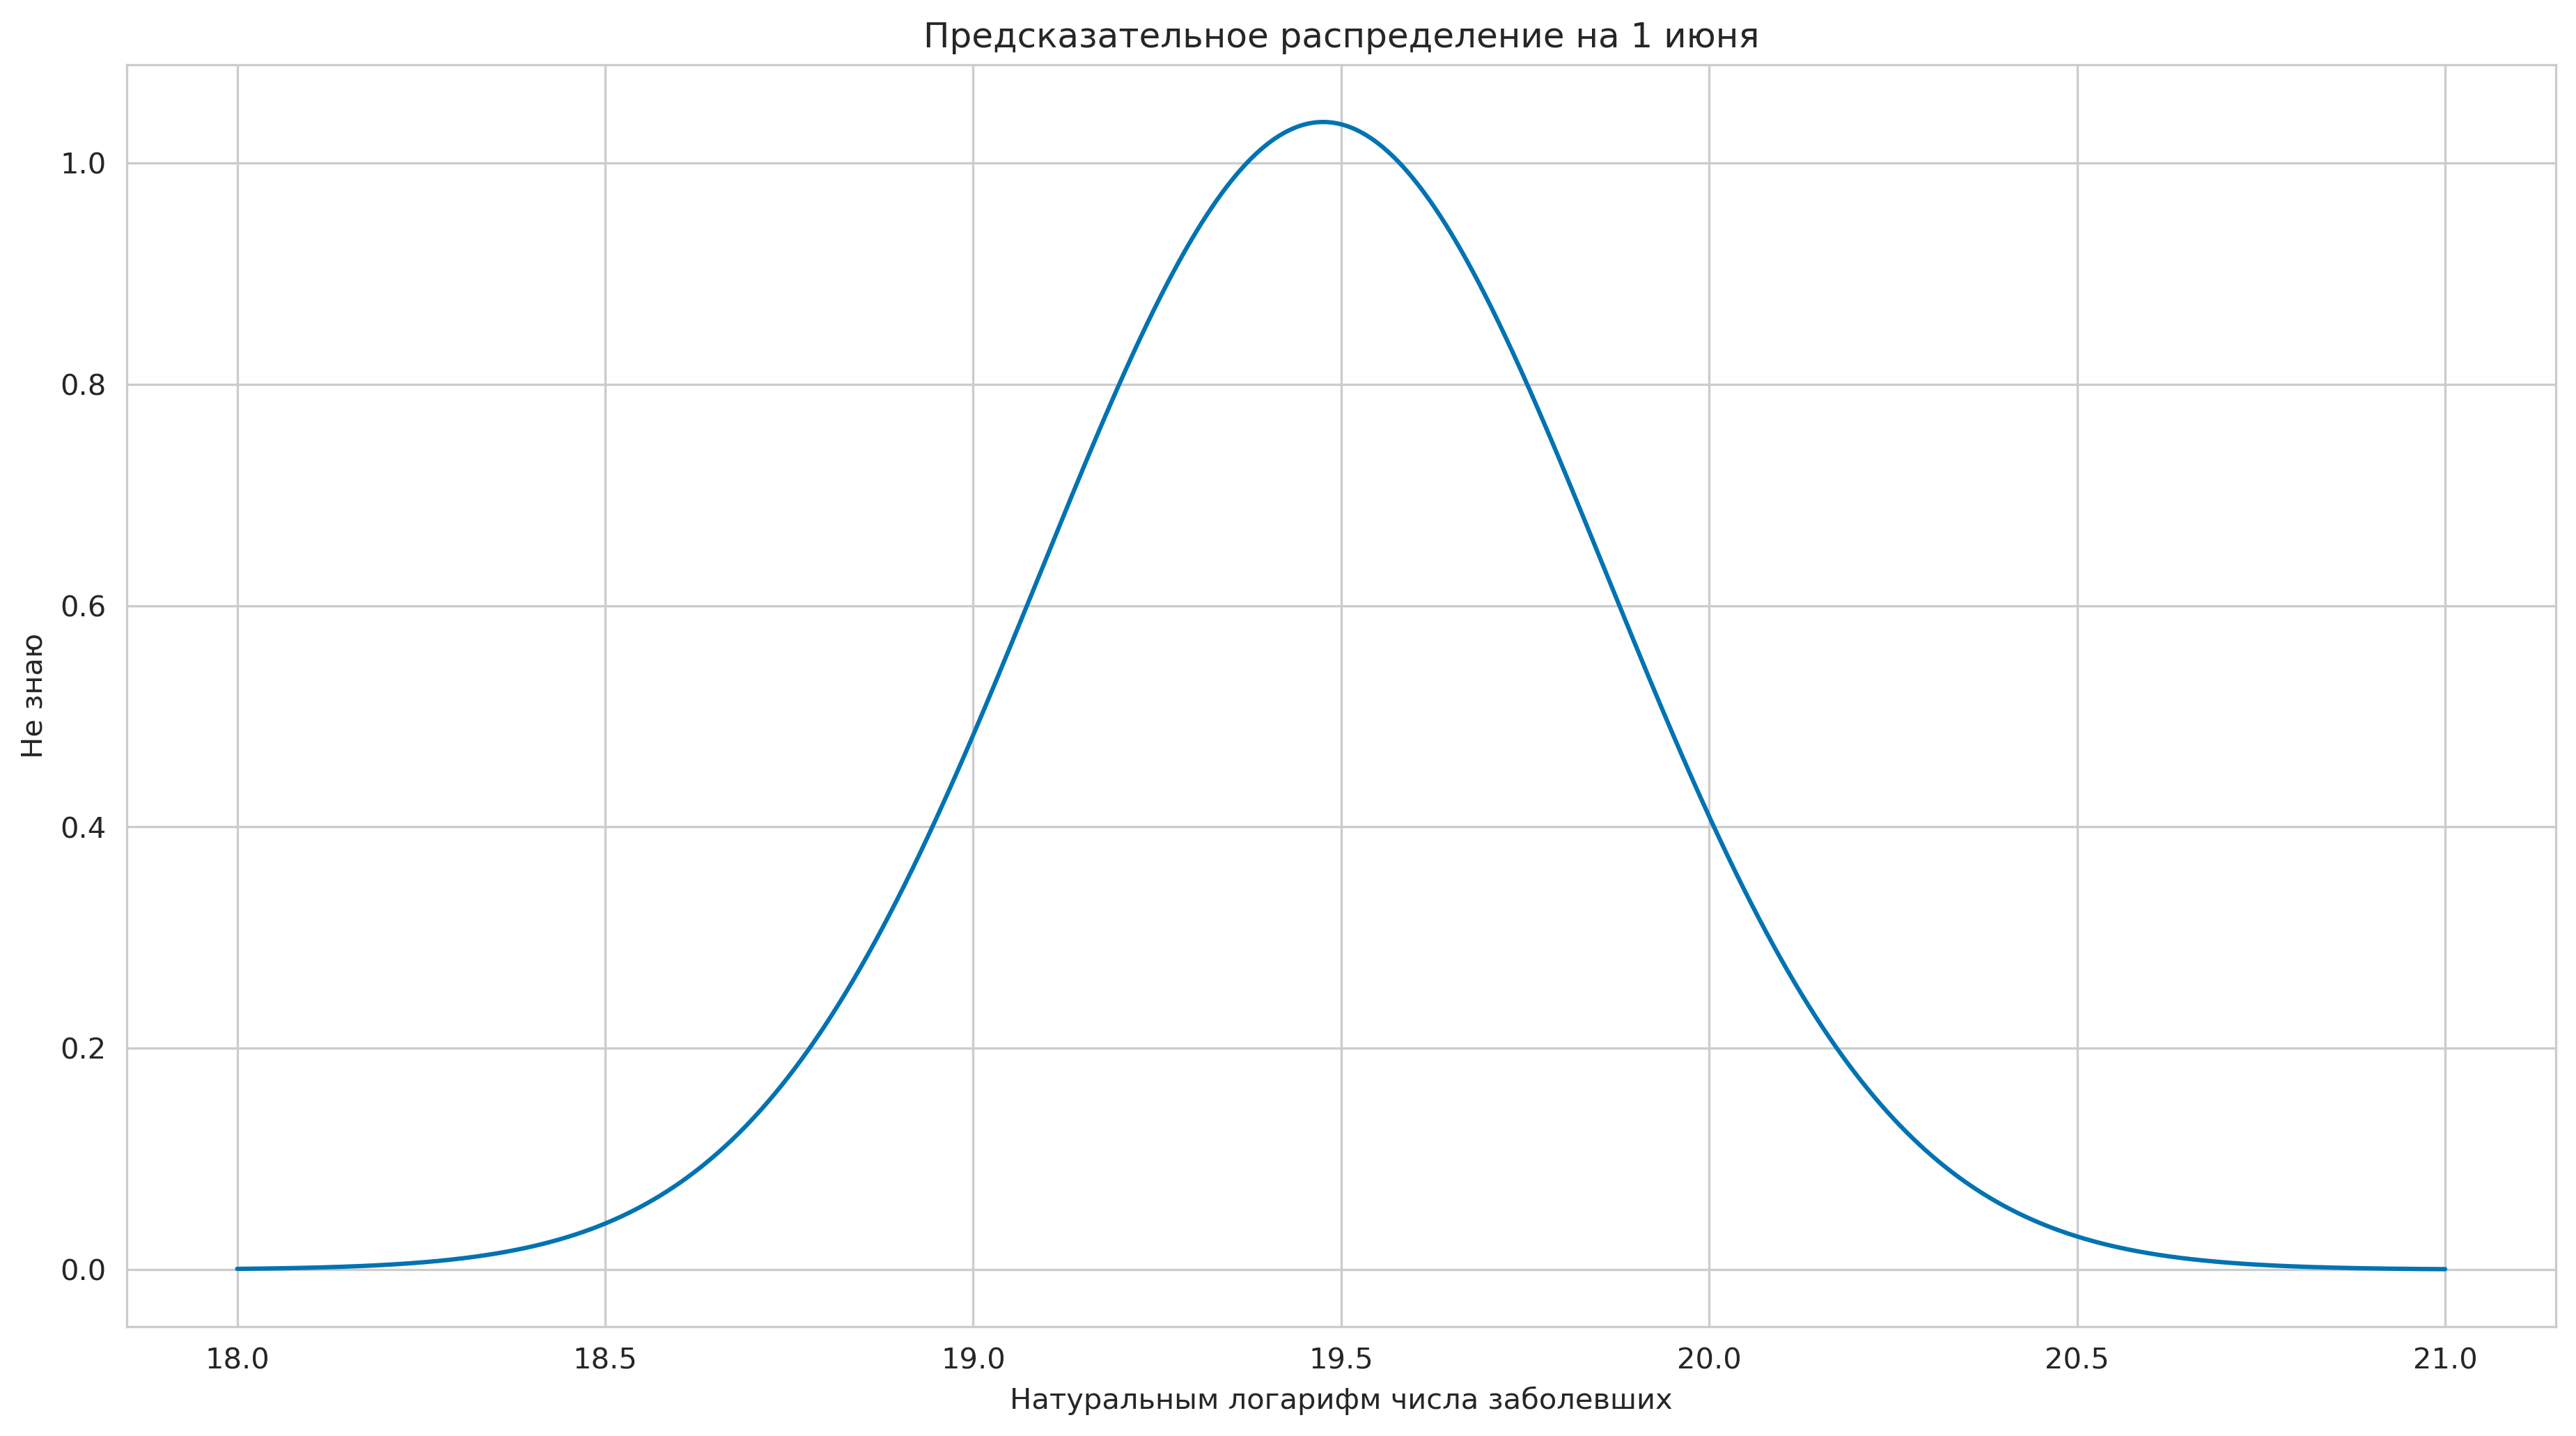

In [27]:
mu, sigma = predictive_distribution(custom_model, x_june)
x_axis = np.linspace(18, 21, 10000)
y = norm.pdf(x_axis, mu, sigma)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Предсказательное распределение на 1 июня")
ax.set_xlabel("Натуральным логарифм числа заболевших")
ax.set_ylabel("Не знаю")
ax.plot(x_axis, y[0])
plt.show()

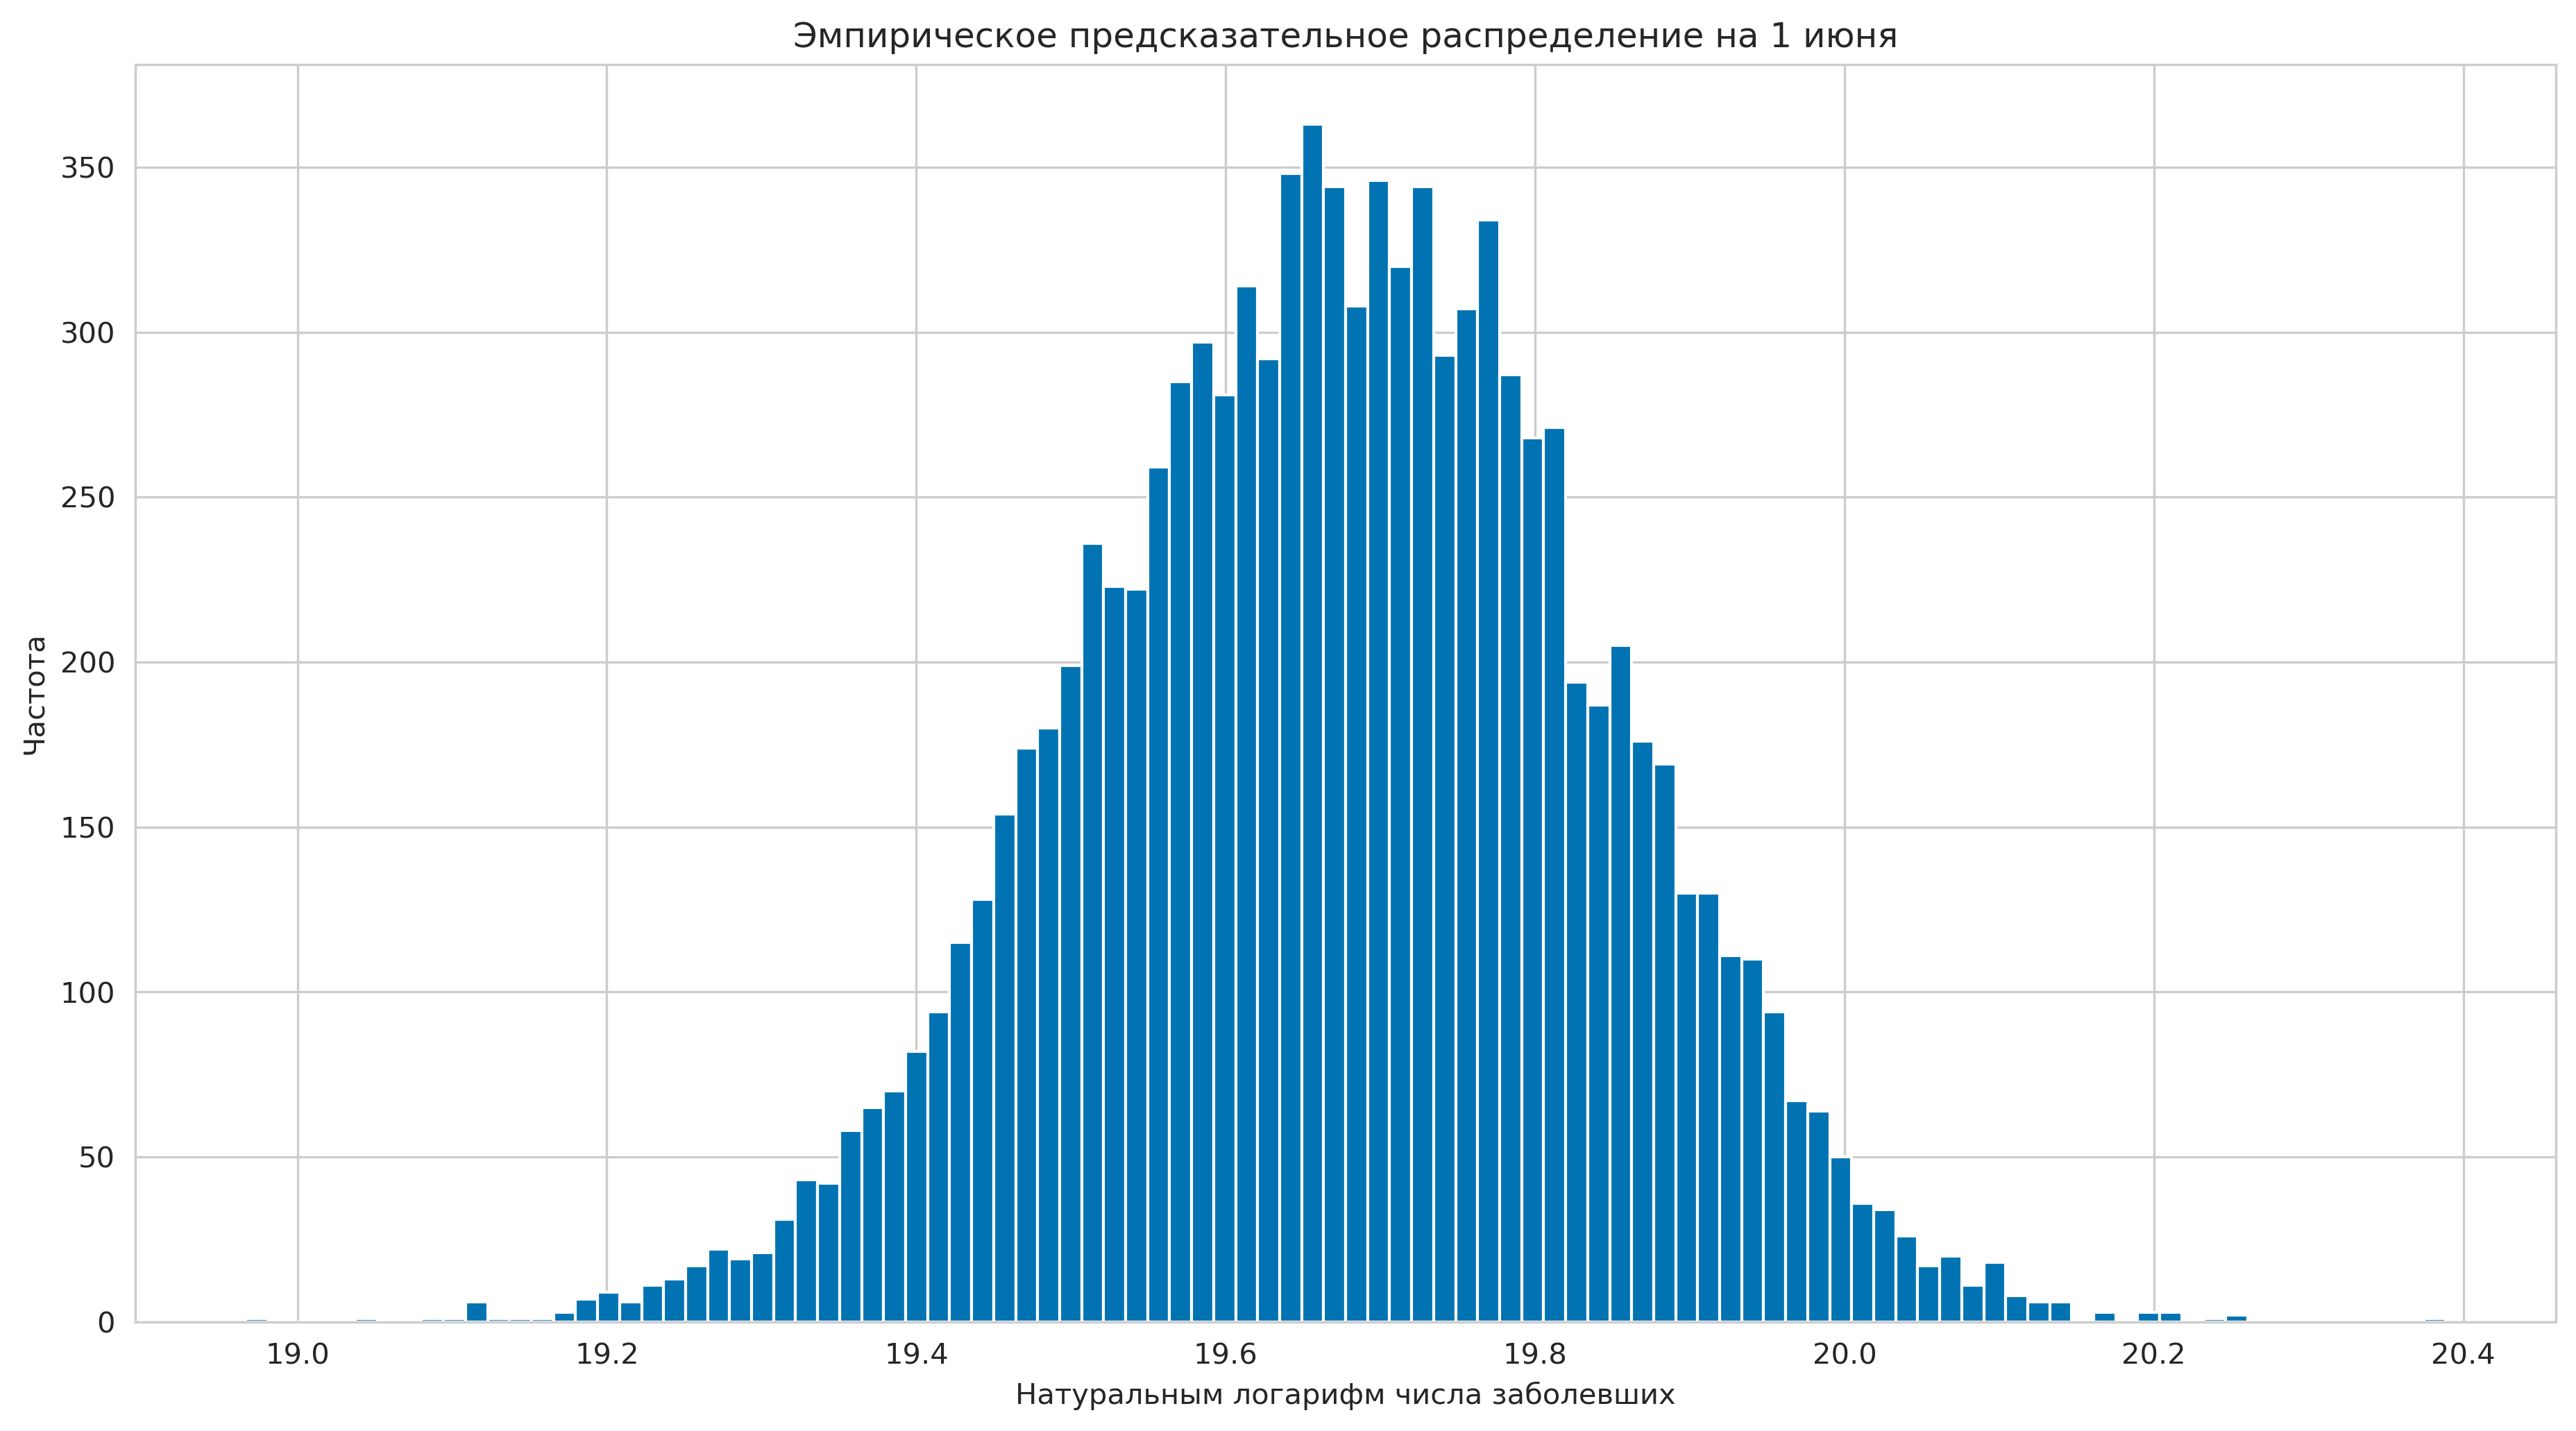

In [28]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Эмпирическое предсказательное распределение на 1 июня")
ax.set_xlabel("Натуральным логарифм числа заболевших")
ax.set_ylabel("Частота")
hist = ax.hist(sampled_exps[:, x_june[0][0]], bins=100)

In [132]:
print("По эмпирическому предсказательному распределению:\n")
print(f'Прогноз числа больных на 1 июня в случае оптимистичного сценария (10-й процентиль): {np.percentile(np.exp(sampled_exps[:, x_june[0][0]]), 10):.0f}')
print(f'Прогноз числа больных на 1 июня в случае пессимистичного сценария (90-й процентиль): {np.percentile(np.exp(sampled_exps[:, x_june[0][0]]), 90):.0f}')

Прогноз числа больных на 1 июня в случае оптимистичного сценария (10-й процентиль): 283289131
Прогноз числа больных на 1 июня в случае пессимистичного сценария (90-й процентиль): 433074104


In [154]:
print("По аналитическому предсказательному распределению:\n")
print(f'Прогноз числа больных на 1 июня в случае оптимистичного сценария (10-й процентиль): {np.exp(norm.ppf(0.1, mu, sigma))[0][0]:.0f}')
print(f'Прогноз числа больных на 1 июня в случае пессимистичного сценария (90-й процентиль): {np.exp(norm.ppf(0.9, mu, sigma))[0][0]:.0f}')

По аналитическому предсказательному распределению:

Прогноз числа больных на 1 июня в случае оптимистичного сценария (10-й процентиль): 385770
Прогноз числа больных на 1 июня в случае пессимистичного сценария (90-й процентиль): 971366


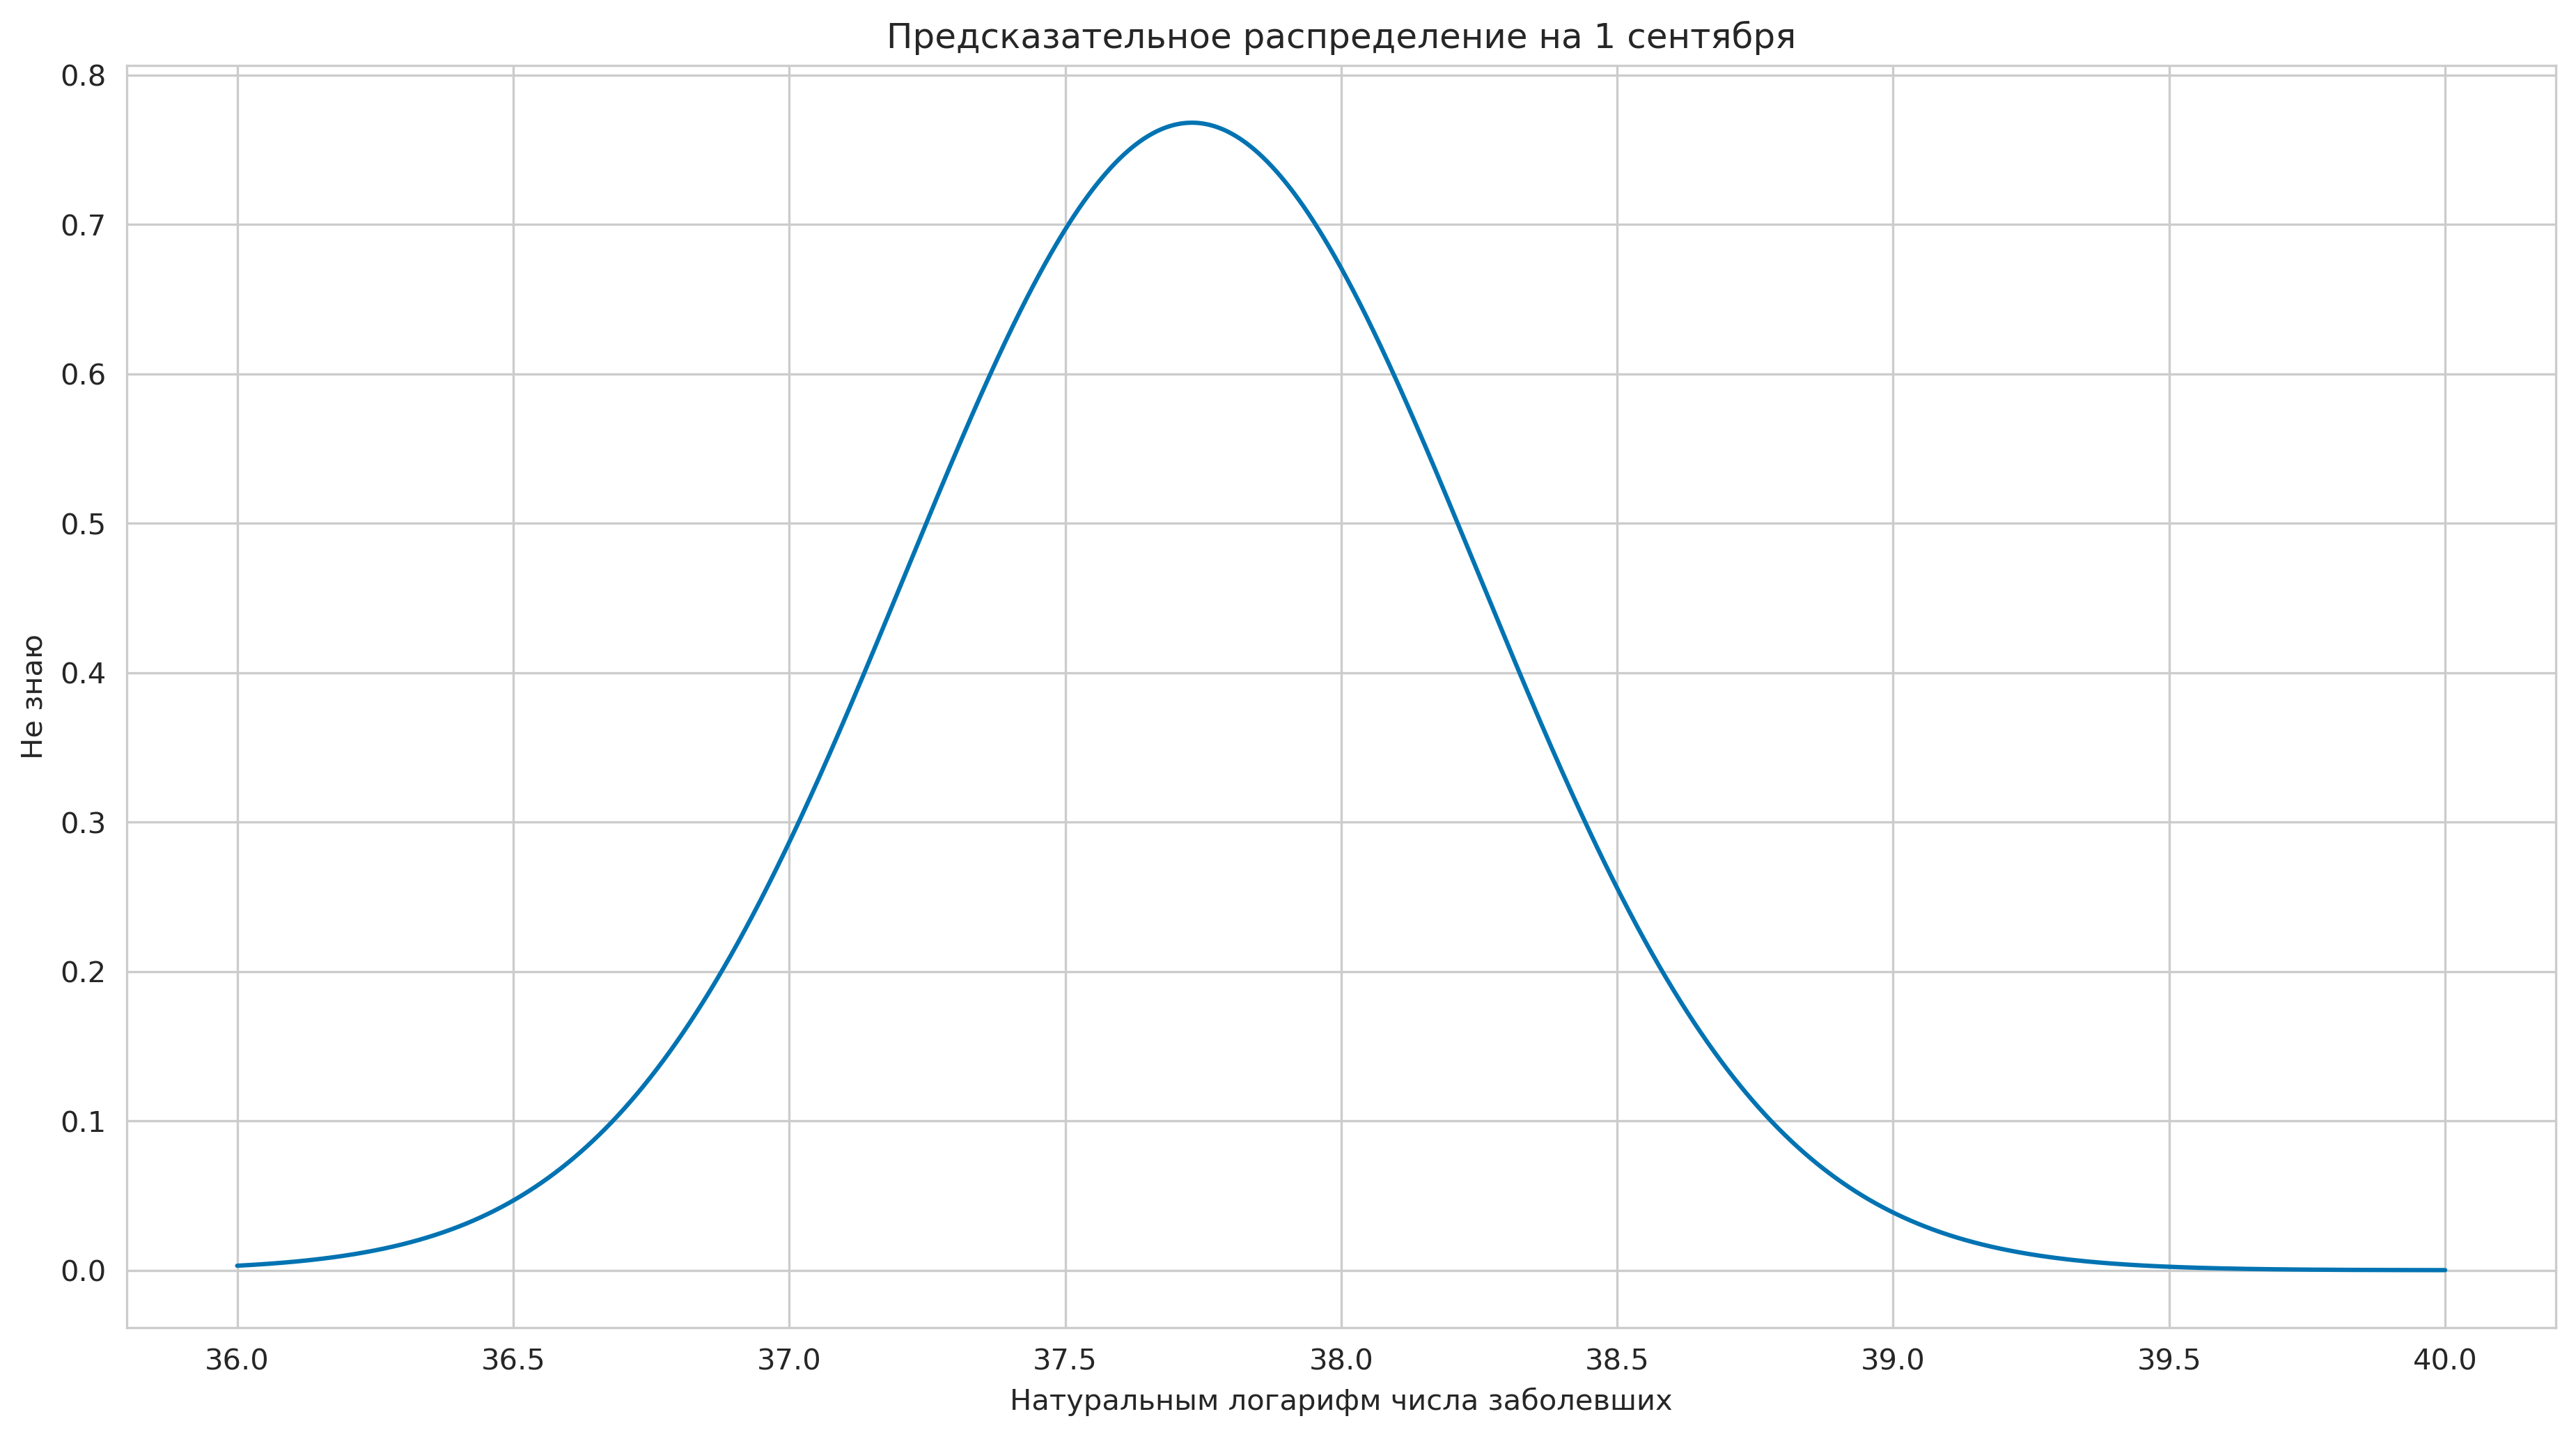

In [156]:
mu, sigma = predictive_distribution(custom_model, x_sept)
x_axis = np.linspace(36, 40, 10000)
y = norm.pdf(x_axis, mu, sigma)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Предсказательное распределение на 1 сентября")
ax.set_xlabel("Натуральным логарифм числа заболевших")
ax.set_ylabel("Не знаю")
ax.plot(x_axis, y[0])
plt.show()

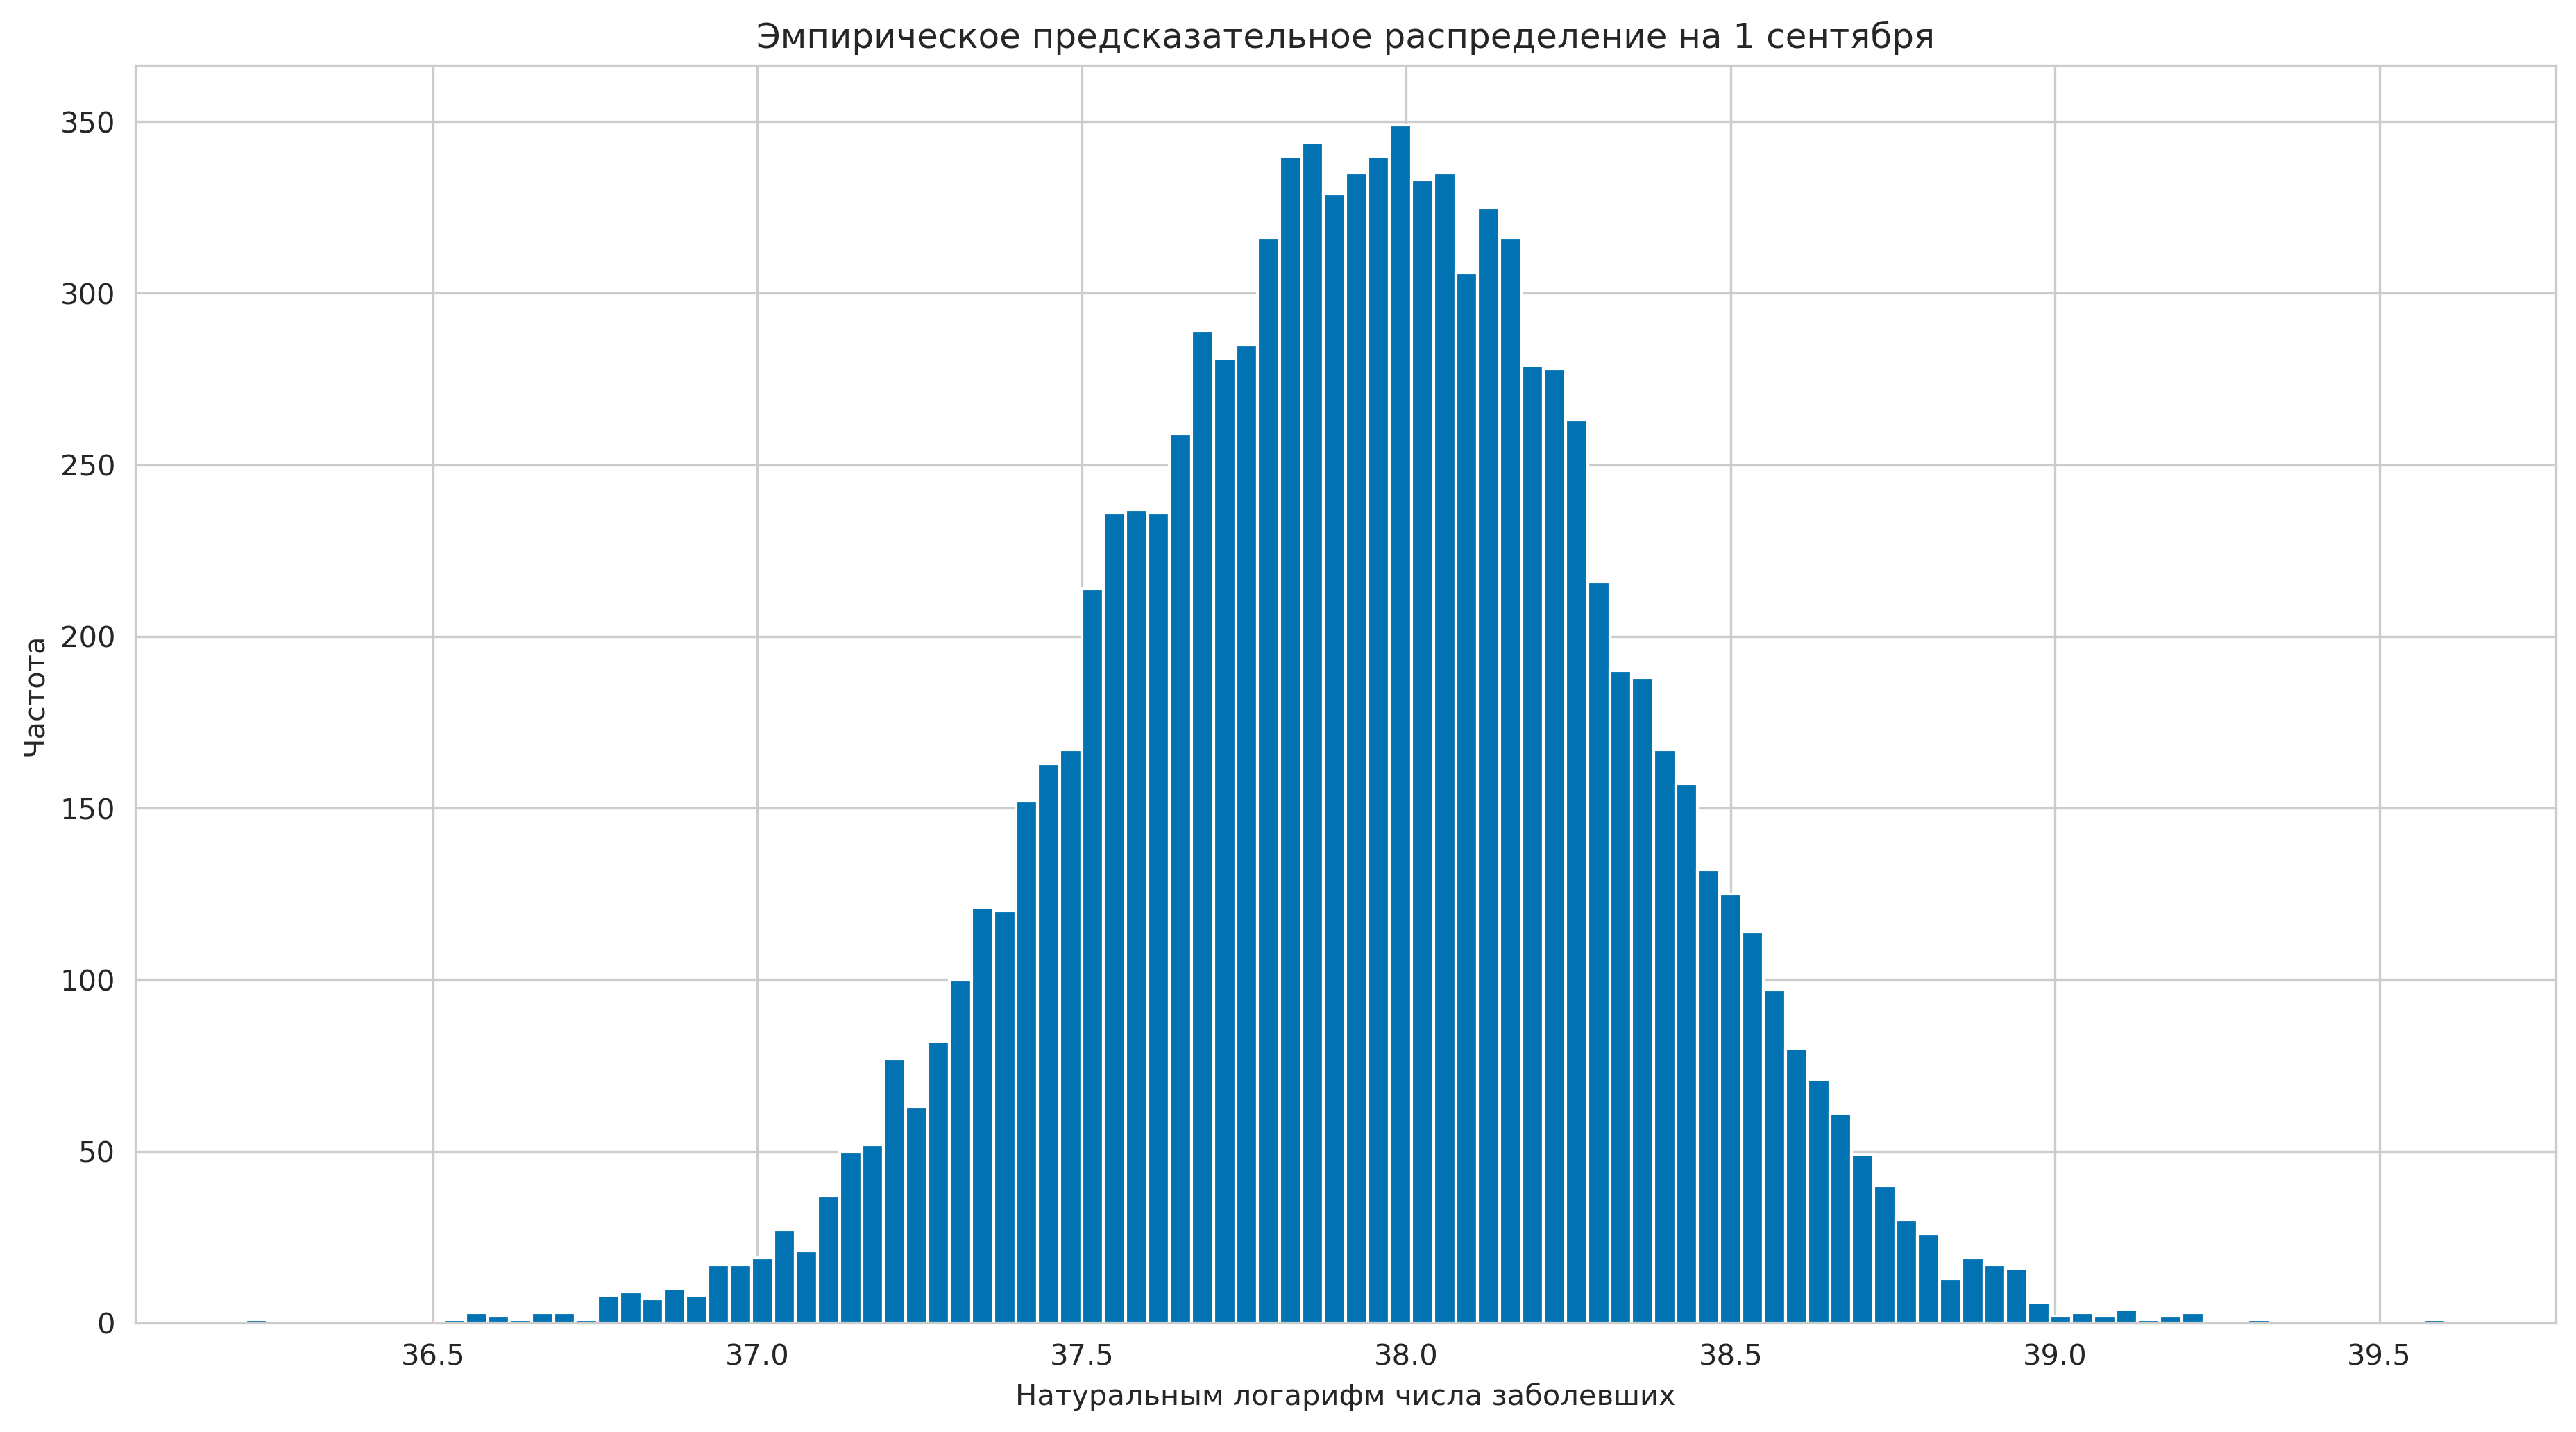

In [157]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Эмпирическое предсказательное распределение на 1 сентября")
ax.set_xlabel("Натуральным логарифм числа заболевших")
ax.set_ylabel("Частота")
hist = ax.hist(sampled_exps[:, x_sept[0][0]], bins=100)

In [158]:
print("По эмпирическому предсказательному распределению:\n")
print(f'Прогноз числа больных на 1 сентября в случае оптимистичного сценария (10-й процентиль): {np.percentile(np.exp(sampled_exps[:, x_sept[0][0]]), 10):.0f}')
print(f'Прогноз числа больных на 1 сентября в случае пессимистичного сценария (90-й процентиль): {np.percentile(np.exp(sampled_exps[:, x_sept[0][0]]), 90):.0f}')

По эмпирическому предсказательному распределению:

Прогноз числа больных на 1 сентября в случае оптимистичного сценария (10-й процентиль): 17998849145528574
Прогноз числа больных на 1 сентября в случае пессимистичного сценария (90-й процентиль): 49020849663312400


In [159]:
print("По аналитическому предсказательному распределению:\n")
print(f'Прогноз числа больных на 1 сентября в случае оптимистичного сценария (10-й процентиль): {np.exp(norm.ppf(0.1, mu, sigma))[0][0]:.0f}')
print(f'Прогноз числа больных на 1 сентября в случае пессимистичного сценария (90-й процентиль): {np.exp(norm.ppf(0.9, mu, sigma))[0][0]:.0f}')

По аналитическому предсказательному распределению:

Прогноз числа больных на 1 сентября в случае оптимистичного сценария (10-й процентиль): 12493182258293050
Прогноз числа больных на 1 сентября в случае пессимистичного сценария (90-й процентиль): 47304439138820512


3. Предсказания экспоненциальной модели наверняка получились грустными. Но это,
конечно, чересчур пессимистично — экспоненциальный рост в природе никак не
может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в
реальности имеет сигмоидальный вид: после начальной фазы экспоненциального
роста неизбежно происходит насыщение. В качестве конкретной формы такой
сигмоиды давайте возьмём форму функции распределения для гауссиана 1 :

Честно говоря не знаю как решить этот интеграл, но единственное что могу сделать, это приблизить интеграл заменив его суммой.

$F(t) = e^{\frac{-(t^2 * w_2 + -t * w_1 + w_0)}{2}}$

$ y = \int F(t) \, dt \approx$ $\sum_{i=1}^{n} F(t_i)$

$ y = \sum_{i=1}^{n} y_i$    

$y_i = F(t_i) = e^{(t_i^2 * w_2 + t_i * w_1 + w_0)}$

- y_i = new_cases 
- t_i - i-день

b. Обучите эти параметры на датасете случаев коронавируса в России.
Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели.

In [161]:
model = linear_model.LinearRegression()
y_hat = np.array(sliced_russia_df["new_cases"])
x = np.arange(1, y_hat.shape[0] + 1)
x_hat = np.concatenate([x.reshape(-1, 1) ** 2, x.reshape(-1, 1)], axis=1)
model.fit(x_hat, np.log(y_hat).reshape(-1, 1))

LinearRegression()

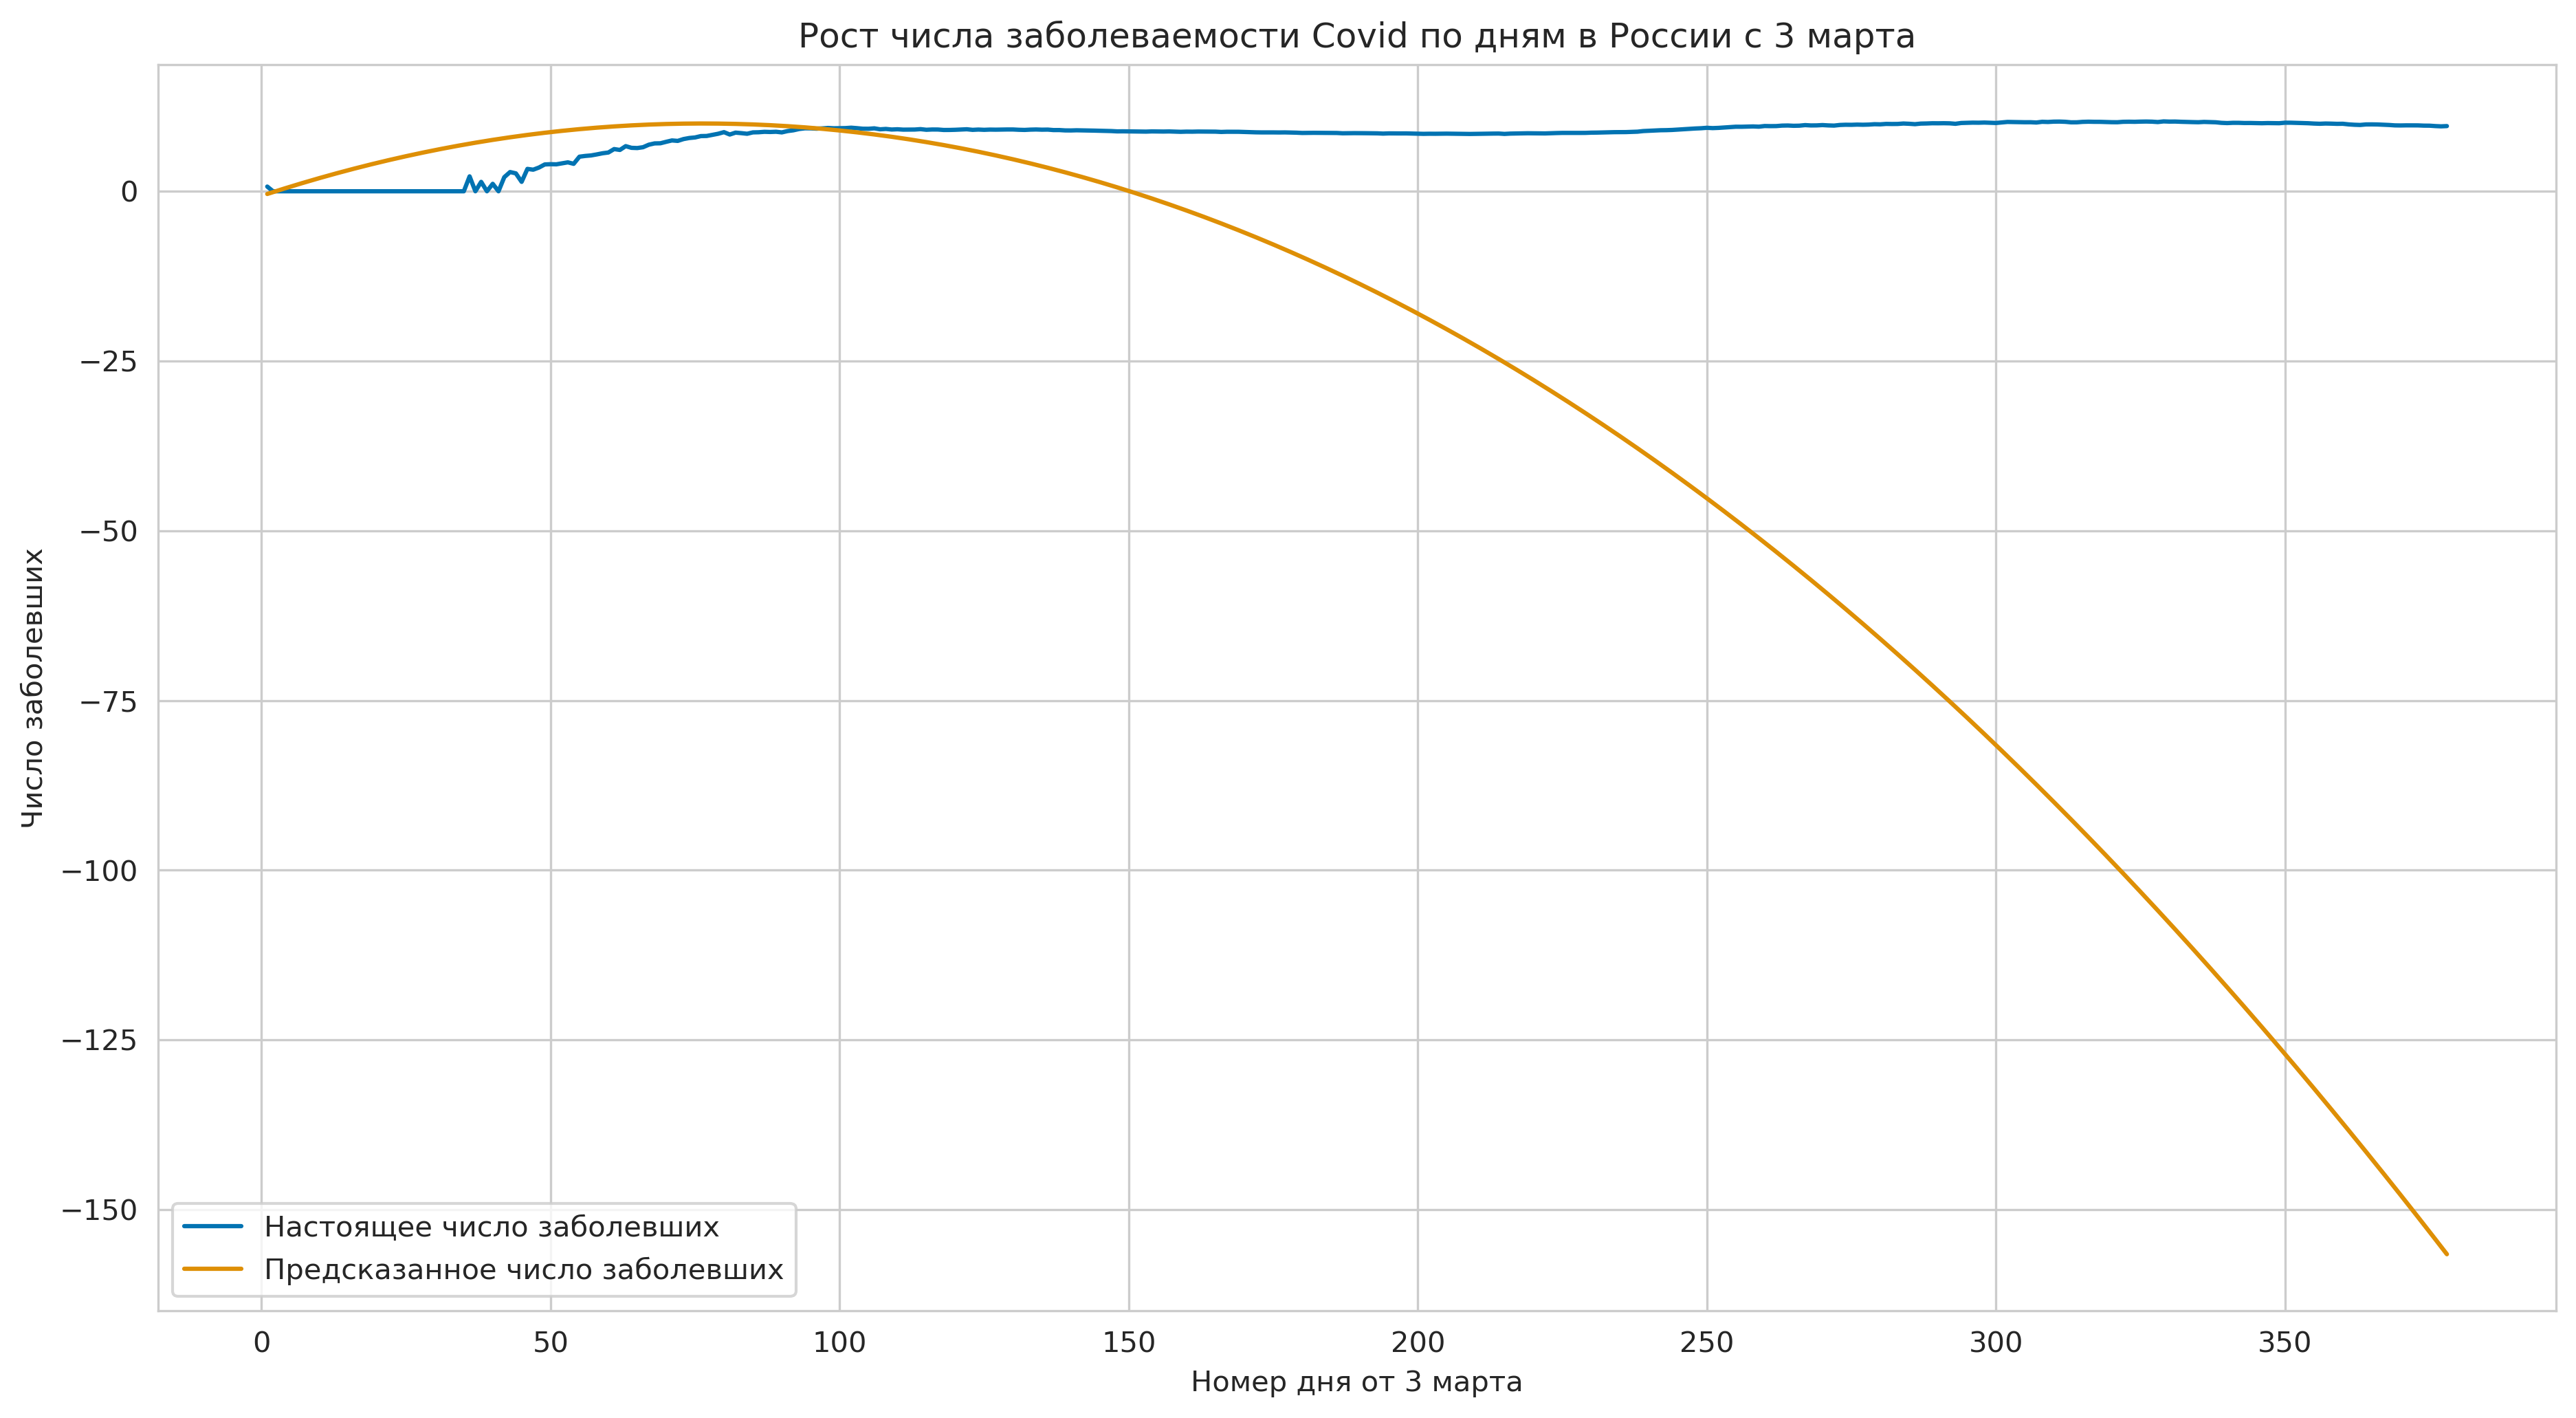

In [162]:
all_y = np.array(russia_df["new_cases"])
all_x = np.arange(1, all_y.shape[0] + 1)
all_x_hat = np.concatenate([all_x.reshape(-1, 1) ** 2, all_x.reshape(-1, 1)], axis=1)
estimated_line = model.predict(all_x_hat)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title('Рост числа заболеваемости Covid по дням в России с 3 марта')
ax.set_xlabel('Номер дня от 3 марта')
ax.set_ylabel('Число заболевших')
ax.plot(all_x, np.log(all_y), label="Настоящее число заболевших")
ax.plot(all_x, estimated_line, label="Предсказанное число заболевших")
ax.legend()
plt.show()

In [163]:
class SigmoidModel:
    def __init__(self, model):
        self.model = model
        
    def predict(self, x):
        y = self.model.predict(x)
        return np.exp(y).cumsum()
    
    def sample(self, x, n):
        sampled = self.model.sample(x, n)
        return np.exp(sampled).cumsum(-1)

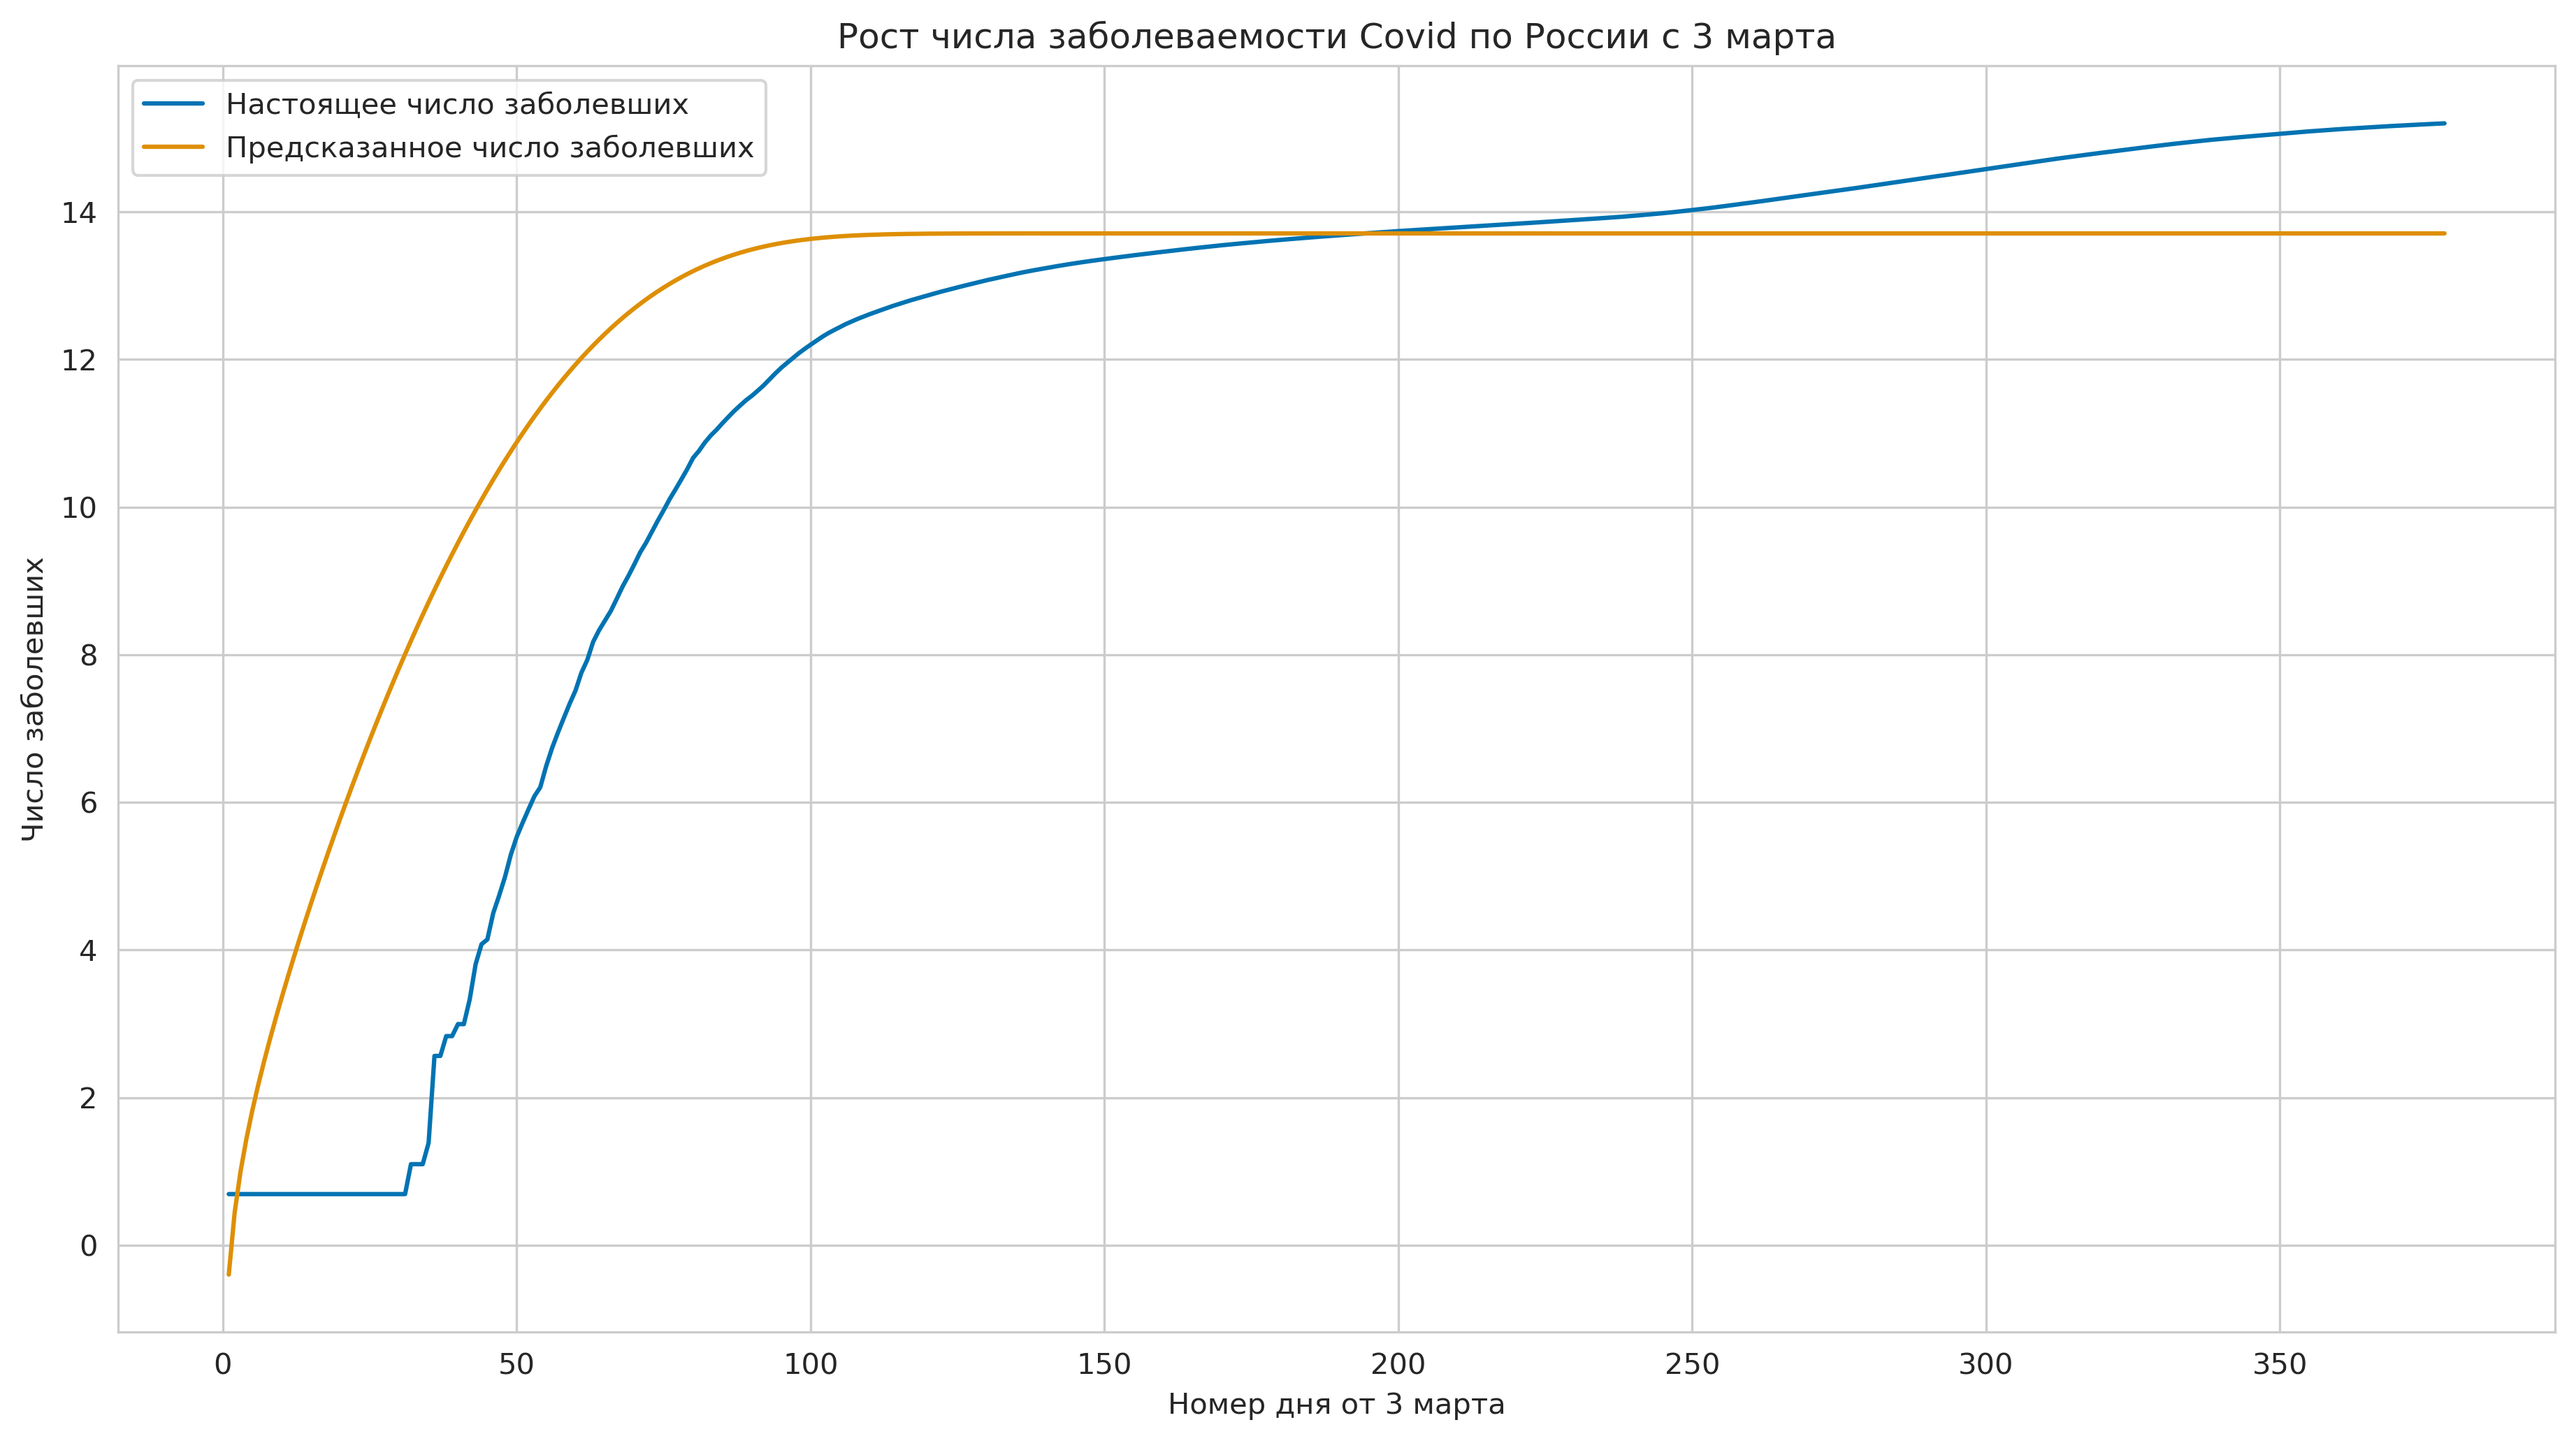

In [164]:
sigmoid_model = SigmoidModel(model)
estimated_line = sigmoid_model.predict(all_x_hat)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title('Рост числа заболеваемости Covid по России с 3 марта')
ax.set_xlabel('Номер дня от 3 марта')
ax.set_ylabel('Число заболевших')
ax.plot(all_x, np.log(russia_df["total_cases"]), label="Настоящее число заболевших")
ax.plot(all_x, np.log(estimated_line), label="Предсказанное число заболевших")
ax.legend()
plt.show()

In [165]:
target = np.log(np.array(y_hat)).reshape(-1, 1)
predicted = model.predict(x_hat)

sigma = np.sqrt(var(target, predicted))

print("Дисперсия шума равна", sigma ** 2)

Дисперсия шума равна 0.23928684127005564


In [166]:
cust_sig_model = LinRegression(np.array([0, 0, 0]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]), sigma)
cust_sig_model.fit(x_hat, np.log(y_hat).reshape(-1, 1))

In [167]:
cur_mu, cur_sigma = cust_sig_model.mu, cust_sig_model.sigma

print(f"Апостериорное распределение параметров этой модели это Гауссиан со средним {cur_mu} и дисперсией {cur_sigma}")

Апостериорное распределение параметров этой модели это Гауссиан со средним [-0.66565267 -0.00181866  0.27861144] и дисперсией [[ 1.20522916e-02  1.57499608e-05 -9.54458759e-04]
 [ 1.57499608e-05  3.58176483e-08 -1.82427841e-06]
 [-9.54458759e-04 -1.82427841e-06  9.88939155e-05]]


In [168]:
sigmoid_model = SigmoidModel(cust_sig_model)

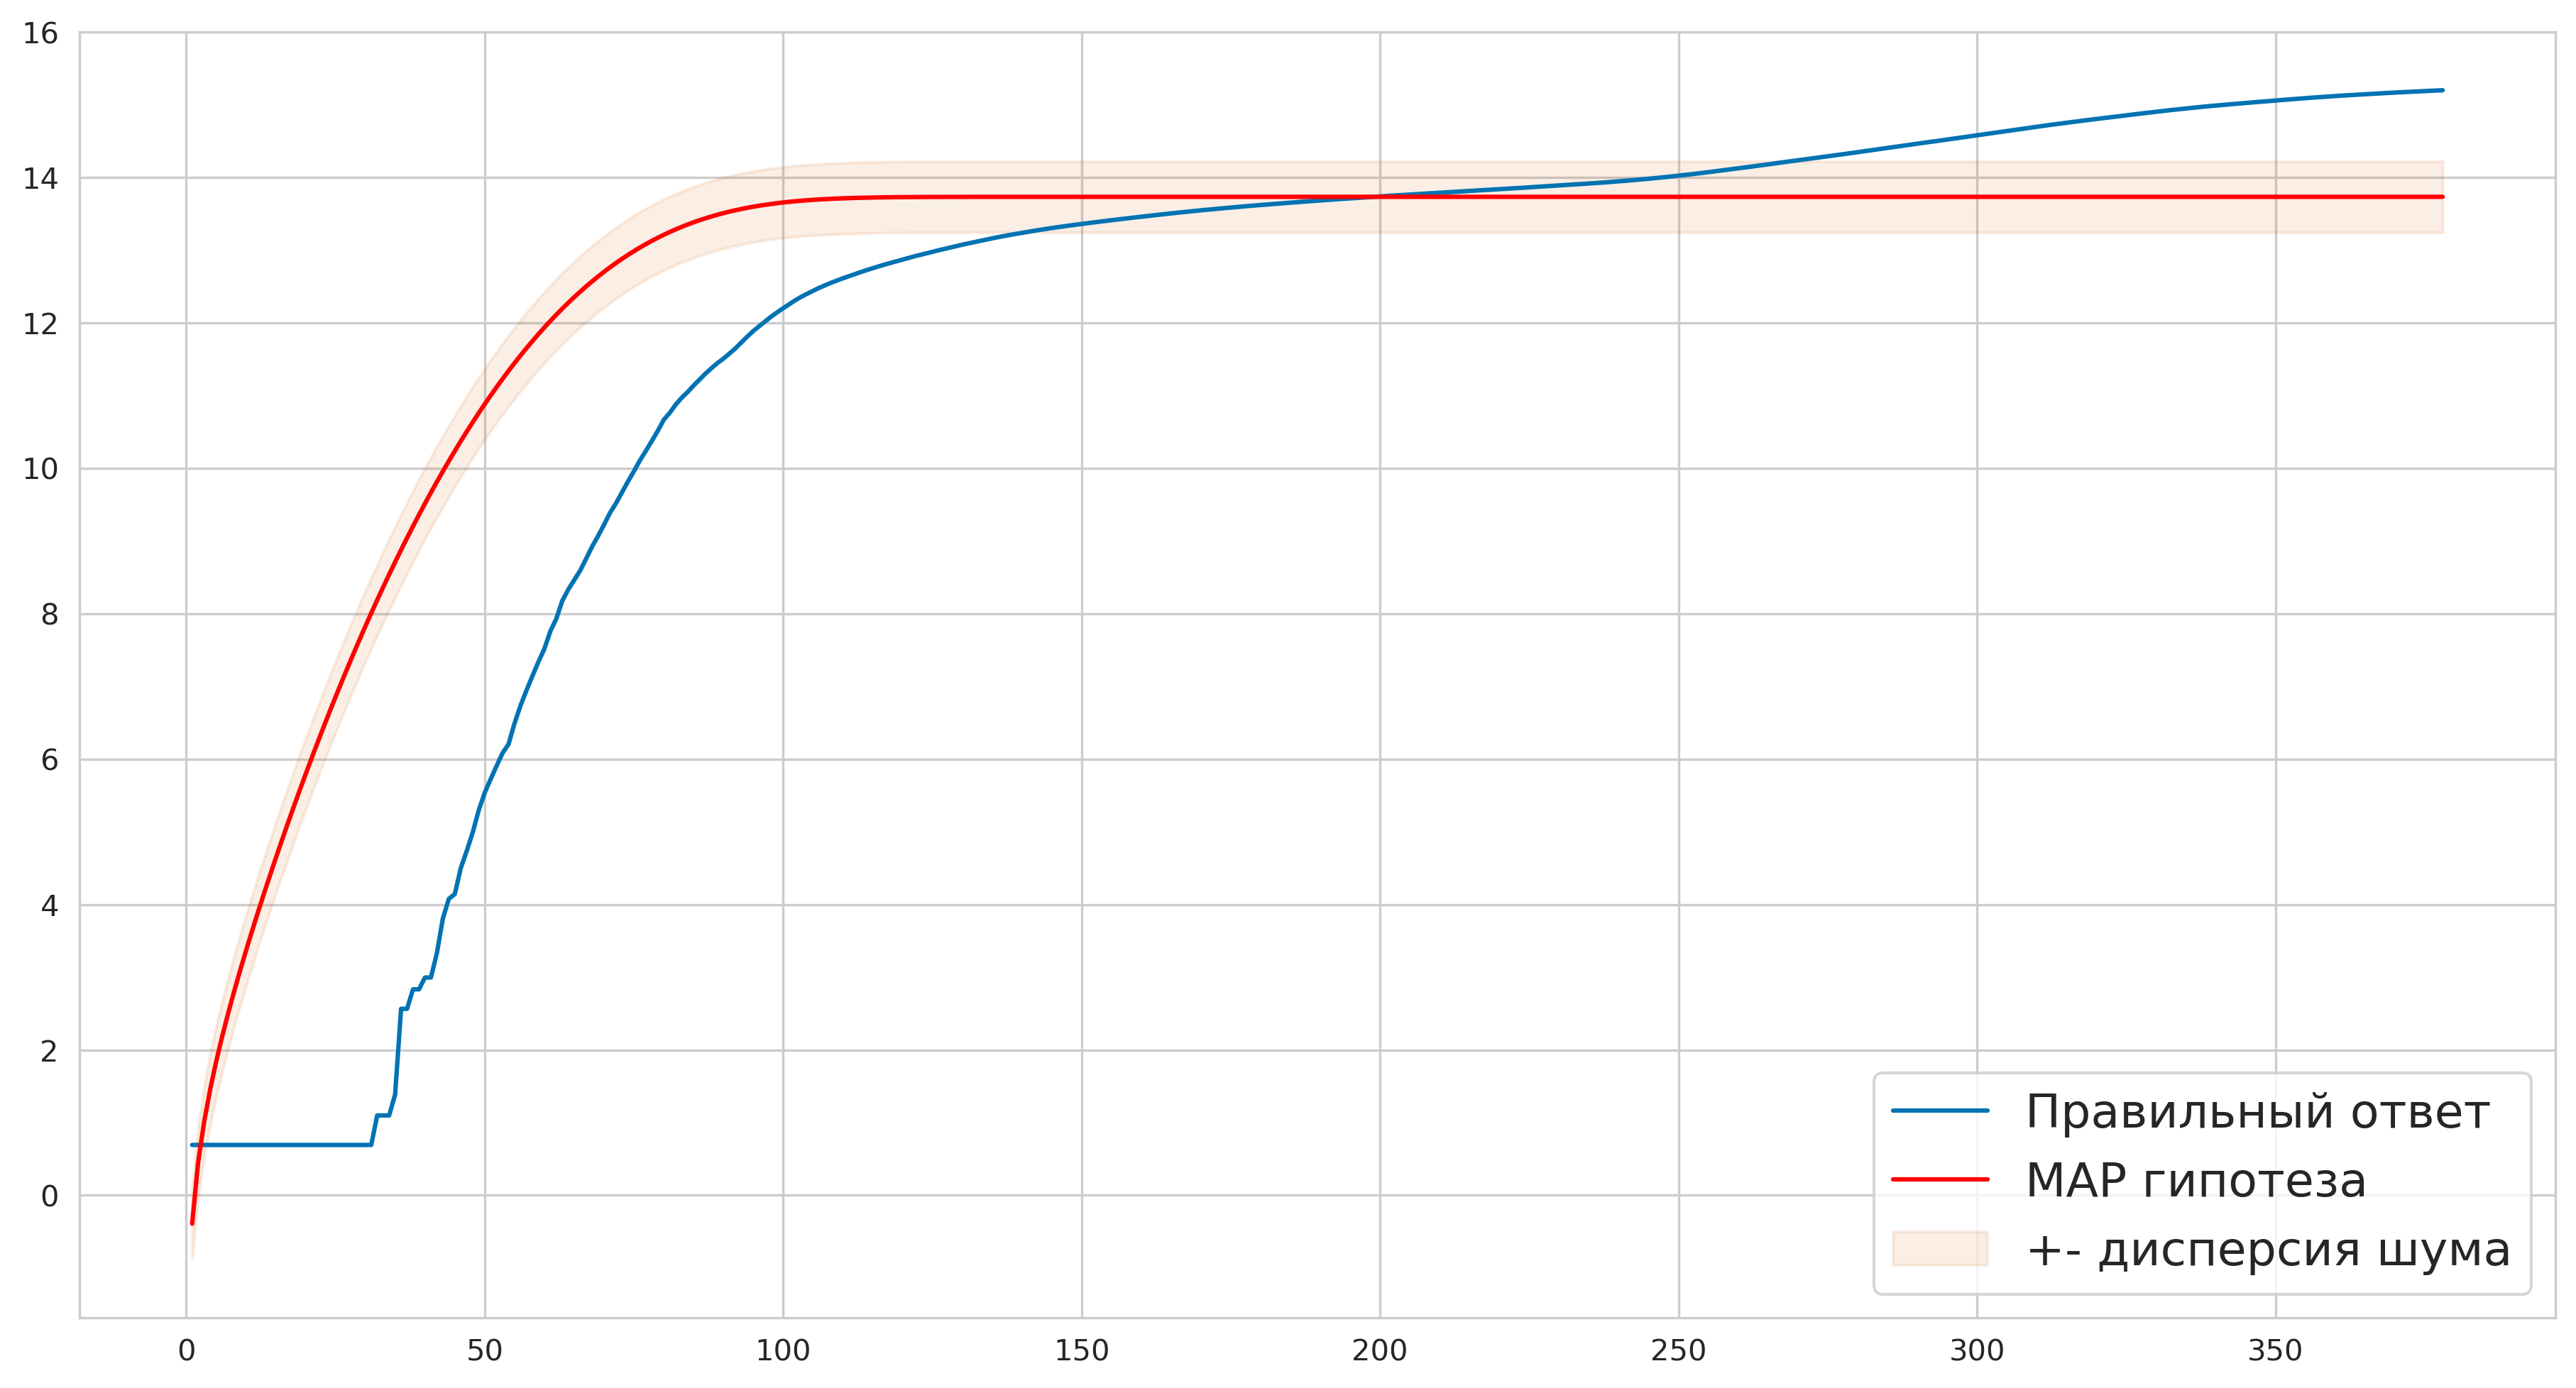

In [169]:
def plot_predictions(xs, ys, model, sigma):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.plot(xs[:, 1], np.log(ys), label="Правильный ответ")
    ax.plot(xs[:, 1], np.log(model.predict(xs)), color="red", label="MAP гипотеза")
    ax.fill_between(xs[:, 1], np.log(model.predict(xs)) - sigma, np.log(model.predict(xs)) + sigma, color=palette[3], alpha=.10, label="+- дисперсия шума")
    ax.legend(fontsize=legend_fontsize)

plot_predictions(all_x_hat, russia_df["total_cases"], sigmoid_model, sigma)

In [96]:
sampled_sigmoids = sigmoid_model.sample(all_x_hat, 10000)

К 1 мая модель предсказывает всего 139084 случаев
К 1 июня модель предсказывает всего 735153 случаев
К 1 сентября модель предсказывает всего 919925 случаев


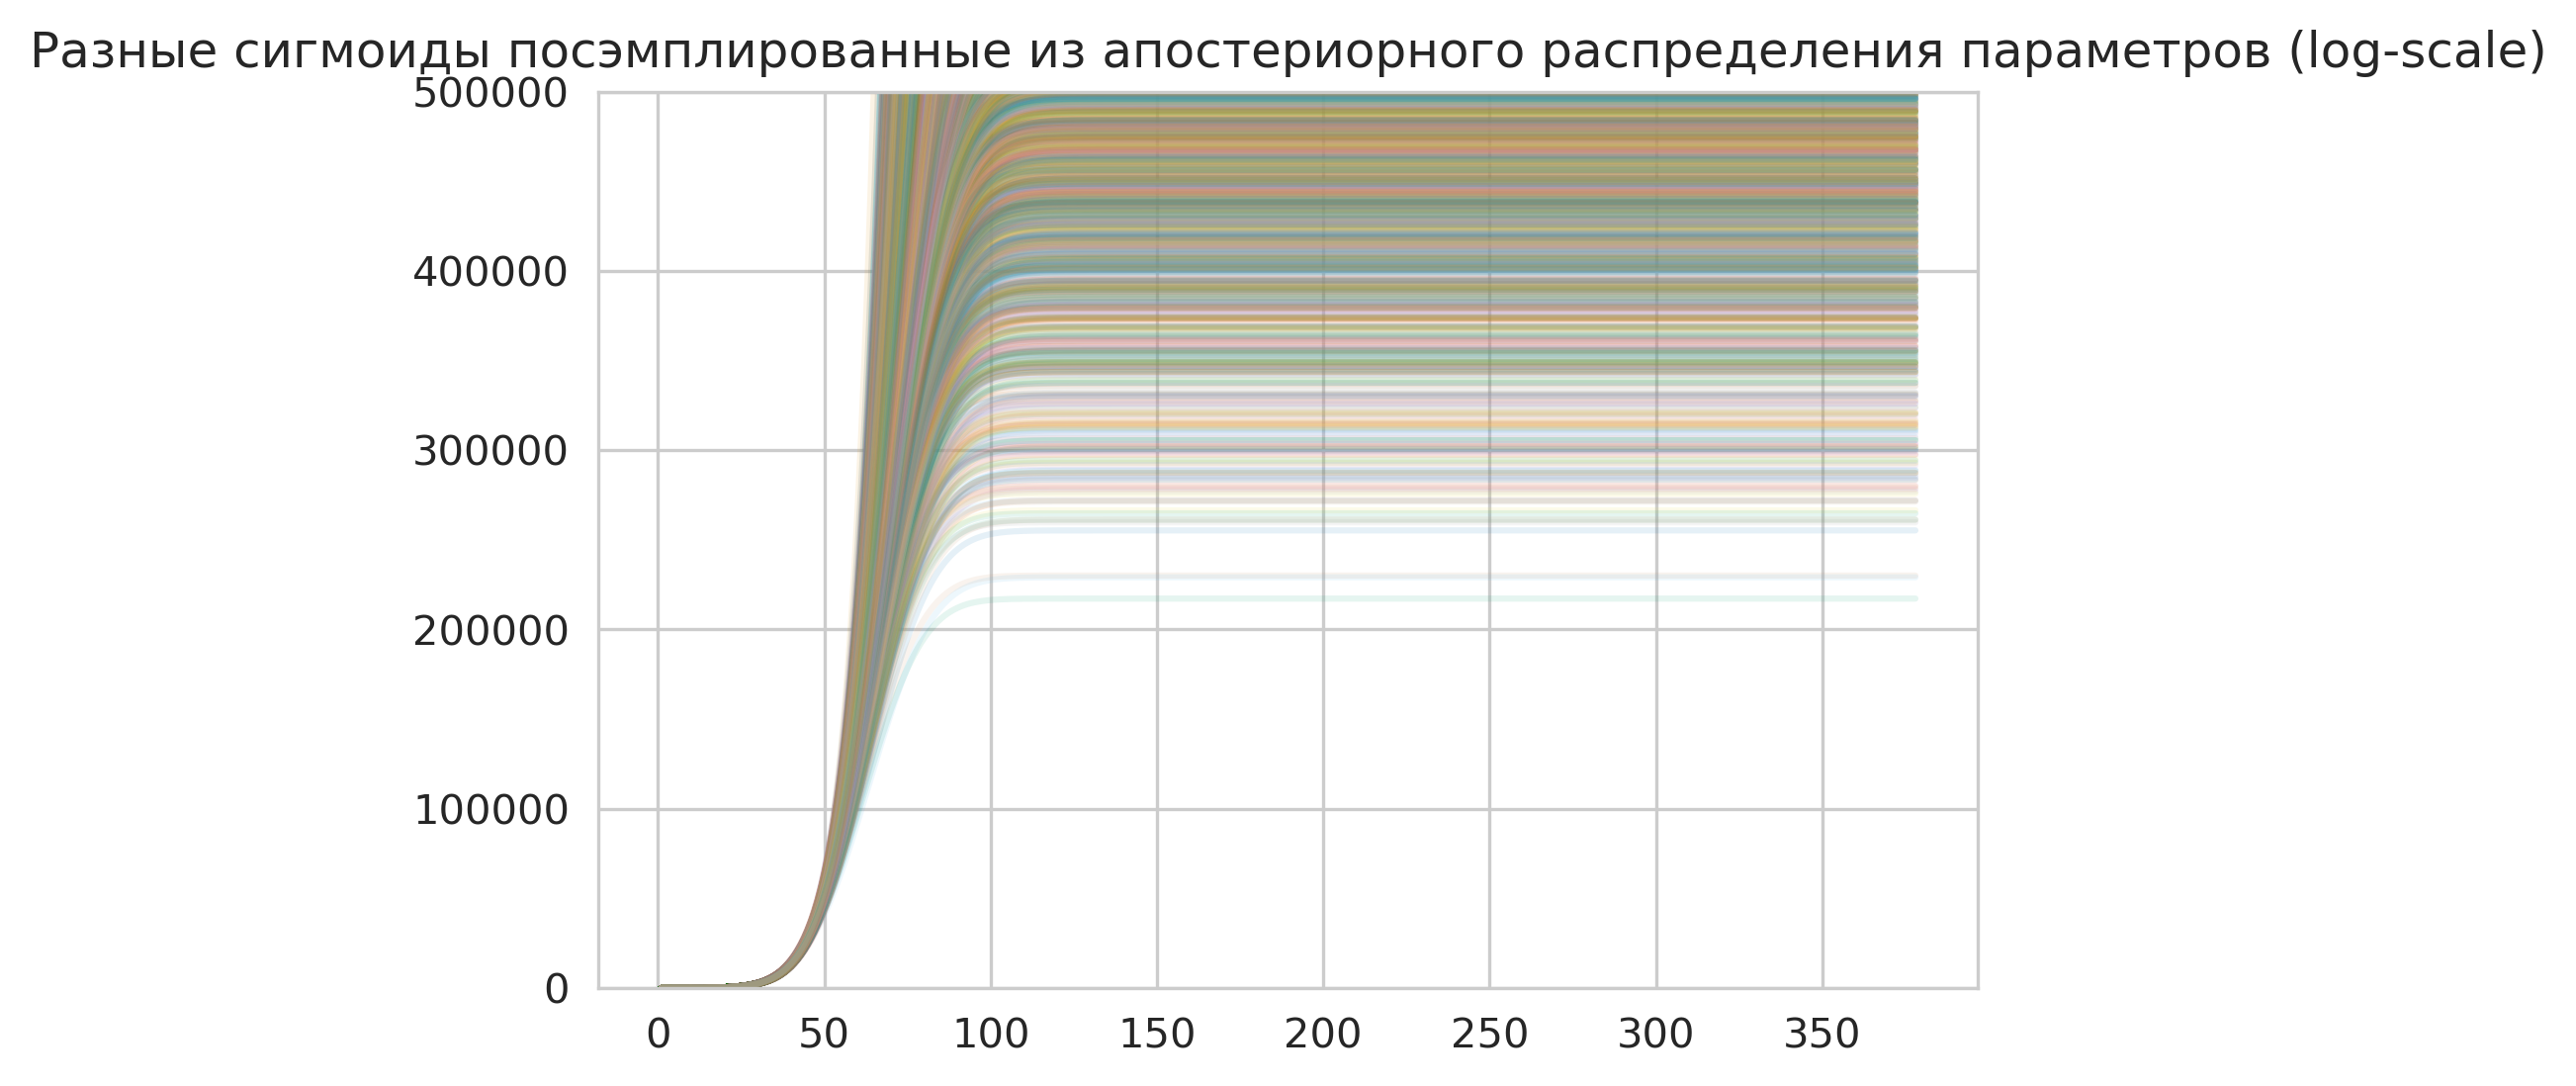

In [89]:
date_start = pd.to_datetime('2020-03-03')
date_may = pd.to_datetime('2020-05-01')
date_june = pd.to_datetime('2020-06-01')
date_sept = pd.to_datetime('2020-09-01')

x_may = np.arange(1, (date_may - date_start).days + 1).reshape(-1, 1)
x_june = np.arange(1, (date_june - date_start).days + 1).reshape(-1, 1)
x_sept = np.arange(1, (date_sept - date_start).days + 1).reshape(-1, 1)

x_may_hat = np.concatenate([x_may ** 2, x_may], axis=-1)
x_june_hat = np.concatenate([x_june ** 2, x_june], axis=-1)
x_sept_hat = np.concatenate([x_sept ** 2, x_sept], axis=-1)

y_may_total = int((sigmoid_model.predict(x_may_hat))[-1])
y_june_total = int((sigmoid_model.predict(x_june_hat))[-1])
y_sept_total = int((sigmoid_model.predict(x_sept_hat))[-1])

print(f'К 1 мая модель предсказывает всего {y_may_total} случаев')
print(f'К 1 июня модель предсказывает всего {y_june_total} случаев')
print(f'К 1 сентября модель предсказывает всего {y_sept_total} случаев')

for i in range(sampled_sigmoids.shape[0]):
    plt.plot(all_days, sampled_sigmoids[i], alpha=0.1)

height = 0.5 * 10 ** 6
    
plt.title("Разные сигмоиды посэмплированные из апостериорного распределения параметров (log-scale)")
plt.xlabel = "Номера дней от 3 марта"
plt.ylabel = "Ln(y)"
plt.ylim(0, height)
plt.show()

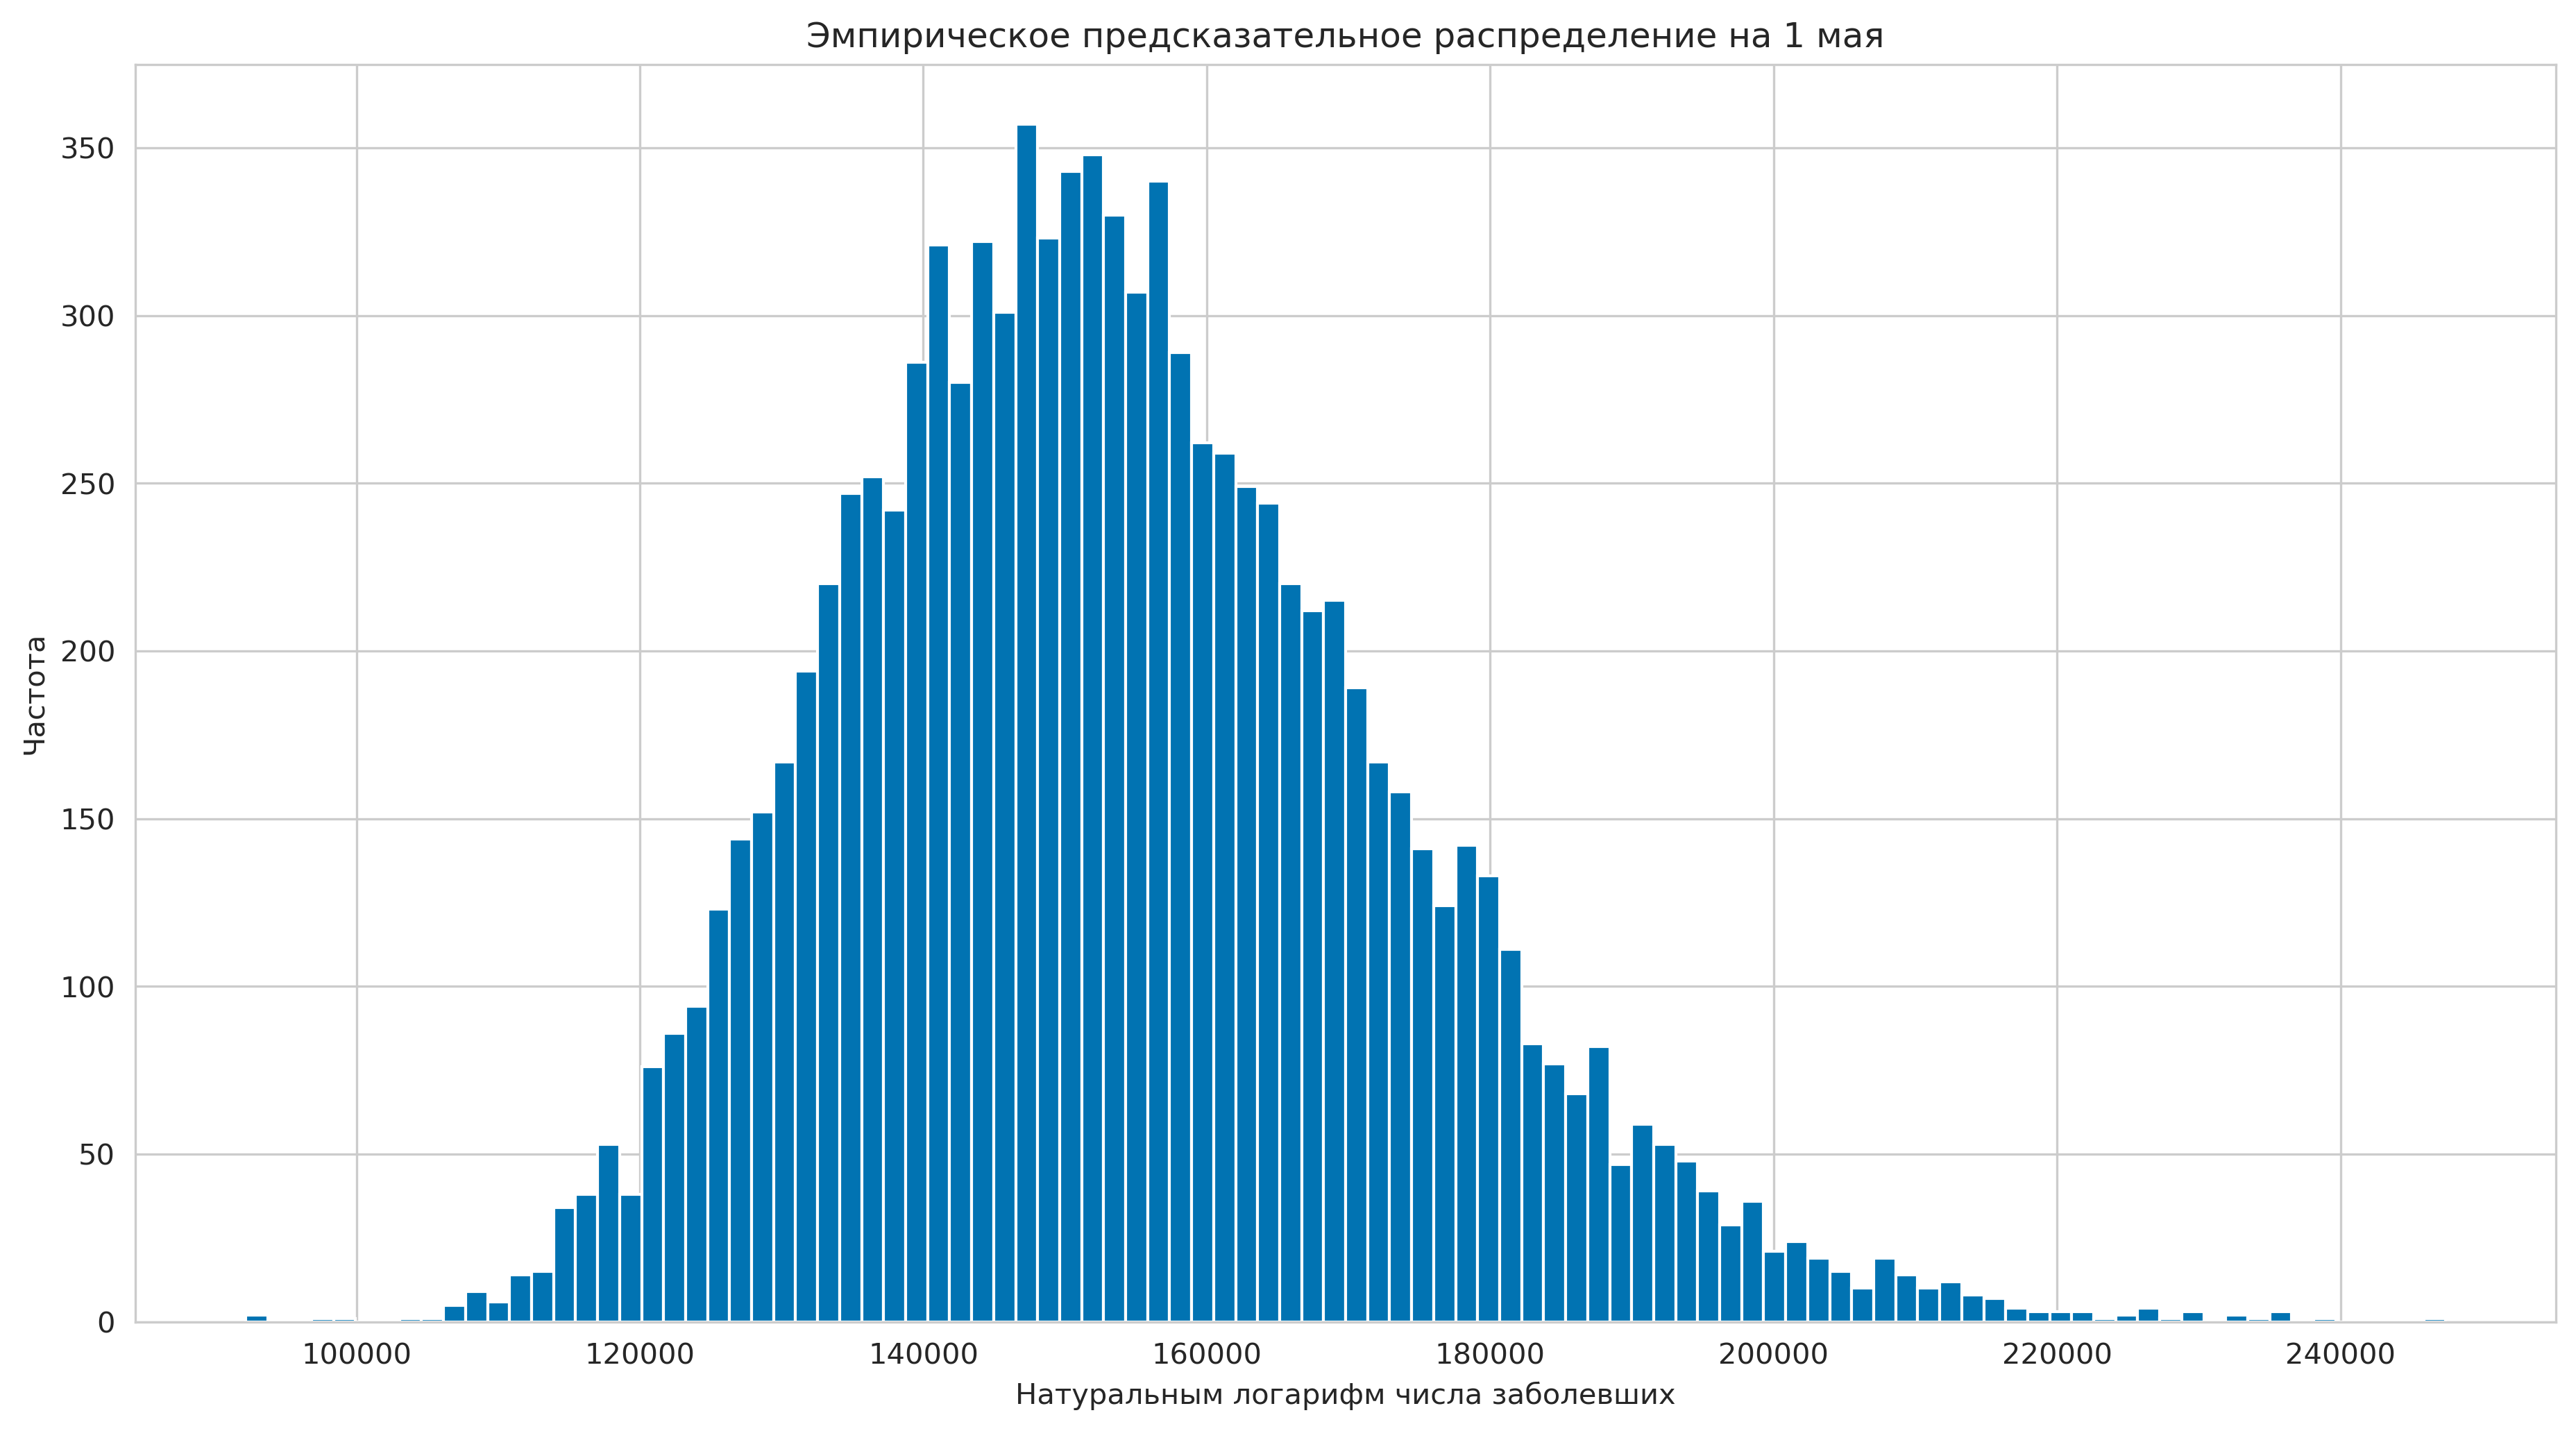

In [99]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Эмпирическое предсказательное распределение на 1 мая")
ax.set_xlabel("Число заболевших")
ax.set_ylabel("Частота")
hist = ax.hist(sampled_sigmoids[:, x_may[-1][0]], bins=100)

In [102]:
print(f'Прогноз числа больных на 1 мая в случае оптимистичного сценария (10-й процентиль): {np.percentile(sampled_sigmoids[:, x_may[-1][0]], 10):.0f}')
print(f'Прогноз числа больных на 1 мая в случае пессимистичного сценария (90-й процентиль): {np.percentile(sampled_sigmoids[:, x_may[-1][0]], 90):.0f}')

Прогноз числа больных на 1 мая в случае оптимистичного сценария (10-й процентиль): 130611
Прогноз числа больных на 1 мая в случае пессимистичного сценария (90-й процентиль): 179808


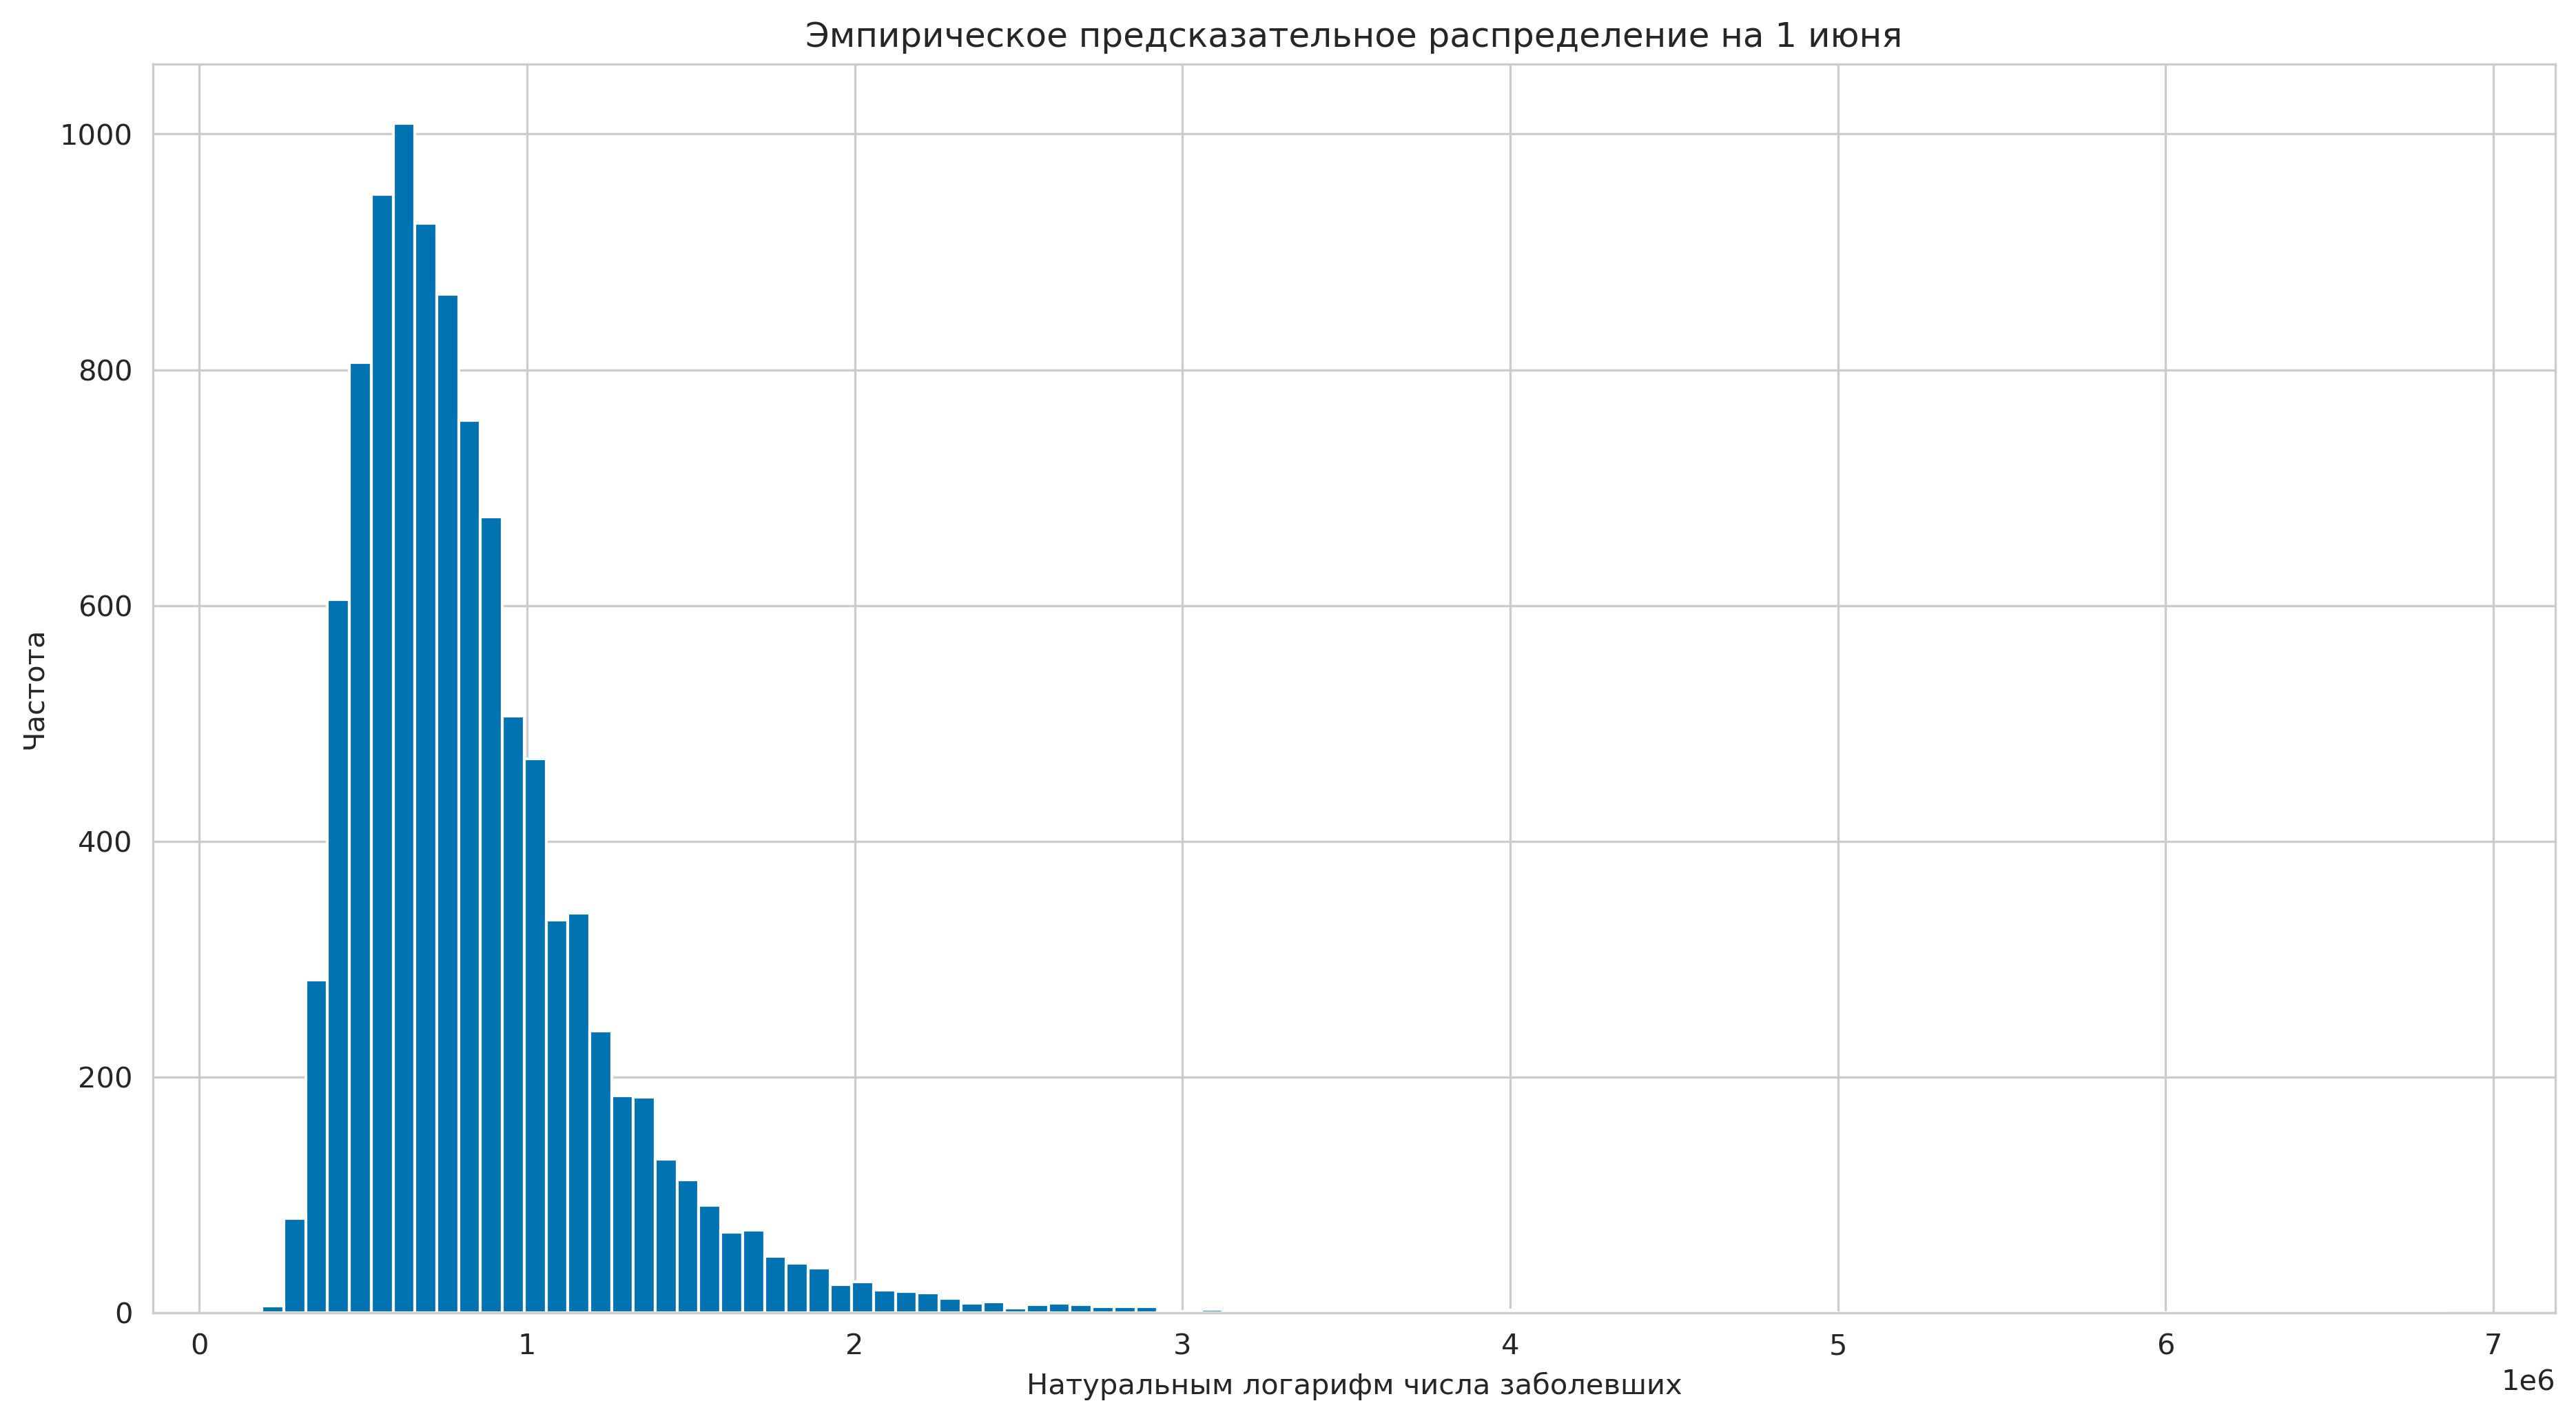

In [104]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Эмпирическое предсказательное распределение на 1 июня")
ax.set_xlabel("Число заболевших")
ax.set_ylabel("Частота")
hist = ax.hist(sampled_sigmoids[:, x_june[-1][0]], bins=100)

In [103]:
print(f'Прогноз числа больных на 1 июня в случае оптимистичного сценария (10-й процентиль): {np.percentile(sampled_sigmoids[:, x_june[-1][0]], 10):.0f}')
print(f'Прогноз числа больных на 1 июня в случае пессимистичного сценария (90-й процентиль): {np.percentile(sampled_sigmoids[:, x_june[-1][0]], 90):.0f}')

Прогноз числа больных на 1 мая в случае оптимистичного сценария (10-й процентиль): 461005
Прогноз числа больных на 1 мая в случае пессимистичного сценария (90-й процентиль): 1310627


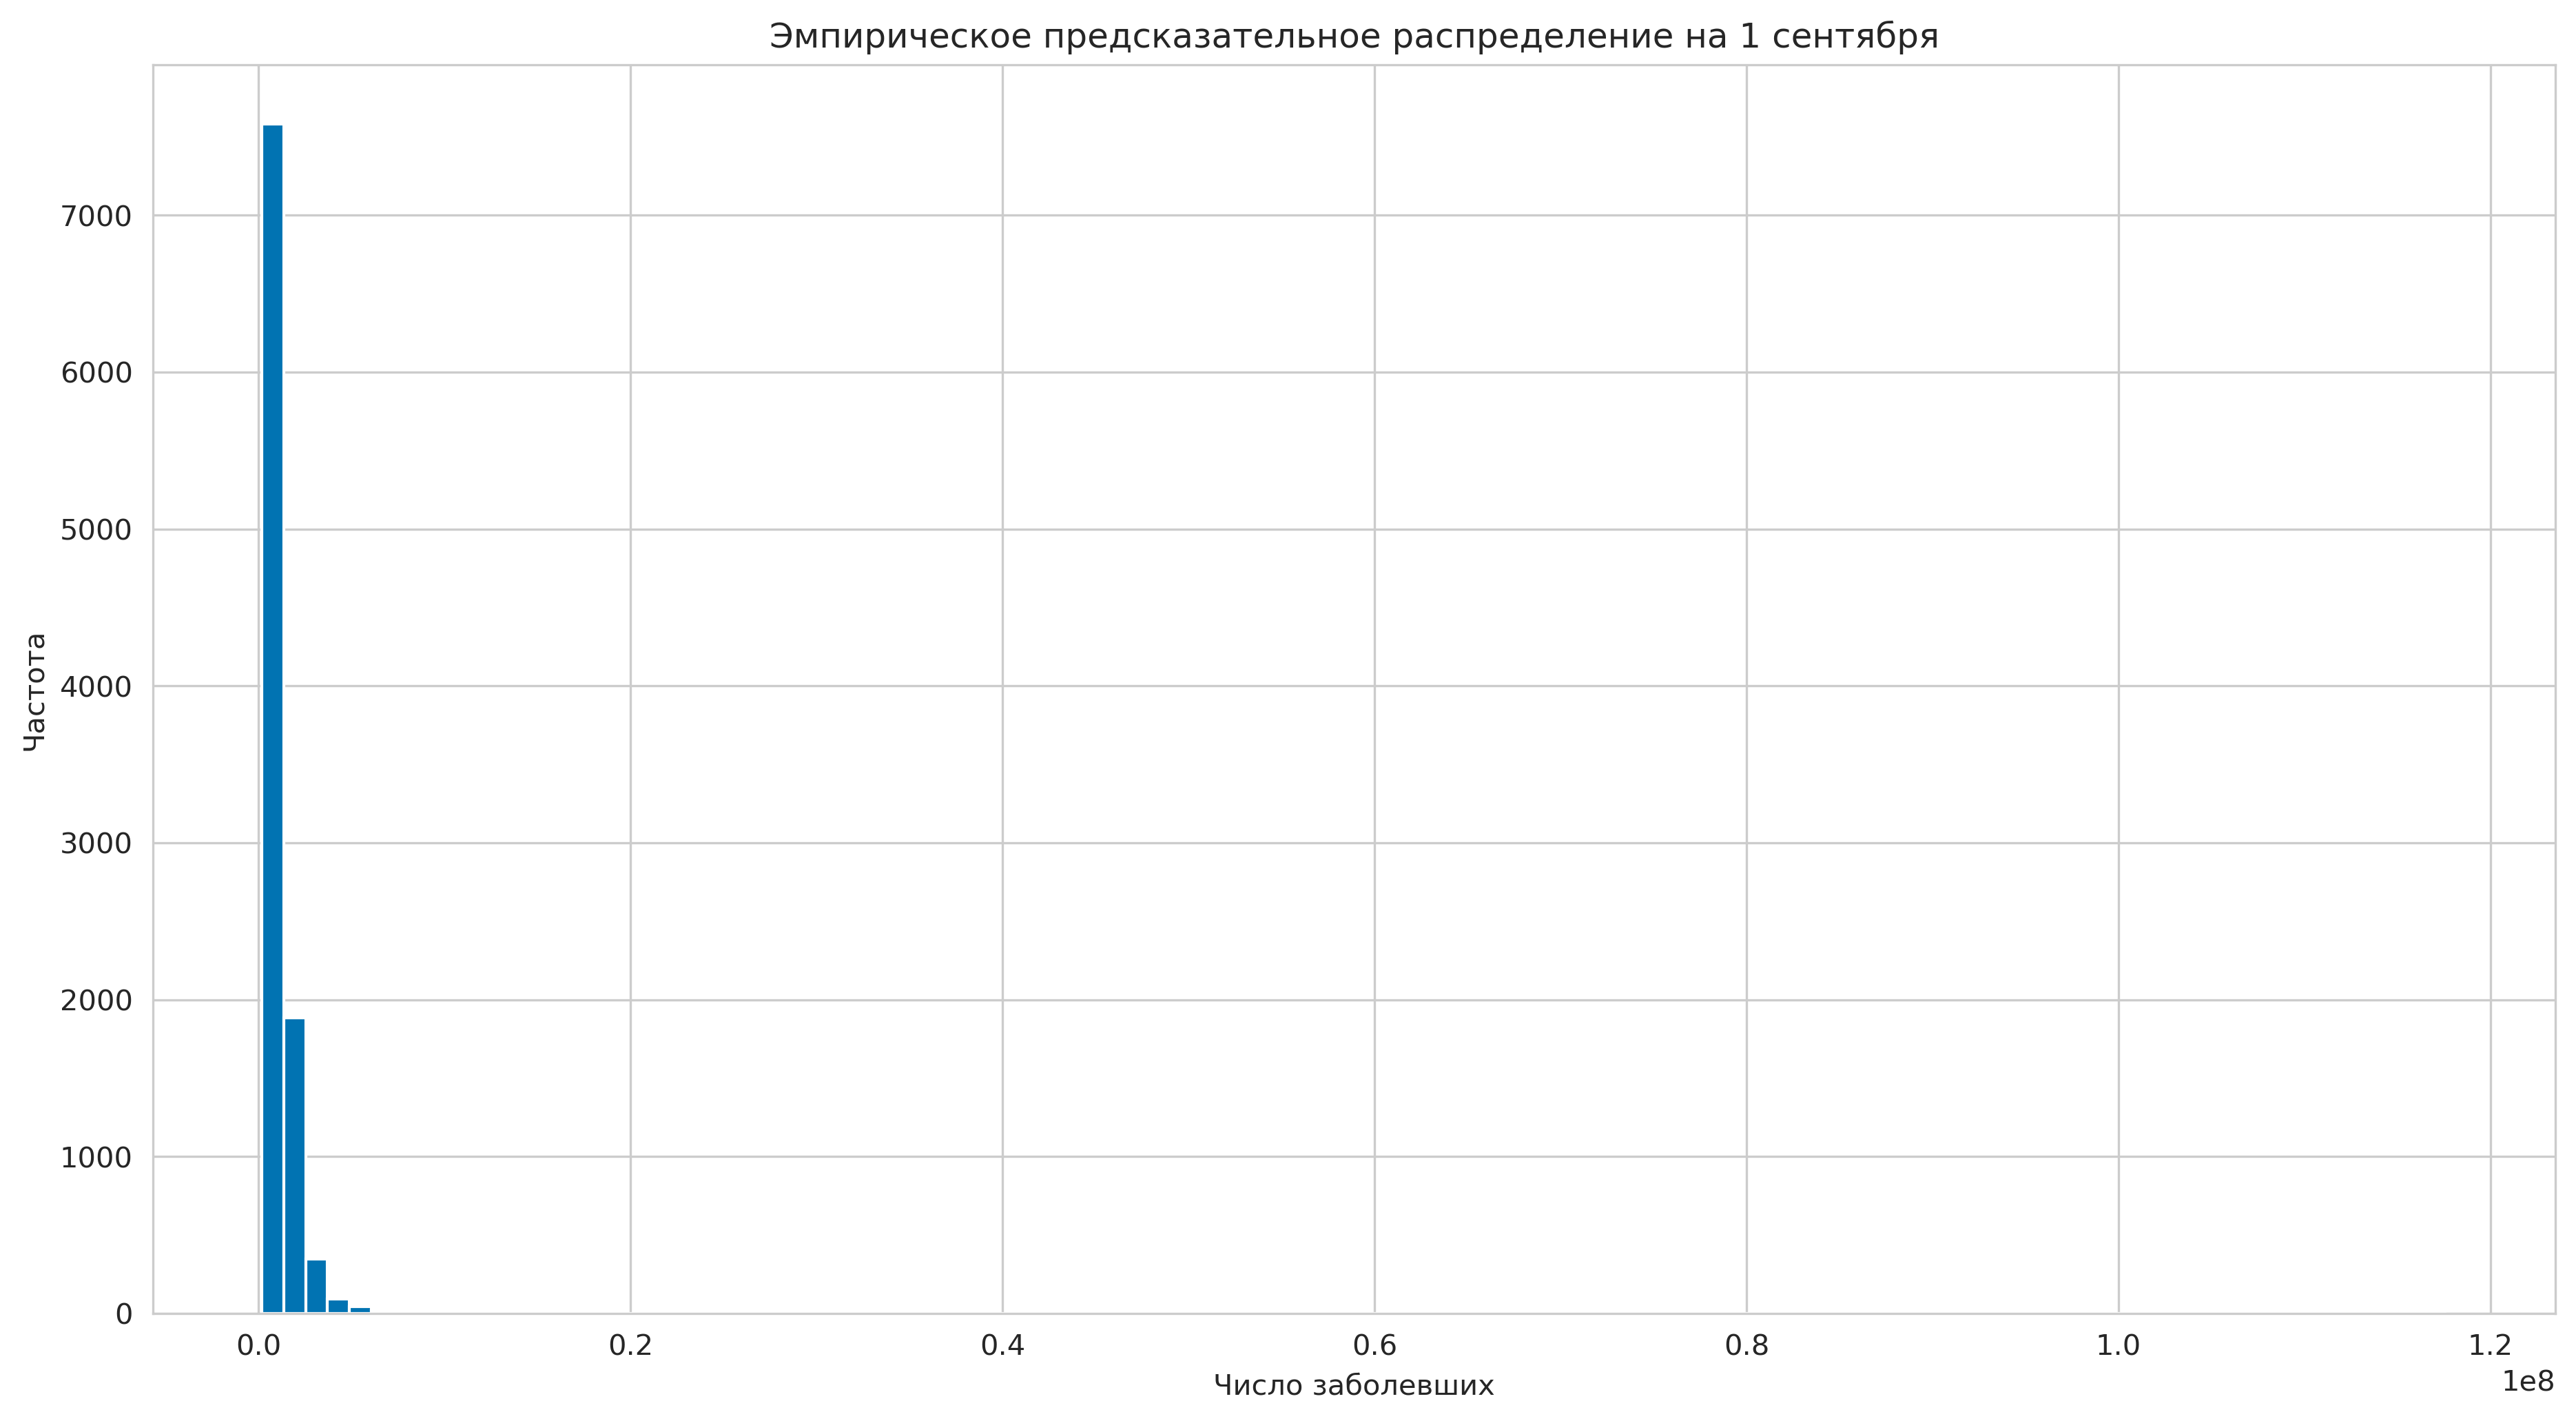

In [108]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_title("Эмпирическое предсказательное распределение на 1 сентября")
ax.set_xlabel("Число заболевших")
ax.set_ylabel("Частота")
hist = ax.hist(sampled_sigmoids[:, x_sept[-1][0]], bins=100)

In [109]:
print(f'Прогноз числа больных на 1 сентября в случае оптимистичного сценария (10-й процентиль): {np.percentile(sampled_sigmoids[:, x_sept[-1][0]], 10):.0f}')
print(f'Прогноз числа больных на 1 сентября в случае пессимистичного сценария (90-й процентиль): {np.percentile(sampled_sigmoids[:, x_sept[-1][0]], 90):.0f}')

Прогноз числа больных на 1 сентября в случае оптимистичного сценария (10-й процентиль): 506091
Прогноз числа больных на 1 сентября в случае пессимистичного сценария (90-й процентиль): 2007593


In [172]:
def kernel(x):
    feat1 = x.reshape(-1, 1) ** 2    
    feat2 = x.reshape(-1, 1)
    return np.concatenate([feat1, feat2], axis=-1)

In [171]:
set(df.location)

{'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibralt

In [189]:
def get_parameters(country_name, df):
    local = df[df.location == country_name]
    labels = np.array(local["new_cases"])[:50]
    labels = np.nan_to_num(labels, nan=1)
    x = kernel(np.arange(1, labels.shape[0] + 1))
    model = linear_model.LinearRegression()
    model.fit(x, labels)
    return model

In [190]:
models = {}
for loc in list(set(df.location)):
    models[loc] = get_parameters(loc, df)